In [1]:
import pandas as pd
import csv
import os
import re
import ast
import spacy
from google.colab import drive
from spacy import displacy
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import plotly.express as px
from matplotlib.colors import Normalize, ListedColormap
import seaborn as sns
import geopandas as gpd
import plotly.graph_objects as go
from collections import Counter, defaultdict

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/EquityInClimateChangeResearch')

Mounted at /content/drive


In [177]:
country_mapping = {
    'Alabama': 'United States',
    'Alaska': 'United States',
    'Albuquerque': 'United States',
    'Ann Arbor': 'United States',
    'Anchorage': 'United States',
    'Arizona': 'United States',
    'Arkansas': 'United States',
    'Atlanta': 'United States',
    'Berkeley': 'United States',
    'Boston': 'United States',
    'Boulder': 'United States',
    'Buffalo': 'United States',
    'California': 'United States',
    'Clayton': 'United States',
    'Chicago': 'United States',
    'Colorado': 'United States',
    'Connecticut': 'United States',
    'DC': 'United States',
    'Denver': 'United States',
    'Eastern United States': 'United States',
    'Eastern North Carolina': 'United States',
    'Florida': 'United States',
    'Fort Collins': 'United States',
    'Hawaii': 'United States',
    'Honolulu': 'United States',
    'Houston': 'United States',
    'Huntsville': 'United States',
    'IA': 'United States',
    'Indiana': 'United States',
    'Ithaca': 'United States',
    'Knoxville': 'United States',
    'LA': 'United States',
    'La Crosse': 'United States',
    'Long Island': 'United States',
    'Los Angeles': 'United States',
    'Louisiana': 'United States',
    'Lower Colorado': 'United States',
    'MA': 'United States',
    'Manhattan': 'United States',
    'Maryland': 'United States',
    'Massachusetts': 'United States',
    'Miami': 'United States',
    'Michigan': 'United States',
    'Midwest USA': 'United States',
    'Minnesota': 'United States',
    'Missoula': 'United States',
    'MD': 'United States',
    'Nevada': 'United States',
    'New Haven': 'United States',
    'New Jersey': 'United States',
    'New Mexico': 'United States',
    'New York': 'United States',
    'New York City': 'United States',
    'New York Metropolitan': 'United States',
    'North Carolina': 'United States',
    'North Dakota': 'United States',
    'NC': 'United States',
    'NYC': 'United States',
    'Oklahoma': 'United States',
    'PA': 'United States',
    'Pasadena': 'United States',
    'Pennsylvania': 'United States',
    'Philadelphia': 'United States',
    'Piscataway': 'United States',
    'Portland': 'United States',
    'Providence': 'United States',
    'Santa Barbara': 'United States',
    'Santa Cruz': 'United States',
    'San Diego': 'United States',
    'San Francisco': 'United States',
    'Saint Paul': 'United States',
    'Seattle': 'United States',
    'Southeast United States': 'United States',
    'Southwest USA': 'United States',
    'Syracuse': 'United States',
    'Tampa': 'United States',
    'Tempe': 'United States',
    'Texas': 'United States',
    'The Midwest USA': 'United States',
    'The Midwestern United States': 'United States',
    'The Northeastern United States': 'United States',
    'The Southwest United States': 'United States',
    'The Western United States': 'United States',
    'The United States': 'United States',
    'The United States of America': 'United States',
    'US': 'United States',
    'USA': 'United States',
    'US East Coast': 'United States',
    'US Midwest': 'United States',
    'US West Coast': 'United States',
    'Utah': 'United States',
    'United States of America': 'United States',
    'University Park': 'United States',
    'Urbana': 'United States',
    'VA': 'United States',
    'Vermont': 'United States',
    'Washington': 'United States',
    'Western United States': 'United States',
    'Wilmington': 'United States',

    'Beijing': 'China',
    'Central China': 'China',
    'Chongqing': 'China',
    'East China': 'China',
    'Eastern China': 'China',
    'Fuzhou': 'China',
    'Guangxi': 'China',
    'Guangzhou': 'China',
    'Guizhou': 'China',
    'Hangzhou': 'China',
    'Hebei': 'China',
    'Heilongjiang': 'China',
    # 'Hongkong': 'China',
    # 'Hong Kong': 'China',
    'Hubei': 'China',
    'Hubei Province': 'China',
    'Jinan': 'China',
    'Nanchang': 'China',
    'Nanning': 'China',
    'North China': 'China',
    'Northeast China': 'China',
    'Northern China': 'China',
    'Northwest China': 'China',
    'Northwestern China': 'China',
    "People Republic of China": 'China',
    "People's Republic of China": 'China',
    "People’s Republic of China": 'China',
    'Qingdao': 'China',
    'Qinghai': 'China',
    'Shanghai': 'China',
    'Shanxi': 'China',
    'Shenyang': 'China',
    'Shenzhen': 'China',
    'Shijiazhuang': 'China',
    'Sichuan': 'China',
    'Sichuan Province': 'China',
    'South China': 'China',
    'Southern China': 'China',
    'Southwest China': 'China',
    # 'Taiwan': 'China',
    'Weihai': 'China',
    'Western China': 'China',
    'Wuhan': 'China',
    'Xiamen': 'China',
    'Yunnan': 'China',

    'Britain': 'United Kingdom',
    'Cambridge': 'United Kingdom',
    'England': 'United Kingdom',
    'Great Britain': 'United Kingdom',
    'Greater London': 'United Kingdom',
    'London': 'United Kingdom',
    'New England': 'United Kingdom',
    'Northern Ireland': 'United Kingdom',
    'Southern England': 'United Kingdom',
    'Scotland': 'United Kingdom',
    'The United Kingdom': 'United Kingdom',
    'UK': 'United Kingdom',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Wales': 'United Kingdom',

    'Ahmedabad': 'India',
    'Bengal': 'India',
    'Central India': 'India',
    'Delhi': 'India',
    'Kerala': 'India',
    'Kolkata': 'India',
    'New Delhi': 'India',
    'North India': 'India',
    'Northeast India': 'India',
    'Northeastern India': 'India',
    'Northern India': 'India',
    'Peninsular India': 'India',
    'Punjab': 'India',
    'South India': 'India',
    'Southern India': 'India',

    'Congo, the democratic republic o': 'Democratic Republic of Congo',
    'Congo, the democratic republic of': 'Democratic Republic of Congo',
    'Dem Rep Congo': 'Democratic Republic of Congo',
    'Dem. Rep. Congo': 'Democratic Republic of Congo',
    'Democratic Republic of the Congo': 'Democratic Republic of Congo',
    'DR Congo': 'Democratic Republic of Congo',
    'DR of Congo': 'Democratic Republic of Congo',
    'The Democratic Republic of Congo': 'Democratic Republic of Congo',
    'The Democratic Republic of the Congo': 'Democratic Republic of Congo',
    'Yangambi': 'Democratic Republic of Congo',

    'Greenland': 'Denmark',
    'East Greenland': 'Denmark',
    'North Greenland': 'Denmark',
    'Northeast Greenland': 'Denmark',
    'Northern Greenland': 'Denmark',
    'Northwest Greenland': 'Denmark',
    'Southeast Greenland': 'Denmark',
    'West Greenland': 'Denmark',

    'Brisbane': 'Australia',
    'East Australia': 'Australia',
    'New South Wales': 'Australia',
    'North Australia': 'Australia',
    'Perth': 'Australia',
    'Sydney': 'Australia',

    "Democratic People Republic of Korea": 'North Korea',
    "Democratic People's Republic of Korea": 'North Korea',
    "Korea, Democratic People Repub": 'North Korea',
    "Korea, Democratic People Republic": 'North Korea',
    "Korea, Democratic People's Repub": 'North Korea',
    "Korea, Democratic People's Republic": 'North Korea',

    'Lao': 'Laos',
    'Lao PDR': 'Laos',
    "Lao People's Democratic Republic": 'Laos',
    "Lao People Democratic Republic": 'Laos',
    'LPDR': 'Laos',

    'Ansan Republic of Korea': 'South Korea',
    'Ansan, Republic of Korea': 'South Korea',
    'Busan': 'South Korea',
    'Daegu': 'South Korea',
    'Gwangju': 'South Korea',
    'Korea, republic of': 'South Korea',
    'Republic of Korea': 'South Korea',
    'Seoul': 'South Korea',

    'Antigua': 'Antigua and Barbuda',
    'Barbuda': 'Antigua and Barbuda',
    'Antigua and Barb': 'Antigua and Barbuda',
    'Antigua and Barb.': 'Antigua and Barbuda',

    'Bosnia': 'Bosnia and Herzegovina',
    'Herzegovina': 'Bosnia and Herzegovina',
    'Bosnia and Herz': 'Bosnia and Herzegovina',
    'Bosnia and Herz.': 'Bosnia and Herzegovina',

    'Alberta': 'Canada',
    'Eastern Canada': 'Canada',
    'Ontario': 'Canada',
    'The Northwest territories of Canada': 'Canada',

    'Amsterdam': 'Netherlands',
    'Hague': 'Netherlands',
    'The Netherlands': 'Netherlands',
    'Utrecht': 'Netherlands',

    'St Vincent': 'Saint Vincent and the Grenadines',
    'St Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'St. Vin. and Gren.': 'Saint Vincent and the Grenadines',
    'St Vin and Gren': 'Saint Vincent and the Grenadines',

    'Central Siberia': 'Serbia',
    'Siberia': 'Serbia',
    'West Siberia': 'Serbia',
    'Western Siberia': 'Serbia',

    'Bratislava': 'Slovakia',
    'Bratislava, Bratislava': 'Slovakia',
    'Slovak Republic': 'Slovakia',
    'Svit': 'Slovakia',
    'Zvolen': 'Slovakia',

    'Caribbean': 'Carribean',
    'Puerto': 'Carribean',
    'Puerto Rico': 'Carribean',

    'African Republic': 'Central African Republic',
    'Bangui': 'Central African Republic',
    'Central African Rep': 'Central African Republic',

    'Czhechia': 'Czech Republic',
    'Czechia': 'Czech Republic',
    'The Czech Republic': 'Czech Republic',

    'Dominican Rep': 'Dominican Republic',
    'Dominican Rep.': 'Dominican Republic',

    'INRA': 'France',
    'INRAE': 'France',
    'Paris': 'France',

    'Hateruma': 'Japan',
    'South Japan': 'Japan',
    'Tokyo': 'Japan',

    'Cancun': 'Mexico',
    'México': 'Mexico',
    'Oaxaca': 'Mexico',

    'Ancón': 'Peru',
    'Lima': 'Peru',
    'Perú': 'Peru',

    'Russian Federation': 'Russia',
    'The Russian Federation': 'Russia',
    'Yakutia': 'Russia',

    'Northern Taiwan': 'Taiwan',
    'Republic of China': 'Taiwan',
    'ROC': 'Taiwan',

    'Abu Dhabi': 'United Arab Emirates',
    'Dubai': 'United Arab Emirates',
    'UAE': 'United Arab Emirates',

    'Bolivia, Plurinational State of': 'Bolivia',
    'Bolivia (Plurinational State of)': 'Bolivia',

    'São Paulo': 'Brazil',
    'Sao Paulo': 'Brazil',

    'Brunei': 'Brunei Darussalam',
    'Gadong': 'Brunei Darussalam',

    "Republic of Congo": 'Congo',
    'Republic of the Congo': 'Congo',

    'Eq Guinea': 'Equatorial Guinea',
    'Eq. Guinea': 'Equatorial Guinea',

    'Iran, Islamic Republic of': 'Iran',
    'Iran (Islamic Republic of)': 'Iran',

    'Northern Italy': 'Italy',
    'Venice': 'Italy',

    "Côte d'Ivoire": 'Ivory Coast',
    "Cote d'Ivoire": 'Ivory Coast',

    'Marshall Is': 'Marshall Islands',
    'Marshall Is.': 'Marshall Islands',

    'Micronesia (Federated States of)': 'Micronesia',
    'Micronesia, Federated States Of': 'Micronesia',

    'Republic of Moldova': 'Moldova',
    'Moldova, Republic of': 'Moldova',

    'Panamá': 'Panama',
    'Republic of Panama': 'Panama',

    'St Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',

    'Solomon Is': 'Solomon Islands',
    'Solomon Is.': 'Solomon Islands',

    'United Republic of Tanzania': 'Tanzania',
    'Tanzania, United Republic of': 'Tanzania',

    'Trinidad': 'Trinidad and Tobago',
    'Tobago': 'Trinidad and Tobago',

    'Venezuela, Bolivarian Republic o': 'Venezuela',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',

    'Ho Chi Minh City': 'Vietnam',
    'Viet Nam': 'Vietnam',

    "Auckland, New Zealand": 'New Zealand',
    'Bangkok': 'Thailand',
    'Benguela': 'Angola',
    'Cape Town': 'South Africa',
    'Cabo Verde': 'Cape Verde',
    'Dakar': 'Senegal',
    'Dhaka': 'Bangaldesh',
    'Doha': 'Qatar',
    'East Malaysia': 'Malaysia',
    'Guinea Bissau': 'Guinea-Bissau',
    'Hong Kong': 'HongKong',
    'Instituto Geofísico': 'Ecuador',
    'Libreville': 'Gabon',
    'Libyan Arab Jamahiriya': 'Libya',
    'Macedonia': 'North Macedonia',
    'Maradi': 'Niger',
    'Mombasa': 'Kenya',
    'Nicosia': 'Cyprus',
    'Pacific Island': 'Pacific Islands',
    'Republic of Ireland': 'Ireland',
    'S Sudan': 'South Sudan',
    'Santa Teresa': 'Costa Rica',
    "São Tomé and Principe": 'Sao Tome and Principe',
    'SIDS': 'Small Island Developing States',
    'Split, Croatia': 'Croatia',
    'Srilanka': 'Sri Lanka',
    'St Lucia': 'Saint Lucia',
    'State of Palestine': 'Palestine',
    'Stockholm': 'Sweden',
    'Sub Saharan Africa': 'Sub-Saharan Africa',
    'Sumatra': 'Indonesia',
    'Swaziland': 'Eswatini',
    'Syrian Arab Republic': 'Syria',
    'Türkiye': 'Turkey',
    'Timor Leste': 'Timor-Leste',
    'Western Norway': 'Norway',
    'Western Uganda': 'Uganda',
    'Yanbu':' Saudi Arabia',
    'Yangon': 'Myanmar',

    'Eastern Asia': 'East Asia',

    'Western Asia': 'West Asia',

    'Southern Asia': 'South Asia',
    'West South Asia': 'South Asia',

    'Equatorial Asia': 'Asia',

    'Mainland Southeast Asia': 'Southeast Asia',
    'South/Southeast asia': 'Southeast Asia',

    'Americas': 'America',
    'Sahel': 'Sahelian Africa',

    'Central North America': 'North America',
    'East North America': 'North America',
    'North-America': 'North America',
    'Northern America': 'North America',
    'Northeast North America': 'North America',
    'Northwestern North America': 'North America',
    'The Northwestern North America': 'North America',
    'Western North America': 'North America',

    'Northeast South America': 'South America',
    'Eastern South America': 'South America',
    'Southeast South America': 'South America',
    'Southeastern South America': 'South America',
    'Southwestern South America': 'South America',

    'Central-East Africa': 'East Africa',
    'Eastern Africa': 'East Africa',
    'Southeastern Africa': 'East Africa',

    'Northern Africa': 'North Africa',

    'Eastern Europe': 'East Europe',
    'South-eastern Europe': 'East Europe',

    'Mediterranean Europe': 'Europe',

    'Northeastern Europe': 'North Europe',
    'Northern Europe': 'North Europe',
    'Northwestern Europe': 'North Europe',
    'Northwest Europe': 'North Europe',

    'Western Europe': 'West Europe',

    'Southern Europe': 'South Europe',
    }

In [178]:
annex1 = ['Australia',
          'Austria',
          'Belarus',
          'Belgium',
          'Bulgaria',
          'Canada',
          'Croatia',
          'Cyprus',
          'Czech Republic',
          'Denmark',
          'Estonia',
          'European Union',
          'Finland',
          'France',
          'Germany',
          'Greece',
          'Hungary',
          'Iceland',
          'Ireland',
          'Italy',
          'Japan',
          'Latvia',
          'Liechtenstein',
          'Lithuania',
          'Luxembourg',
          'Malta',
          'Monaco',
          'Netherlands',
          'New Zealand',
          'Norway',
          'Poland',
          'Portugal',
          'Romania',
          'Russia',
          'Slovakia',
          'Slovenia',
          'Spain',
          'Sweden',
          'Switzerland',
          'Turkey',
          'Ukraine',
          'United Kingdom',
          'United States']

non_annex1 = ['Afghanistan',
              'Albania',
              'Algeria',
              'Andorra',
              'Angola',
              'Antigua and Barbuda',
              'Argentina',
              'Armenia',
              'Azerbaijan',
              'Bahamas',
              'Bahrain',
              'Bangladesh',
              'Barbados',
              'Belize',
              'Benin',
              'Bhutan',
              'Bolivia',
              'Bosnia and Herzegovina',
              'Botswana',
              'Brazil',
              'Brunei Darussalam',
              'Burkina Faso',
              'Burundi',
              'Cape Verde',
              'Cambodia',
              'Cameroon',
              'Central African Republic',
              'Chad',
              'Chile',
              'China',
              'Colombia',
              'Comoros',
              'Congo',
              'Cook Islands',
              'Costa Rica',
              'Cuba',
              'Democratic Republic of Congo',
              'Djibouti',
              'Dominica',
              'Dominican Republic',
              'Ecuador',
              'Egypt',
              'El Salvador',
              'Equatorial Guinea',
              'Eritrea',
              'Eswatini',
              'Ethiopia',
              'Fiji',
              'Gabon',
              'Gambia',
              'Georgia',
              'Ghana',
              'Grenada',
              'Guatemala',
              'Guinea',
              'Guinea-Bissau',
              'Guyana',
              'Haiti',
              'Holy See',
              'Honduras',
              'HongKong',
              'India',
              'Indonesia',
              'Iran',
              'Iraq',
              'Israel',
              'Ivory Coast',
              'Jamaica',
              'Jordan',
              'Kazakhstan',
              'Kenya',
              'Kiribati',
              'Kuwait',
              'Kyrgyzstan',
              'Laos',
              'Lebanon',
              'Lesotho',
              'Liberia',
              'Libya',
              'Madagascar',
              'Malawi',
              'Malaysia',
              'Maldives',
              'Mali',
              'Marshall Islands',
              'Mauritania',
              'Mauritius',
              'Mexico',
              'Micronesia',
              'Moldova',
              'Mongolia',
              'Montenegro',
              'Morocco',
              'Mozambique',
              'Myanmar',
              'Namibia',
              'Nauru',
              'Nepal',
              'Nicaragua',
              'Niger',
              'Nigeria',
              'Niue',
              'North Macedonia',
              'North Korea',
              'Oman',
              'Pakistan',
              'Palau',
              'Panama',
              'Papua New Guinea',
              'Paraguay',
              'Peru',
              'Philippines',
              'Qatar',
              'Rwanda',
              'Saint Kitts and Nevis',
              'Saint Lucia',
              'Saint Vincent and the Grenadines',
              'Samoa',
              'San Marino',
              'Sao Tome and Principe',
              'Saudi Arabia',
              'Senegal',
              'Serbia',
              'Seychelles',
              'Sierra Leone',
              'Singapore',
              'Solomon Islands',
              'Somalia',
              'South Africa',
              'South Korea',
              'South Sudan',
              'Sri Lanka',
              'Palestine',
              'Sudan',
              'Suriname',
              'Syria',
              'Taiwan',
              'Tajikistan',
              'Tanzania',
              'Thailand',
              'Timor-Leste',
              'Togo',
              'Tonga',
              'Trinidad and Tobago',
              'Tunisia',
              'Turkmenistan',
              'Tuvalu',
              'Uganda',
              'United Arab Emirates',
              'Uruguay',
              'Uzbekistan',
              'Vanuatu',
              'Venezuela',
              'Vietnam',
              'Yemen',
              'Zambia',
              'Zimbabwe']

ldc = ['Afghanistan',
       'Angola',
       'Bangladesh',
       'Benin',
       'Bhutan',
       'Burkina Faso',
       'Burundi',
       'Cambodia',
       'Central African Republic',
       'Chad',
       'Comoros',
       'Democratic Republic of Congo',
       'Djibouti',
       'Eritrea',
       'Ethiopia',
       'Gambia',
       'Guinea',
       'Guinea-Bissau',
       'Haiti',
       'Kiribati',
       'Laos',
       'Lesotho',
       'Liberia',
       'Madagascar',
       'Malawi',
       'Mali',
       'Mauritania',
       'Mozambique',
       'Myanmar',
       'Nepal',
       'Niger',
       'Rwanda',
       'Sao Tome and Principe',
       'Senegal',
       'Sierra Leone',
       'Solomon Islands',
       'Somalia',
       'South Sudan',
       'Sudan',
       'Timor-Leste',
       'Togo',
       'Tuvalu',
       'Uganda',
       'Tanzania',
       'Yemen',
       'Zambia']

annex1_regions = ['East Asia',
                  'Europe',
                  'America',
                  'Asia',
                  'North America',
                  'East Europe',
                  'North Europe',
                  'West Europe',
                  'South Europe',
                  'Central Europe']

non_annex1_regions = ['Asia',
                      'East Asia',
                      'North Asia',
                      'West Asia',
                      'South Asia',
                      'Southeast Asia',
                      'Central Asia',
                      'America',
                      'South America',
                      'Central America',
                      'Latin America',
                      'Africa',
                      'East Africa',
                      'North Africa',
                      'West Africa',
                      'Southern Africa',
                      'Central Africa',
                      'Sub-Saharan Africa',
                      'Sahel',
                      'Sahelian Africa',
                      'Pacific Islands',
                      'Carribean',
                      'Small Island Developing States',
                      'Korea',
                      'South Europe',
                      'Europe',
                      'North America']

ldc_regions = ['Asia',
               'South Asia',
               'Southeast Asia',
               'Sahelian Africa',
               'Sub-Saharan Africa',
               'West Africa',
               'Central Africa',
               'East Africa',
               'North Africa',
               'Africa']

# annex1_regions = ['Europe',
#                   'East Europe',
#                   'North Europe',
#                   'West Europe',
#                   'South Europe',
#                   'Central Europe',
#                   'North America']

research_regions = ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']

split_regions_list = ['central and south america',
                      'north and south america',
                      'central and south china',
                      'central and east africa',
                      'central and northern europe',
                      'central and southern asia',
                      'northern and eastern europe']

region_check_list = list(set(annex1 + non_annex1 + ldc + non_annex1_regions + annex1_regions + ldc_regions + ['Global']))
# region_check_list = list(set(annex1 + non_annex1 + ldc + ['Global']))
region_check_list_lower = [region.lower() for region in region_check_list]

country_check_list = list(set(annex1 + non_annex1 + ldc))
country_check_list_lower = [country.lower() for country in country_check_list]

exclude_regions = non_annex1_regions + annex1_regions + ldc_regions
exclude_regions = [r.lower() for r in exclude_regions]

In [179]:
NER = spacy.load("en_core_web_sm")

def tag_entities(text):
    entities = NER(text)
    region = []
    for word in entities.ents:
        if word.label_ in ("GPE", "LOC"):
            region.append(word.text)
    # displacy.render(entities, style="ent", jupyter=True)
    return set(region)

# Function to check if any country in Title_Regions is present in annex1
def check_annex1(test_region):
  for region in annex1+annex1_regions:
  # for region in annex1:
    # if test_region == region.lower() and test_region not in ['united states']:
    if test_region == region.lower():
        return 1
  return 0

def check_non_annex1(test_region):
  for region in non_annex1+non_annex1_regions:
  # for region in non_annex1:
    if test_region == region.lower():
      # if (test_region not in ['china', 'india']) and (test_region not in [country.lower() for country in ldc]):
      # if (test_region not in ['china', 'india']):
        return 1
  return 0

def check_ldc(test_region):
  for region in ldc+ldc_regions:
  # for region in ldc:
    if test_region == region.lower():
      return 1
  return 0

def check_global(region):
  if region == 'global':
      return 1
  return 0

def check_usa(region):
  if region == 'united states':
    return 1
  return 0

def check_india(region):
  if region == 'india':
      return 1
  return 0

def check_china(region):
  if region == 'china':
      return 1
  return 0

# Function to impute empty sets with {'global'}
def impute_global(x):
  return list(x) if x != set() else ['Global']


# Function to get the region classification based on binary flags
def get_research_regions(row):
    regions = []
    if row['Annex1'] == 1:
        regions.append('Annex1')
    if row['NonAnnex1'] == 1:
        regions.append('NonAnnex1')
    if row['LDC'] == 1:
        regions.append('LDC')
    if row['USA'] == 1:
        regions.append('USA')
    if row['India'] == 1:
        regions.append('India')
    if row['China'] == 1:
        regions.append('China')
    # if row['Brazil'] == 1:
    #     regions.append('Brazil')
    return regions

def get_author_regions(country):
    regions = []
    if check_annex1(country):
        regions.append('Annex1')
    if check_non_annex1(country):
        regions.append('NonAnnex1')
    if check_ldc(country):
        regions.append('LDC')
    if check_usa(country):
        regions.append('USA')
    if check_india(country):
        regions.append('India')
    if check_china(country):
        regions.append('China')
    # if check_brazil(country):
    #     regions.append('Brazil')
    if not regions:  # If no region matches, classify as Unknown
        regions.append('Unknown')
    return regions

def get_region(country):
  # if country == 'united states':
  #   return 'USA'
  # if country == 'china':
  #   return 'China'
  # if country == 'india':
  #   return 'India'
  if country in [c.lower() for c in ldc]:
    return 'LDC'
  if country in [c.lower() for c in non_annex1 + non_annex1_regions]:
    return 'NonAnnex1'
  if country in [c.lower() for c in annex1]:
    return 'Annex1'
  else:
    return ''


def clean_regions(region):
  region = region.lower()
  region = region.strip()
  region = region.replace('.', '')
  region = region.replace('\xa0', ' ')
  region = re.sub(r"'s\b", "", region)
  region = re.sub(r"’s\b", "", region)

  if region in split_regions_list:
    parts = region.split(' and ')
    suffix = parts[1].split()[-1]
    # Return the two parts with reconstructed phrases
    region = [parts[0]+ ' ' + suffix, parts[1]]
  else:
    region = [region]

  country_mapping_lower = dict((k.lower(), v.lower()) for k,v in country_mapping.items())

  cleaned_region = []

  for r in region:
    if r in country_mapping_lower.keys():
      cleaned_region.append(country_mapping_lower[r])
    else:
      cleaned_region.append(r)

  return cleaned_region

# Data Cleaning

(No need to re-run, just read climate_change_research_preprocessed.csv)

In [180]:
# data = pd.read_csv('climate_change_research.csv', encoding='utf-8')
# data.head(10)

In [181]:
# Fix date issues for data elements that it hasn't been populated for
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature09394', 'Date Published'] = '2010-09-23'
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature09388', 'Date Published'] = '2010-09-16'
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature09314', 'Date Published'] = '2010-08-12'
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature09186', 'Date Published'] = '2010-07-22'
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature09210', 'Date Published'] = '2010-07-22'

# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature09213', 'Date Published'] = '2010-07-08'
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature09176', 'Date Published'] = '2010-07-01'
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature09043', 'Date Published'] = '2010-05-20'
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature09098', 'Date Published'] = '2010-05-20'
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature09044', 'Date Published'] = '2010-05-13'

# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature08985', 'Date Published'] = '2010-04-22'
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature08955', 'Date Published'] = '2010-04-01'
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature08930', 'Date Published'] = '2010-03-25'
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature08707', 'Date Published'] = '2010-01-14'
# data.loc[data['DOI'] == 'https://doi.org/10.1038/nature08687', 'Date Published'] = '2010-01-07'

In [182]:
# data['Title_Regions'] = data['Title'].apply(tag_entities)
# data['Abstract_Regions'] = data['Abstract'].apply(tag_entities)
# # data['Text_Regions'] = data['Text'].apply(tag_entities)

In [183]:
# data.to_csv('climate_change_research_preprocessed.csv', index=False)

# Data Pre-processing

In [184]:
data = pd.read_csv('climate_change_research_preprocessed.csv')
# data['Date Published'] = pd.to_datetime(data['Date Published'])
# data['Date Modified'] = pd.to_datetime(data['Date Modified'])
# data['Keywords'] = data['Keywords'].fillna('[]')
# data['Keywords'] = data['Keywords'].apply(ast.literal_eval)
# One element is null, 4 are atmos (not part of any list)
data['Title_Regions'] = data['Title_Regions'].apply(ast.literal_eval)
data['Abstract_Regions'] = data['Abstract_Regions'].apply(ast.literal_eval)
data['Date Modified'] = data['Date Modified'].fillna(data['Date Published'])
data['Year Published'] = pd.to_datetime(data['Date Published']).dt.year.astype(str)
data['Keywords'] = data['Keywords'].fillna('[]')
data['Accesses'] = data['Accesses'].fillna(0)
data['Altmetric'] = data['Altmetric'].fillna(0)
data['Citation'] = data['Citation'].fillna(0)
data['Downloads'] = data['Downloads'].fillna(0)
data['Other Metrics'] = data['Other Metrics'].fillna('')
data['Text'] = data['Text'].fillna('')
data['Methods'] = data['Methods'].fillna('')
data['Conclusions'] = data['Conclusions'].fillna('')
# data['AuthorCountry'] = data['AuthorCountry'].apply(ast.literal_eval)
data.head(2)

Title  \
0      Global radiative forcing from contrail cirrus   
1  Climate, health, agricultural and economic imp...   

                                         Description Date Published  \
0  Aviation makes a significant contribution to a...     2011-03-29   
1  Non-CO2 air pollutants from motor vehicles hav...     2011-03-29   

  Date Modified                                           Keywords  \
0    2011-03-29  ['Atmospheric science', 'Climate change', 'Env...   
1    2011-03-29  ['Climate-change impacts', 'Environment', 'gen...   

                 Journal                                   DOI  \
0  Nature Climate Change  https://doi.org/10.1038/nclimate1068   
1  Nature Climate Change  https://doi.org/10.1038/nclimate1066   

                                             Authors  CorrespondingAuthors  \
0              ['Ulrike Burkhardt', 'Bernd Kärcher']  ['Ulrike Burkhardt']   
1  ['Drew Shindell', 'Greg Faluvegi', 'Michael Wa...     ['Drew Shindell']   

                                       AuthorCountry  ...  Citation  \
0  {'Ulrike Burkhardt': 'Germany', 'Bernd Kärcher...  ...     239.0   
1  {'Drew Shindell': 'USA', 'Greg Faluvegi': 'USA...  ...     141.0   

   Downloads  Other Metrics  \
0          0                  
1          0                  

                                            Abstract Text Methods Conclusions  \
0  Aviation makes a significant contribution to a...                            
1  Non-CO 2  air pollutants from motor vehicles h...                            

  Title_Regions       Abstract_Regions Year Published  
0            {}                     {}           2011  
1            {}  {Northern Hemisphere}           2011  

[2 rows x 22 columns]

In [185]:
data.shape

(4154, 22)

In [186]:
data['Journal'].value_counts()

Journal
Nature Communications                  1501
Nature Climate Change                  1349
Nature                                  486
npj Climate and Atmospheric Science     466
Science                                 255
PNAS                                     97
Name: count, dtype: int64

In [187]:
data['Title_Regions'] = data['Title_Regions'].apply(impute_global)
data['Abstract_Regions'] = data['Abstract_Regions'].apply(impute_global)
# data['Text_Regions'] = data['Text_Regions'].apply(impute_global)

In [188]:
# Create a new column with unique combinations
data['Regions'] = data.apply(lambda row: list(set(row['Title_Regions'] + row['Abstract_Regions'])), axis=1)
data[['Title_Regions', 'Abstract_Regions', 'Regions']]

Title_Regions  \
0                          [Global]   
1                          [Global]   
2                          [Global]   
3                          [Global]   
4                          [Global]   
...                             ...   
4149                       [Global]   
4150  [Horn of Africa Hydroclimate]   
4151      [the Northern Hemisphere]   
4152                       [Global]   
4153                       [Global]   

                                       Abstract_Regions  \
0                                              [Global]   
1                                 [Northern Hemisphere]   
2                          [picoplankton, Ostreococcus]   
3                                              [Global]   
4                                              [Global]   
...                                                 ...   
4149                             [North Pacific, Earth]   
4150  [the African Humid Period, Africa, the Horn of...   
4151                                   [Rossby, Arctic]   
4152                        [the United States, Europe]   
4153                                           [Global]   

                                                Regions  
0                                              [Global]  
1                         [Global, Northern Hemisphere]  
2                  [picoplankton, Global, Ostreococcus]  
3                                              [Global]  
4                                              [Global]  
...                                                 ...  
4149                     [North Pacific, Global, Earth]  
4150  [Africa, the African Humid Period, Horn of Afr...  
4151          [Rossby, Arctic, the Northern Hemisphere]  
4152                [the United States, Global, Europe]  
4153                                           [Global]  

[4154 rows x 3 columns]

In [189]:
exploded_data = data.explode('Regions')
exploded_data['Regions_updated'] = exploded_data['Regions'].apply(clean_regions)
exploded_data = exploded_data.explode('Regions_updated')
exploded_data['row_num'] = range(len(exploded_data))
# exploded_data = exploded_data[exploded_data['Regions_updated'].isin(region_check_list_lower)]

In [191]:
# exploded_data['row_num'] = range(len(exploded_data))
exploded_data_filt = exploded_data[exploded_data['Regions_updated'].isin(region_check_list_lower)]
test1_g = exploded_data.groupby('Regions_updated')['DOI'].count().reset_index()
test1_g.columns = ['Regions_updated', 'DOI_og']
test2_g = exploded_data_filt.groupby('Regions_updated')['DOI'].count().reset_index()
test2_g.columns = ['Regions_updated', 'DOI_filt_in']
test3_g = pd.merge(test1_g, test2_g, on='Regions_updated', how='left')
test3_g['DOI_filt_in'] = (test3_g['DOI_filt_in'].isna()).astype(bool)
test3_g = test3_g.sort_values('DOI_og', ascending=False)
test3_g.columns = ['Regions', 'Overall Occurrences across Data', 'Filtered out?']
test3_g.to_csv('freq_region_analysis_13Dec.csv', index=False)

In [16]:
# # Create a new column using the mapping
# exploded_data['Regions_updated'] = exploded_data['Regions'].map(country_mapping)
# exploded_data['Regions_updated'] = exploded_data['Regions_updated'].fillna(exploded_data['Regions'])
# exploded_data[['Regions', 'Regions_updated']]

In [17]:
exploded_data.shape

(5549, 25)

In [18]:
exploded_data['Annex1'] = exploded_data['Regions_updated'].apply(lambda x: check_annex1(x))
exploded_data['NonAnnex1'] = exploded_data['Regions_updated'].apply(lambda x: check_non_annex1(x))
exploded_data['LDC'] = exploded_data['Regions_updated'].apply(lambda x: check_ldc(x))
exploded_data['Global'] = exploded_data['Regions_updated'].apply(lambda x: check_global(x))
exploded_data['USA'] = exploded_data['Regions_updated'].apply(lambda x: check_usa(x))
exploded_data['India'] = exploded_data['Regions_updated'].apply(lambda x: check_india(x))
exploded_data['China'] = exploded_data['Regions_updated'].apply(lambda x: check_china(x))
# exploded_data['ResearchRegion'] = exploded_data['Regions_updated'].apply(get_region)
exploded_data['ResearchRegion'] = exploded_data['Regions_updated'].apply(get_author_regions)

<ipython-input-18-8522db3a03fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exploded_data['Annex1'] = exploded_data['Regions_updated'].apply(lambda x: check_annex1(x))
<ipython-input-18-8522db3a03fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exploded_data['NonAnnex1'] = exploded_data['Regions_updated'].apply(lambda x: check_non_annex1(x))


In [19]:
data_subset = exploded_data[['Title', 'Description', 'Date Published', 'Year Published', 'Date Modified', 'Keywords',
                             'Journal', 'DOI', 'Authors', 'CorrespondingAuthors', 'AuthorCountry',
                             'Accesses', 'Altmetric', 'Citation', 'Downloads', 'Other Metrics',
                             'Abstract', 'Text', 'Methods', 'Conclusions', 'Regions_updated', 'ResearchRegion']]
data_subset = data_subset[data_subset['ResearchRegion'].apply(lambda x: 'Unknown' not in x)]
data_subset['ResearchRegion'] = data_subset["ResearchRegion"].astype(str)

In [20]:
# test = exploded_data.copy()[['Regions', 'Regions_updated', 'Annex1', 'NonAnnex1', 'Global', 'China', 'India', 'LDC', 'USA']]
# # test = test[test['Global'] != 1]
# test['OG_region'] = test.apply(get_research_regions, axis=1)
# test['OG_region'] = [region[0] if len(region) > 0 else '' for region in test['OG_region']]
# test['New_Region'] = test['Regions_updated'].apply(get_region)
# test[test['OG_region'] != test['New_Region']]

# Statistical Analysis

In [21]:
# data_subset = exploded_data[exploded_data['Global'] != 1]
# data_subset = exploded_data[exploded_data['ResearchRegion'] != '']
data_subset.shape

(2463, 22)

In [22]:
# from scipy.stats import mannwhitneyu
# U1, p = mannwhitneyu(data_subset['Annex1'], data_subset['NonAnnex1'], method="exact")
# print(p)

In [23]:
# from scipy.stats import ttest_ind
# res = ttest_ind(data_subset['Annex1'], data_subset['NonAnnex1'], alternative="less")
# print(res)

In [24]:
# # Testing
# test2 = data_subset[data_subset['DOI'] == 'https://doi.org/10.1038/s41467-021-23584-0']
# total_annex1 = test2[test2['ResearchRegion'] == 'Annex1']['DOI'].count()
# total_non_annex1 = test2[test2['ResearchRegion'] == 'NonAnnex1']['DOI'].count()
# total_ldc = test2[test2['ResearchRegion'] == 'LDC']['DOI'].count()
# total_china = test2[test2['ResearchRegion'] == 'China']['DOI'].count()
# total_india = test2[test2['ResearchRegion'] == 'India']['DOI'].count()
# total_usa = test2[test2['ResearchRegion'] == 'USA']['DOI'].count()
# print(total_annex1, total_non_annex1, total_ldc, total_china, total_india, total_usa)

In [25]:
# Group by 'ResearchRegion' and aggregate 'Country' into a list
group_by_columns = list(data_subset.columns[data_subset.columns != 'Regions_updated'])
data_grouped = data_subset.groupby(group_by_columns, as_index=False).agg({'Regions_updated': lambda x: list(set(list(x)))})
data_grouped['ResearchRegion'] = data_grouped['ResearchRegion'].apply(ast.literal_eval)

In [26]:
# freq_df = data_grouped.copy()
# freq_df = freq_df.explode('Regions_updated')
# freq_df = freq_df[freq_df['Regions_updated'].isin(country_check_list_lower)]
# freq_df = freq_df.groupby('Regions_updated')['DOI'].count().reset_index()
# freq_df = freq_df.sort_values('DOI', ascending=False)
# freq_df.columns = ['Regions', 'Overall Occurrences across Data']
# freq_df.to_csv('freq_region_analysis_4Dec.csv', index=False)

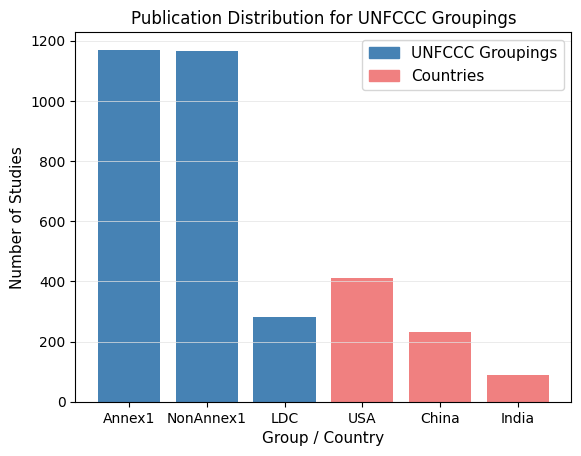

In [27]:
# Old Code
# # Calculate the total number of males and females
# total_annex1 = data_subset['Annex1'].sum()
# total_non_annex1 = data_subset['NonAnnex1'].sum()
# total_ldc = data_subset['LDC'].sum()
# total_china = data_subset['China'].sum()
# total_india = data_subset['India'].sum()
# total_usa = data_subset['USA'].sum()
# # total_brazil = data_subset['Brazil'].sum()

# Skewness - New Code
# total_annex1 = data_grouped[data_grouped['ResearchRegion'] == 'Annex1']['DOI'].count()
# total_non_annex1 = data_grouped[data_grouped['ResearchRegion'] == 'NonAnnex1']['DOI'].count()
# total_ldc = data_grouped[data_grouped['ResearchRegion'] == 'LDC']['DOI'].count()
# total_china = data_grouped[data_grouped['ResearchRegion'] == 'China']['DOI'].count()
# total_india = data_grouped[data_grouped['ResearchRegion'] == 'India']['DOI'].count()
# total_usa = data_grouped[data_grouped['ResearchRegion'] == 'USA']['DOI'].count()

total_annex1 = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'Annex1' in x)]['DOI'].count()
total_non_annex1 = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'NonAnnex1' in x)]['DOI'].count()
total_ldc = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'LDC' in x)]['DOI'].count()
total_china = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'China' in x)]['DOI'].count()
total_india = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'India' in x)]['DOI'].count()
total_usa = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'USA' in x)]['DOI'].count()

# Define colors and hatch patterns for each bar
colors = ['steelblue', 'steelblue', 'steelblue', 'lightcoral', 'lightcoral', 'lightcoral']

# Create custom legend patches
region_patch = mpatches.Patch(color='steelblue', label='UNFCCC Groupings')
country_patch = mpatches.Patch(color='lightcoral', label='Countries')
plt.legend(handles=[region_patch, country_patch], fontsize=11)

# Plot the counts
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.bar(['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India'], [total_annex1, total_non_annex1, total_ldc, total_usa, total_china, total_india], color=colors)
plt.xlabel('Group / Country', fontsize=11)
plt.ylabel('Number of Studies', fontsize=11)
# plt.ylim(0, 500)
plt.title('Publication Distribution for UNFCCC Groupings')
plt.show()

In [28]:
# Create the data
categories = ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']
counts = [
    data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'Annex1' in x)]['DOI'].count(),
    data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'NonAnnex1' in x)]['DOI'].count(),
    data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'LDC' in x)]['DOI'].count(),
    data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'USA' in x)]['DOI'].count(),
    data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'China' in x)]['DOI'].count(),
    data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'India' in x)]['DOI'].count(),
]
groupings = ['Region', 'Region', 'Region', 'Country', 'Country', 'Country']

# Create a DataFrame
plot_data = pd.DataFrame({
    'Category': categories,
    'Count': counts,
    'Grouping': groupings
})

# Plot using Plotly Express
fig = px.bar(
    plot_data,
    x='Category',
    y='Count',
    color='Grouping',
    title='Publication Distribution for UNFCCC Groupings',
    labels={'Category': 'Group / Country', 'Count': 'Number of Studies'},
    color_discrete_map={'Region': 'steelblue', 'Country': 'lightcoral'}
)

# Customize layout
fig.update_layout(
    legend_title_text='Grouping',
    xaxis_title='Group / Country',
    yaxis_title='Number of Studies',
    yaxis=dict(gridcolor='#e3e3e3'),
)

fig.show()

In [29]:
total_annex1, total_non_annex1, total_ldc, total_china, total_india, total_usa

(1170, 1165, 280, 231, 89, 410)

In [30]:
total = total_annex1 + total_non_annex1

In [31]:
total_usa / total

0.17558886509635974

In [32]:
test = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'LDC' in x)]['Regions_updated']
test = test.explode('Regions_updated')
test_list = list(test.unique())
counter_list = []
for country in test_list:
  if country in [c.lower() for c in ldc]:
    counter_list.append(country)

In [33]:
len(counter_list)

18

In [34]:
total_annex1

1170

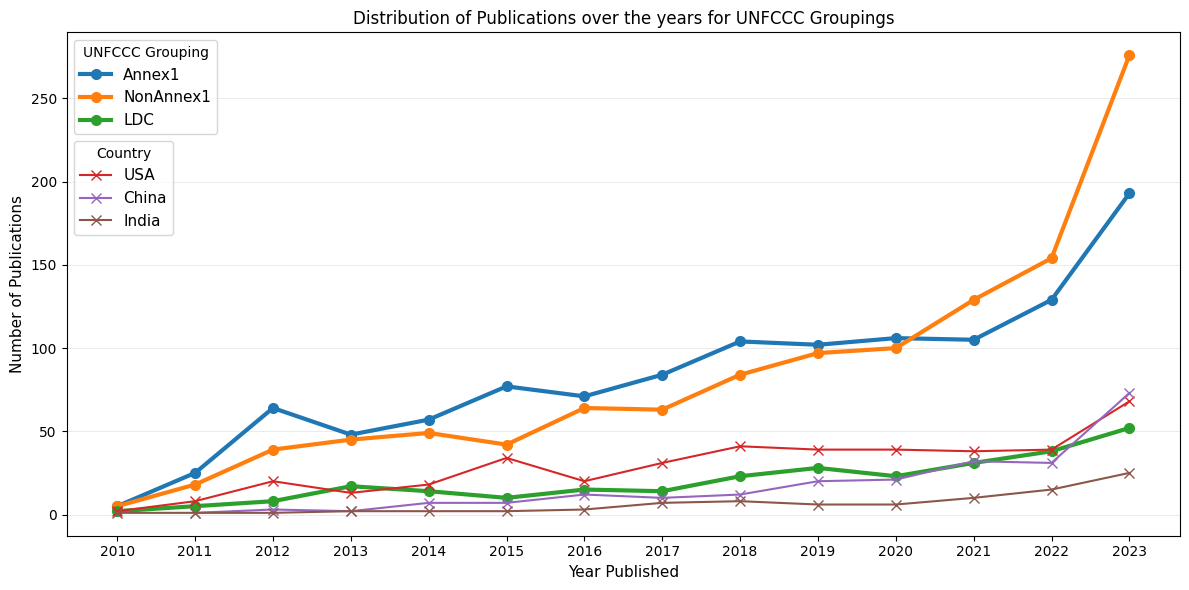

In [35]:
# Old Code
# # Group by 'Year Published' and sum the binary columns
# grouped = data_grouped.groupby('Year Published').sum()

# plt.figure(figsize=(15, 6))
# plt.plot(grouped.index, grouped['Annex1'], label='Annex1')
# plt.plot(grouped.index, grouped['NonAnnex1'], label='NonAnnex1')
# plt.plot(grouped.index, grouped['LDC'], label='LDC')
# plt.plot(grouped.index, grouped['USA'], label='USA')
# plt.plot(grouped.index, grouped['China'], label='China')
# plt.plot(grouped.index, grouped['India'], label='India')
# # plt.plot(grouped.index, grouped['Brazil'], label='Brazil')

# plt.xlabel('Year Published')
# plt.ylabel('Total Number of Studies')
# plt.title('Distribution of Studies over the Years')
# plt.legend()
# plt.show()

region_handles = []
country_handles = []

fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each ResearchRegion and plot the counts by year
for research_region in research_regions:
    # counts = data_grouped[data_grouped['ResearchRegion'] == research_region].groupby('Year Published').size()
    counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)].groupby('Year Published')['DOI'].count()
    # Determine line width and marker based on region type
    if research_region in ['USA', 'China', 'India']:
        line, = ax.plot(counts.index, counts.values, marker='x', markersize=7, linewidth=1.5, label=research_region)
        country_handles.append(line)
    else:
        line, = ax.plot(counts.index, counts.values, marker='o', markersize=7, linewidth=3, label=research_region)
        region_handles.append(line)

# First legend for regions
region_legend = ax.legend(handles=region_handles, loc='upper left', title='UNFCCC Grouping', fontsize=11)

# Second legend for countries, placed below the region legend
ax.add_artist(region_legend)  # Add the region legend first
ax.legend(handles=country_handles, loc='upper left', bbox_to_anchor=(0, 0.8), title='Country', fontsize=11)

# Add a custom legend for line thickness
# region_line = mlines.Line2D([], [], color='black', linewidth=2.5, label='Region')
# country_line = mlines.Line2D([], [], color='black', linewidth=1.5, label='Country')
# plt.legend(handles=[region_line, country_line], loc='upper left', title='Line Thickness')

plt.title('Distribution of Publications over the years for UNFCCC Groupings')
plt.xlabel('Year Published', fontsize=11)
plt.ylabel('Number of Publications', fontsize=11)
plt.xticks(counts.index)
# plt.legend(title='Region')
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [36]:
# List of regions and countries
research_regions = ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']

# Prepare data for Plotly
plot_data = []

# Group data by year and research region
for research_region in research_regions:
    counts = (
        data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)]
        .groupby('Year Published')
        .size()
        .reset_index(name='Count')
    )
    counts['ResearchRegion'] = research_region
    plot_data.append(counts)

# Combine all regions into a single DataFrame
plot_data = pd.concat(plot_data, ignore_index=True)

# Determine line style based on region type
plot_data['LineStyle'] = plot_data['ResearchRegion'].apply(
    lambda x: 'dash' if x in ['USA', 'China', 'India'] else 'solid'
)
plot_data['Marker'] = plot_data['ResearchRegion'].apply(
    lambda x: 'diamond' if x in ['USA', 'China', 'India'] else 'circle'
)

# Create an interactive line plot
fig = px.line(
    plot_data,
    x='Year Published',
    y='Count',
    color='ResearchRegion',
    line_dash='LineStyle',
    symbol='Marker',
    title='Distribution of Publications over the Years for UNFCCC Groupings',
    labels={'Year Published': 'Year Published', 'Count': 'Number of Publications', 'ResearchRegion': 'Grouping'},
    hover_data={'LineStyle': False, 'Marker': False}
)

# Update layout for customization
fig.update_layout(
    legend_title_text='Grouping',
    xaxis_title='Year Published',
    yaxis_title='Number of Publications',
    xaxis=dict(tickmode='linear'),  # Ensure all years appear
    yaxis=dict(gridcolor='#e3e3e3'),
    plot_bgcolor='white',
    legend=dict(
        title_font_size=11,
        font_size=11,
        tracegroupgap=10,  # Space between grouped legends
    ),
    hoverlabel=dict(
        bgcolor="white",  # Background color for hover box
        font_size=11,
    ),
)

# Simplify legend labels
fig.for_each_trace(
    lambda trace: trace.update(
        name=trace.name.split(",")[0],  # Remove appended styles (e.g., "dash, x")
        showlegend=True,
        mode='lines+markers',
    )
)

# Show the plot
fig.show()

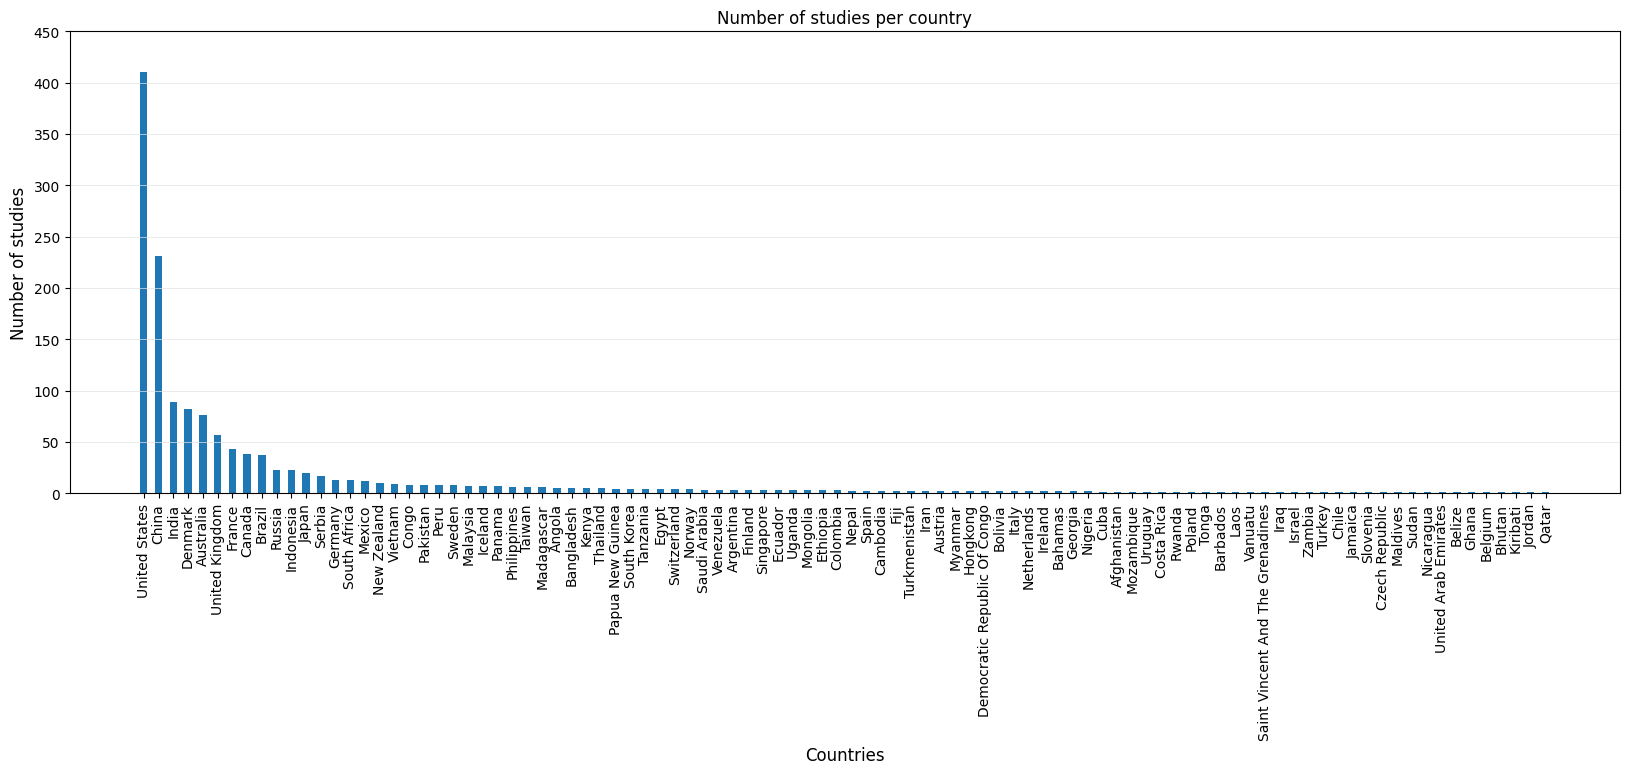

In [37]:
# Old Code
# country_data = data_grouped[~data_subset['Regions_updated'].isin(non_annex1_regions + other_regions)]

# value_counts = country_data['Regions_updated'].value_counts()

# # Plot the chart
# plt.figure(figsize=(20, 6))
# plt.bar(value_counts.index, value_counts.values, width=0.5)
# plt.xlabel('Countries')
# plt.ylabel('Number of studies')
# plt.title('Number of studies per country')
# plt.xticks(rotation=90)
# plt.show()

# New Code - Skewness

country_data = data_grouped['Regions_updated']
country_data = pd.DataFrame(country_data.explode(['Regions_updated']))
country_data = country_data[~country_data['Regions_updated'].isin(exclude_regions)]
all_country_publications = country_data['Regions_updated'].value_counts()

# Plot the chart
plt.figure(figsize=(20, 6))
plt.bar(all_country_publications.index.str.title(), all_country_publications.values, width=0.5)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of studies', fontsize=12)
plt.title('Number of studies per country')
plt.xticks(rotation=90)
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.ylim(0, 450)
plt.show()

# Welsch Test

In [38]:
all_country_publications

Regions_updated
united states    410
china            231
india             89
denmark           82
australia         76
                ... 
belgium            1
bhutan             1
kiribati           1
jordan             1
qatar              1
Name: count, Length: 96, dtype: int64

In [39]:
all_country_publications.keys()

Index(['united states', 'china', 'india', 'denmark', 'australia',
       'united kingdom', 'france', 'canada', 'brazil', 'russia', 'indonesia',
       'japan', 'serbia', 'germany', 'south africa', 'mexico', 'new zealand',
       'vietnam', 'congo', 'pakistan', 'peru', 'sweden', 'malaysia', 'iceland',
       'panama', 'philippines', 'taiwan', 'madagascar', 'angola', 'bangladesh',
       'kenya', 'thailand', 'papua new guinea', 'south korea', 'tanzania',
       'egypt', 'switzerland', 'norway', 'saudi arabia', 'venezuela',
       'argentina', 'finland', 'singapore', 'ecuador', 'uganda', 'mongolia',
       'ethiopia', 'colombia', 'nepal', 'spain', 'cambodia', 'fiji',
       'turkmenistan', 'iran', 'austria', 'myanmar', 'hongkong',
       'democratic republic of congo', 'bolivia', 'italy', 'netherlands',
       'ireland', 'bahamas', 'georgia', 'nigeria', 'cuba', 'afghanistan',
       'mozambique', 'uruguay', 'costa rica', 'rwanda', 'poland', 'tonga',
       'barbados', 'laos', 'vanuatu', '

In [40]:
annex1_country_count = []
nonannex1_country_count = []
for country in annex1:
  if country.lower() in all_country_publications.keys():
    annex1_country_count.append(all_country_publications[country.lower()])

for country in non_annex1:
  if country.lower() in all_country_publications.keys():
    nonannex1_country_count.append(all_country_publications[country.lower()])

In [41]:
from scipy.stats import ttest_ind

# annex1_publications = [...]  # Publication counts for each Annex-1 country
# nonannex1_publications = [...]  # Publication counts for each Non-Annex1 country
t_stat, p_value = ttest_ind(annex1_country_count, nonannex1_country_count, equal_var=False)
print(f"T-test Statistic: {t_stat}, p-value: {p_value}")

T-test Statistic: 1.4330326132067555, p-value: 0.16369341270968712


Interpretation: On a per-country basis, the publication output between Annex-1 and Non-Annex1 countries appears similar, suggesting that the total difference is likely due to group size or other aggregate effects rather than per-country disparities.

In [42]:
np.sum(annex1_country_count)

813

In [43]:
from scipy.stats import chisquare

publication_country_counts = [np.sum(annex1_country_count), np.sum(nonannex1_country_count)]
chisq_stat, p_value = chisquare(publication_country_counts)
print(f"Chi-Square Statistic: {chisq_stat}, p-value: {p_value}")


Chi-Square Statistic: 32.10828025477707, p-value: 1.4581451517579479e-08


Interpretation: There is strong evidence that the total publication counts differ more than expected by chance, even though the raw counts (1128 vs. 1133) are close. This could be due to the test's sensitivity to small proportional differences when the overall counts are large.

In [44]:
# Calculate means and standard deviations
mean_annex1 = np.mean(annex1_country_count)
std_annex1 = np.std(annex1_country_count, ddof=1)  # ddof=1 for sample std
mean_nonannex1 = np.mean(nonannex1_country_count)
std_nonannex1 = np.std(nonannex1_country_count, ddof=1)

# Calculate pooled standard deviation
n1, n2 = len(annex1_country_count), len(nonannex1_country_count)
pooled_std = np.sqrt(((n1 - 1) * std_annex1**2 + (n2 - 1) * std_nonannex1**2) / (n1 + n2 - 2))

# Calculate Cohen's d
cohens_d = (mean_annex1 - mean_nonannex1) / pooled_std
print(f"Cohen's d: {cohens_d}")

Cohen's d: 0.49573822871950735


In [45]:
mean_ratio = mean_annex1 / mean_nonannex1
print(f"Ratio of Means: {mean_ratio}")

Ratio of Means: 3.8482000000000007


# Journal Wise Counts

In [46]:
# data_subset['Journal'].value_counts()
# data_grouped['Journal'].value_counts()

In [47]:
# Old code
# # Calculate the total number of males and females
# total_annex1 = data_subset.groupby('Journal')['Annex1'].sum()
# total_non_annex1 = data_subset.groupby('Journal')[['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']].sum()

# # Set up color scheme
# color_map = mpl.colormaps['tab20']  # You can change 'tab10' to another colormap like 'viridis', 'plasma', etc.
# colors = color_map.colors[:len(total_non_annex1.columns)]   # Generate as many colors as there are regions

# # Plot the counts
# ax = total_non_annex1.plot(kind='bar', stacked=False, color=colors)
# plt.xlabel('Journal')
# plt.ylabel('Number of Studies')
# plt.xticks(range(len(total_non_annex1.index)), \
#  ['Nature', 'Nature Climate', 'Nature Comm', 'Science', 'PNAS', 'NPJ'])
# plt.title('Region-Wise Distribution')
# plt.show()

In [48]:

# Old code - normalised graph
# temp_new = exploded_data[exploded_data['ResearchRegion'] != '']
# temp = temp_new.groupby('Journal')[['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']]
# new_graph = temp.sum() / temp.count()
# new_graph.plot(kind='bar', figsize=(9, 6))
# plt.xlabel('Journal')
# plt.ylabel('Number of Studies')
# plt.xticks(range(len(new_graph.index)), \
#  ['Nature', 'Nature Climate', 'Nature Comm', 'Science', 'PNAS', 'NPJ'])
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.title('Region-Wise Distribution')
# plt.show()

In [49]:
data_grouped['Journal'].value_counts()

Journal
Nature Communications                  648
Nature Climate Change                  639
npj Climate and Atmospheric Science    318
Nature                                 217
Science                                 85
PNAS                                    54
Name: count, dtype: int64

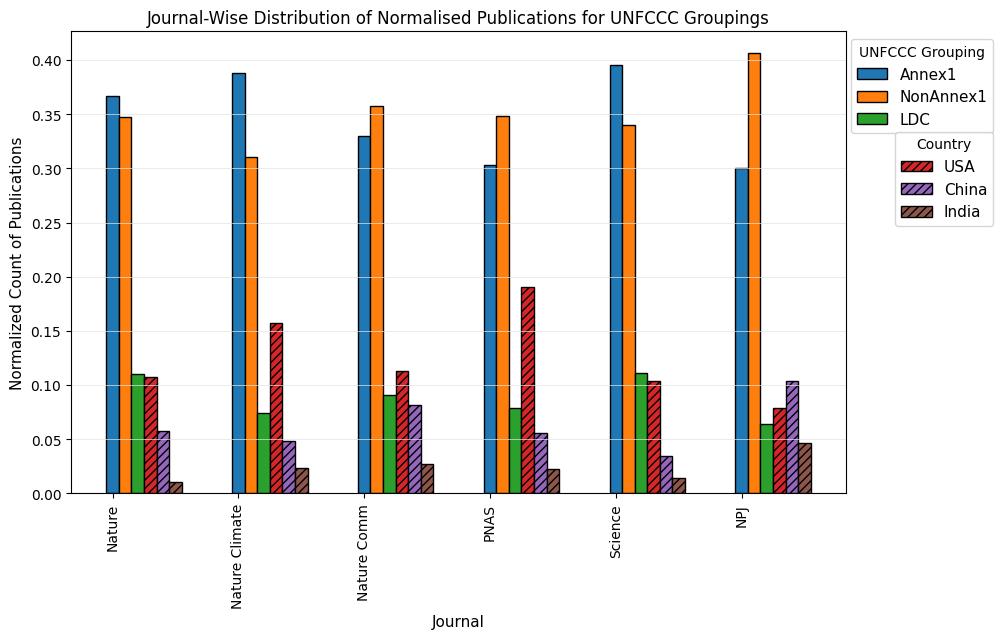

In [50]:
data_journal = data_grouped[['Journal', 'ResearchRegion', 'DOI']]
data_journal = data_journal.explode('ResearchRegion')
data_journal = data_journal.groupby(['Journal', 'ResearchRegion'])['DOI'].count().reset_index()
data_journal.columns = ['Journal', 'ResearchRegion', 'RegionCounts']

data_journal_norm = data_journal.groupby('Journal')['RegionCounts'].sum().reset_index()
data_journal_norm.columns = ['Journal', 'JournalCounts']

data_journal = pd.merge(data_journal, data_journal_norm, on='Journal', how='left')
data_journal['NormalisedCount'] = data_journal['RegionCounts'] / data_journal['JournalCounts']

journals = data_journal['Journal'].unique()
regions = ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']
values = {region: [] for region in regions}

for region in regions:
    for journal in journals:
        count = data_journal[(data_journal['Journal'] == journal) & (data_journal['ResearchRegion'] == region)]
        values[region].append(count['NormalisedCount'].values[0] if not count.empty else 0)

x = np.arange(len(journals))
bar_width = 0.1
fig, ax = plt.subplots(figsize=(10, 6))

for i, region in enumerate(regions):
    ax.bar(x + i * bar_width, values[region], width=bar_width, label=region,
           hatch='////' if region in ['USA', 'China', 'India'] else '', edgecolor='black')

colors = plt.cm.tab10.colors
region_patches = [mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % len(colors)], edgecolor='black') for i in range(3)]
country_patches = [mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % len(colors)], edgecolor='black', hatch='////') for i in range(3, 6)]

region_legend = ax.legend(handles=region_patches, labels=['Annex1', 'NonAnnex1', 'LDC'], title='UNFCCC Grouping', loc='upper right',
          bbox_to_anchor=(1.2, 1), frameon=True, fontsize=11)
country_legend = ax.legend(handles=country_patches, labels=['USA', 'China', 'India'], title='Country', loc='upper right',
          bbox_to_anchor=(1.2, 0.8), frameon=True, fontsize=11)
ax.add_artist(region_legend)

# Formatting the plot
plt.title('Journal-Wise Distribution of Normalised Publications for UNFCCC Groupings')
plt.ylabel('Normalized Count of Publications', fontsize=11)
plt.xlabel('Journal', fontsize=11)
plt.xticks(range(0, 6), ['Nature', 'Nature Climate', 'Nature Comm', 'PNAS', 'Science', 'NPJ'], rotation=90)
# plt.ylim(0, 0.45)
# plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.show()

In [51]:
# Prepare the data in long format
data_journal = data_grouped[['Journal', 'ResearchRegion', 'DOI']]
data_journal = data_journal.explode('ResearchRegion')
data_journal = data_journal.groupby(['Journal', 'ResearchRegion'])['DOI'].count().reset_index()
data_journal.columns = ['Journal', 'ResearchRegion', 'RegionCounts']

data_journal_norm = data_journal.groupby('Journal')['RegionCounts'].sum().reset_index()
data_journal_norm.columns = ['Journal', 'JournalCounts']

data_journal = pd.merge(data_journal, data_journal_norm, on='Journal', how='left')
data_journal['NormalizedCount'] = data_journal['RegionCounts'] / data_journal['JournalCounts']

# Grouped bar chart
fig = go.Figure()

regions = ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']
hatch_patterns = {'USA': '\\', 'China': '\\', 'India': '\\', 'Annex1': None, 'NonAnnex1': None, 'LDC': None}

# Create a bar for each region
for region in regions:
    region_data = data_journal[data_journal['ResearchRegion'] == region]
    fig.add_trace(go.Bar(
        x=region_data['Journal'],
        y=region_data['NormalizedCount'],
        name=region,
        marker=dict(
            pattern_shape=hatch_patterns[region],  # Apply hatch pattern for specific regions
            line=dict(color='black', width=1)
        )
    ))

# Layout for the plot
fig.update_layout(
    barmode='group',
    title='Journal-Wise Distribution of Normalized Publications for UNFCCC Groupings',
    xaxis=dict(title='Journal', tickangle=90),
    yaxis=dict(title='Normalized Count of Publications'),
    legend_title_text='Grouping',
    template='plotly_white'
)

fig.show()

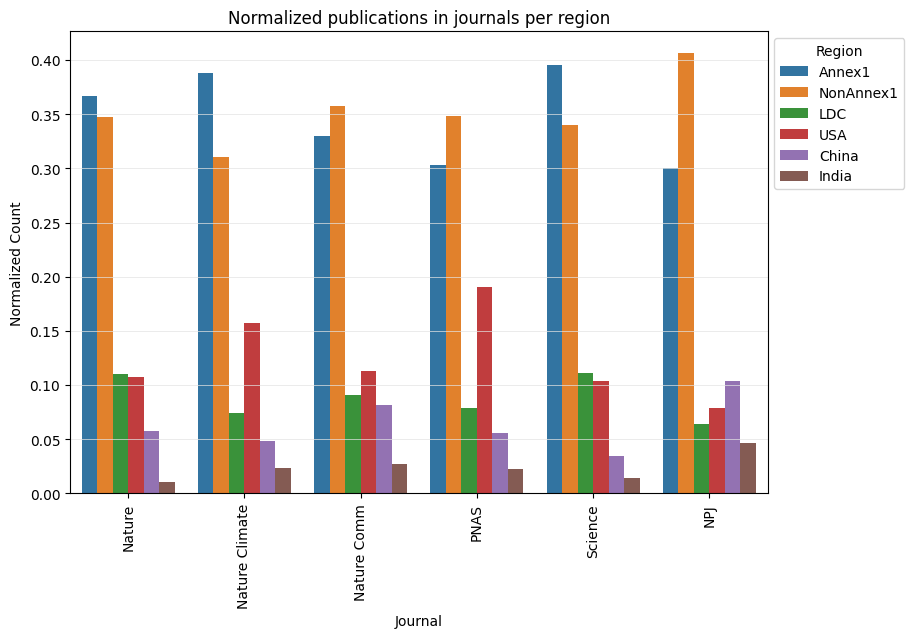

In [52]:
data_journal = data_grouped[['Journal', 'ResearchRegion', 'DOI']]
data_journal = data_journal.explode('ResearchRegion')
data_journal = data_journal.groupby(['Journal', 'ResearchRegion'])['DOI'].count().reset_index()
data_journal.columns = ['Journal', 'ResearchRegion', 'RegionCounts']

data_journal_norm = data_journal.groupby('Journal')['RegionCounts'].sum().reset_index()
data_journal_norm.columns = ['Journal', 'JournalCounts']

data_journal = pd.merge(data_journal, data_journal_norm, on='Journal', how='left')
data_journal['NormalisedCount'] = data_journal['RegionCounts'] / data_journal['JournalCounts']
# data_journal

# Create a grouped bar plot
plt.figure(figsize=(9, 6))
sns.barplot(data=data_journal, x='Journal', y='NormalisedCount', hue='ResearchRegion',\
            hue_order=['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India'])

# Formatting the plot
plt.title('Normalized publications in journals per region')
plt.ylabel('Normalized Count')
plt.xlabel('Journal')
plt.xticks(range(0, 6), ['Nature', 'Nature Climate', 'Nature Comm', 'PNAS', 'Science', 'NPJ'], rotation=90,)
# plt.ylim(0, 0.45)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.show()

# **Citation Analysis**

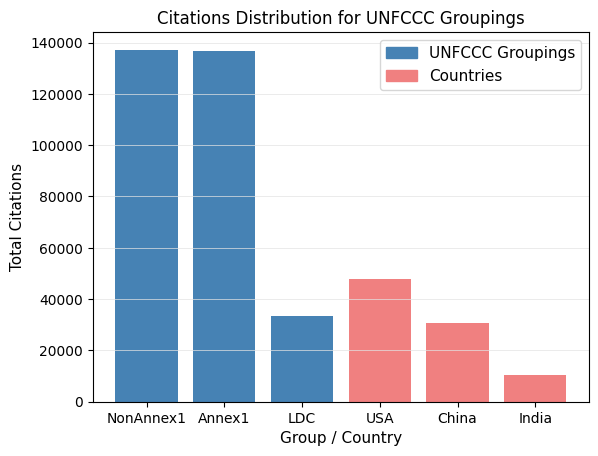

In [53]:
# Old Code
# annex1_citations = data_subset.groupby('Annex1')['Citation'].sum()[1]
# non_annex1_citations = data_subset.groupby('NonAnnex1')['Citation'].sum()[1]
# ldc_citations = data_subset.groupby('LDC')['Citation'].sum()[1]
# usa_citations = data_subset.groupby('USA')['Citation'].sum()[1]
# china_citations = data_subset.groupby('China')['Citation'].sum()[1]
# india_citations = data_subset.groupby('India')['Citation'].sum()[1]
# # brazil_citations = data_subset.groupby('Brazil')['Citation'].sum()[1]

# plt.bar(['NonAnnex1', 'USA', 'Annex1', 'China', 'India', 'LDC'], \
#         [non_annex1_citations, usa_citations, annex1_citations, china_citations, india_citations, ldc_citations])
# plt.xlabel('Region')
# plt.ylabel('Total number of Citations')
# plt.title('Region-Wise Citations Distribution')
# plt.show()

# New Code - Skewness
annex1_citations = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'Annex1' in x)]['Citation'].sum()
non_annex1_citations = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'NonAnnex1' in x)]['Citation'].sum()
ldc_citations = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'LDC' in x)]['Citation'].sum()
usa_citations = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'USA' in x)]['Citation'].sum()
china_citations = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'China' in x)]['Citation'].sum()
india_citations = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'India' in x)]['Citation'].sum()

# Define colors and hatch patterns for each bar
colors = ['steelblue', 'steelblue', 'steelblue', 'lightcoral', 'lightcoral', 'lightcoral']

# Create custom legend patches
region_patch = mpatches.Patch(color='steelblue', label='UNFCCC Groupings')
country_patch = mpatches.Patch(color='lightcoral', label='Countries')
plt.legend(handles=[region_patch, country_patch], fontsize=11)

plt.bar(['NonAnnex1', 'Annex1', 'LDC', 'USA', 'China', 'India'], \
        [non_annex1_citations, annex1_citations, ldc_citations, usa_citations, china_citations, india_citations], color=colors)
plt.xlabel('Group / Country', fontsize=11)
plt.ylabel('Total Citations', fontsize=11)
plt.title('Citations Distribution for UNFCCC Groupings')
# plt.ylim(0, 60000)
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.show()

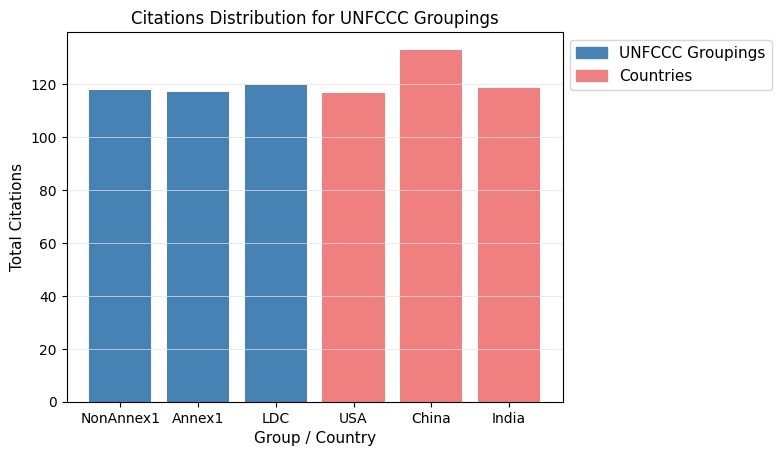

In [54]:
# New Code - Skewness
annex1_citations_n = annex1_citations / total_annex1
non_annex1_citations_n = non_annex1_citations / total_non_annex1
ldc_citations_n = ldc_citations / total_ldc
usa_citations_n = usa_citations / total_usa
china_citations_n = china_citations / total_china
india_citations_n = india_citations / total_india

# Define colors and hatch patterns for each bar
colors = ['steelblue', 'steelblue', 'steelblue', 'lightcoral', 'lightcoral', 'lightcoral']

# Create custom legend patches
region_patch = mpatches.Patch(color='steelblue', label='UNFCCC Groupings')
country_patch = mpatches.Patch(color='lightcoral', label='Countries')
plt.legend(handles=[region_patch, country_patch], fontsize=11, loc='upper left', bbox_to_anchor=(1, 1))

plt.bar(['NonAnnex1', 'Annex1', 'LDC', 'USA', 'China', 'India'], \
        [non_annex1_citations_n, annex1_citations_n, ldc_citations_n, usa_citations_n, china_citations_n, india_citations_n], color=colors)
plt.xlabel('Group / Country', fontsize=11)
plt.ylabel('Total Citations', fontsize=11)
plt.title('Citations Distribution for UNFCCC Groupings')
# plt.ylim(0, 60000)
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.show()

In [55]:
print(non_annex1_citations_n, annex1_citations_n, ldc_citations_n, usa_citations_n, china_citations_n, india_citations_n)

117.78197424892704 117.00769230769231 119.54285714285714 116.54634146341463 133.021645021645 118.64044943820225


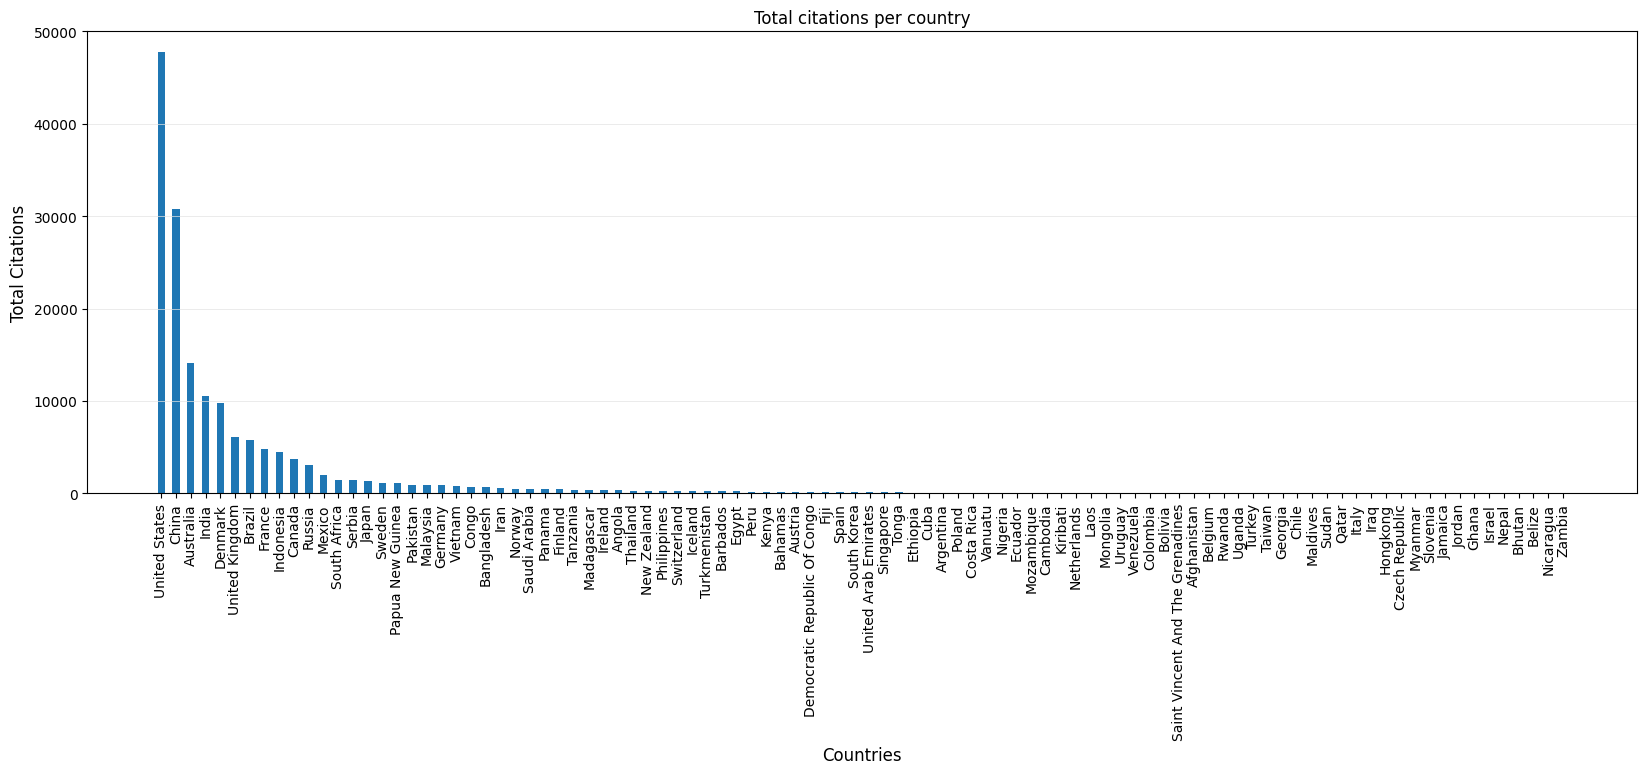

In [56]:

# Old Code
# country_data = data_subset[~data_subset['Regions_updated'].isin(regions_to_exclude)]
# country_data = data_subset[~data_subset['Regions_updated'].isin(regions_to_exclude)]
# country_wise_citations = country_data.groupby('Regions_updated')['Citation'].sum().sort_values(ascending=False)

# # Plot the chart
# plt.figure(figsize=(20, 6))
# plt.bar(country_wise_citations.index, country_wise_citations.values, width=0.5)
# plt.xlabel('Countries')
# plt.ylabel('Total Number of Citations')
# plt.title('Number of Citations per Country')
# plt.xticks(rotation=90)
# plt.show()

# New Code - skewness
country_data = data_grouped[['Regions_updated', 'Citation']]
country_data = country_data.explode(['Regions_updated'])
country_data = country_data[~country_data['Regions_updated'].isin(exclude_regions)]
all_country_citations = country_data.groupby('Regions_updated')['Citation'].sum().sort_values(ascending=False)
all_country_citations

# Plot the chart
plt.figure(figsize=(20, 6))
plt.bar(all_country_citations.index.str.title(), all_country_citations.values, width=0.5)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Total Citations', fontsize=12)
plt.title('Total citations per country')
plt.xticks(rotation=90)
plt.ylim(0, 50000)
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.show()

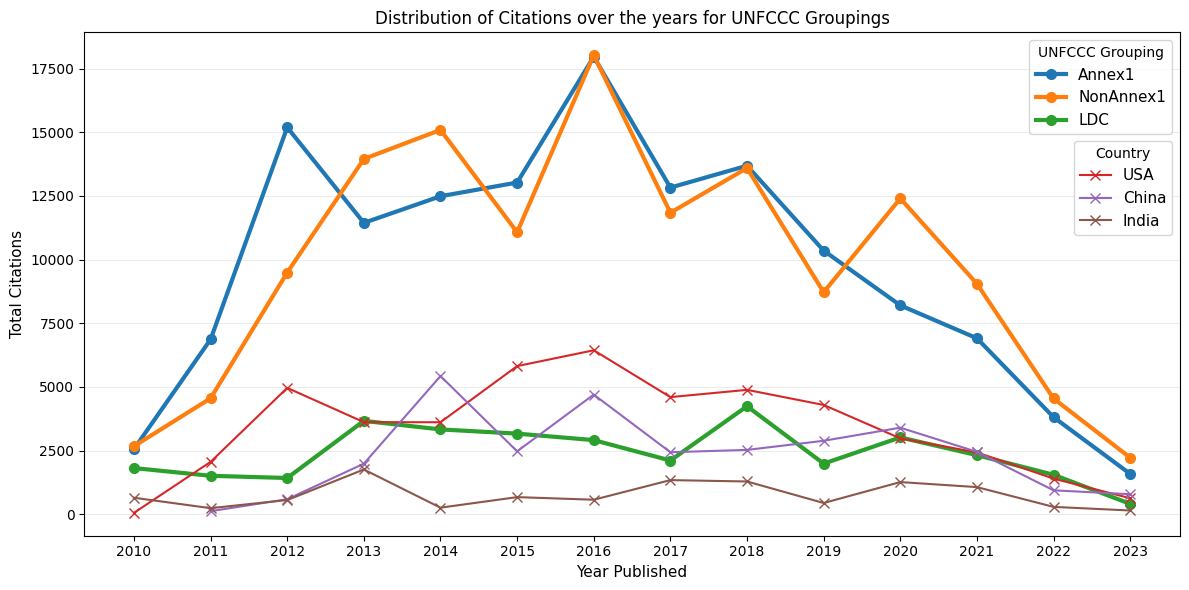

In [57]:
# Old Code

# # Group by 'Year Published' and sum the binary columns
# annex1_year_wise_citations = data_subset[data_subset['Annex1'] == 1].groupby('Year Published')['Citation'].sum()
# non_annex1_year_wise_citations = data_subset[data_subset['NonAnnex1'] == 1].groupby('Year Published')['Citation'].sum()
# ldc_year_wise_citations = data_subset[data_subset['LDC'] == 1].groupby('Year Published')['Citation'].sum()
# usa_year_wise_citations = data_subset[data_subset['USA'] == 1].groupby('Year Published')['Citation'].sum()
# china_year_wise_citations = data_subset[data_subset['China'] == 1].groupby('Year Published')['Citation'].sum()
# india_year_wise_citations = data_subset[data_subset['India'] == 1].groupby('Year Published')['Citation'].sum()
# # brazil_year_wise_citations = data_subset[data_subset['Brazil'] == 1].groupby('Year Published')['Citation'].sum()

# plt.figure(figsize=(15, 6))
# plt.plot(annex1_year_wise_citations.index, annex1_year_wise_citations.values, label='Annex1')
# plt.plot(non_annex1_year_wise_citations.index, non_annex1_year_wise_citations.values, label='NonAnnex1')
# plt.plot(ldc_year_wise_citations.index, ldc_year_wise_citations.values, label='LDC')
# plt.plot(usa_year_wise_citations.index, usa_year_wise_citations.values, label='USA')
# plt.plot(china_year_wise_citations.index, china_year_wise_citations.values, label='China')
# plt.plot(india_year_wise_citations.index, india_year_wise_citations.values, label='India')
# # plt.plot(brazil_year_wise_citations.index, brazil_year_wise_citations.values, label='Brazil')

# plt.xlabel('Year Published')
# plt.ylabel('Total Number of Citations')
# plt.title('Distribution of Citations over the Years')
# plt.legend()
# plt.show()

# New Code - Skewness

fig, ax = plt.subplots(figsize=(12, 6))

region_handles = []
country_handles = []

for research_region in research_regions:
    citation_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)].groupby('Year Published')['Citation'].sum()
    if research_region in ['USA', 'China', 'India']:
        line, = ax.plot(citation_counts.index, citation_counts.values, marker='x', markersize=7, linewidth=1.5, label=research_region)
        country_handles.append(line)
    else:
        line, = ax.plot(citation_counts.index, citation_counts.values, marker='o', markersize=7, linewidth=3, label=research_region)
        region_handles.append(line)

region_legend = ax.legend(handles=region_handles, loc='upper right', title='UNFCCC Grouping', fontsize=11)
ax.add_artist(region_legend)
ax.legend(handles=country_handles, loc='upper right', bbox_to_anchor=(1, 0.8), title='Country', fontsize=11)

# for research_region in research_regions:
#     citation_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)].groupby('Year Published')['Citation'].sum()
#     plt.plot(citation_counts.index, citation_counts.values, marker='o', markersize=3, linewidth=1.5, label=research_region)

plt.title('Distribution of Citations over the years for UNFCCC Groupings')
plt.xlabel('Year Published', fontsize=11)
plt.ylabel('Total Citations', fontsize=11)
plt.xticks(citation_counts.index)
# plt.legend(title='UNFCCC')
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

Year Published
2010     2561.0
2011     6867.0
2012    15189.0
2013    11440.0
2014    12486.0
2015    13024.0
2016    17963.0
2017    12825.0
2018    13684.0
2019    10351.0
2020     8202.0
2021     6909.0
2022     3812.0
2023     1586.0
Name: Citation, dtype: float64
Year Published
2010      5
2011     25
2012     64
2013     48
2014     57
2015     77
2016     71
2017     84
2018    104
2019    102
2020    106
2021    105
2022    129
2023    193
Name: DOI, dtype: int64

Year Published
2010     2673.0
2011     4554.0
2012     9491.0
2013    13950.0
2014    15088.0
2015    11071.0
2016    18022.0
2017    11839.0
2018    13593.0
2019     8717.0
2020    12400.0
2021     9049.0
2022     4546.0
2023     2223.0
Name: Citation, dtype: float64
Year Published
2010      5
2011     18
2012     39
2013     45
2014     49
2015     42
2016     64
2017     63
2018     84
2019     97
2020    100
2021    129
2022    154
2023    276
Name: DOI, dtype: int64

Year Published
2010    1815.0
2011    1511.0

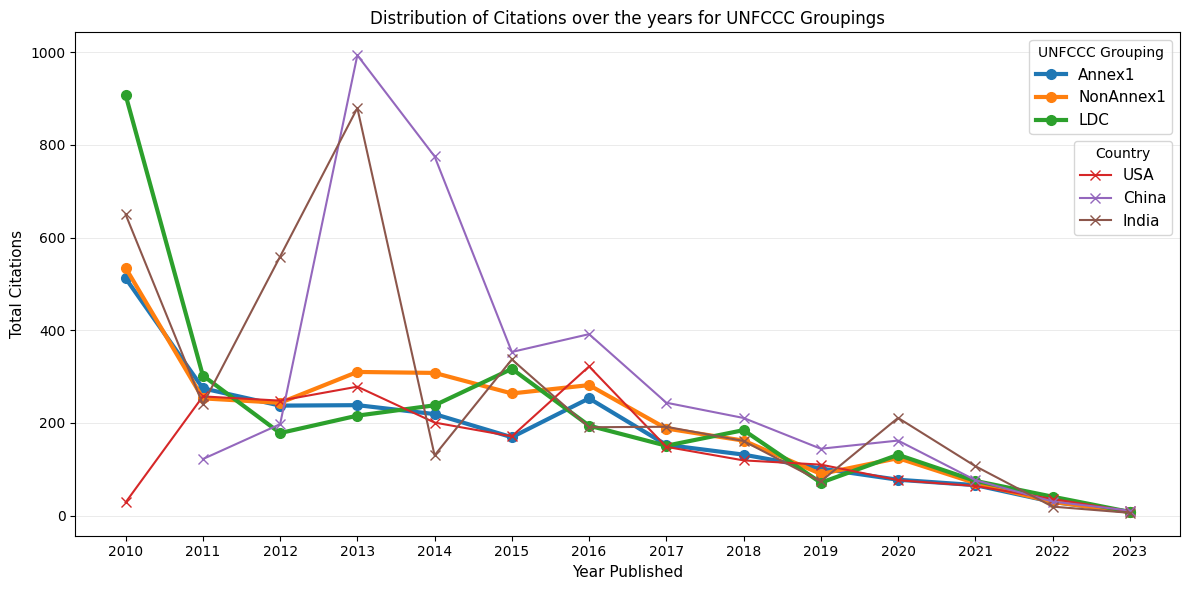

In [58]:
# Old Code

# # Group by 'Year Published' and sum the binary columns
# annex1_year_wise_citations = data_subset[data_subset['Annex1'] == 1].groupby('Year Published')['Citation'].sum()
# non_annex1_year_wise_citations = data_subset[data_subset['NonAnnex1'] == 1].groupby('Year Published')['Citation'].sum()
# ldc_year_wise_citations = data_subset[data_subset['LDC'] == 1].groupby('Year Published')['Citation'].sum()
# usa_year_wise_citations = data_subset[data_subset['USA'] == 1].groupby('Year Published')['Citation'].sum()
# china_year_wise_citations = data_subset[data_subset['China'] == 1].groupby('Year Published')['Citation'].sum()
# india_year_wise_citations = data_subset[data_subset['India'] == 1].groupby('Year Published')['Citation'].sum()
# # brazil_year_wise_citations = data_subset[data_subset['Brazil'] == 1].groupby('Year Published')['Citation'].sum()

# plt.figure(figsize=(15, 6))
# plt.plot(annex1_year_wise_citations.index, annex1_year_wise_citations.values, label='Annex1')
# plt.plot(non_annex1_year_wise_citations.index, non_annex1_year_wise_citations.values, label='NonAnnex1')
# plt.plot(ldc_year_wise_citations.index, ldc_year_wise_citations.values, label='LDC')
# plt.plot(usa_year_wise_citations.index, usa_year_wise_citations.values, label='USA')
# plt.plot(china_year_wise_citations.index, china_year_wise_citations.values, label='China')
# plt.plot(india_year_wise_citations.index, india_year_wise_citations.values, label='India')
# # plt.plot(brazil_year_wise_citations.index, brazil_year_wise_citations.values, label='Brazil')

# plt.xlabel('Year Published')
# plt.ylabel('Total Number of Citations')
# plt.title('Distribution of Citations over the Years')
# plt.legend()
# plt.show()

# New Code - Skewness

fig, ax = plt.subplots(figsize=(12, 6))

region_handles = []
country_handles = []

for research_region in research_regions:
    citation_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)].groupby('Year Published')['Citation'].sum()
    publication_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)].groupby('Year Published')['DOI'].count()
    print(citation_counts)
    print(publication_counts)
    print()
    citation_norm = citation_counts / publication_counts
    if research_region in ['USA', 'China', 'India']:
        line, = ax.plot(citation_norm.index, citation_norm.values, marker='x', markersize=7, linewidth=1.5, label=research_region)
        country_handles.append(line)
    else:
        line, = ax.plot(citation_norm.index, citation_norm.values, marker='o', markersize=7, linewidth=3, label=research_region)
        region_handles.append(line)

region_legend = ax.legend(handles=region_handles, loc='upper right', title='UNFCCC Grouping', fontsize=11)
ax.add_artist(region_legend)
ax.legend(handles=country_handles, loc='upper right', bbox_to_anchor=(1, 0.8), title='Country', fontsize=11)

# for research_region in research_regions:
#     citation_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)].groupby('Year Published')['Citation'].sum()
#     plt.plot(citation_counts.index, citation_counts.values, marker='o', markersize=3, linewidth=1.5, label=research_region)

plt.title('Distribution of Citations over the years for UNFCCC Groupings')
plt.xlabel('Year Published', fontsize=11)
plt.ylabel('Total Citations', fontsize=11)
plt.xticks(citation_counts.index)
# plt.legend(title='UNFCCC')
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

Year Published
2010      2561.0
2011      9428.0
2012     24617.0
2013     36057.0
2014     48543.0
2015     61567.0
2016     79530.0
2017     92355.0
2018    106039.0
2019    116390.0
2020    124592.0
2021    131501.0
2022    135313.0
2023    136899.0
Name: Citation, dtype: float64
Year Published
2010       5
2011      30
2012      94
2013     142
2014     199
2015     276
2016     347
2017     431
2018     535
2019     637
2020     743
2021     848
2022     977
2023    1170
Name: DOI, dtype: int64
Year Published
2010    512.200000
2011    314.266667
2012    261.882979
2013    253.922535
2014    243.934673
2015    223.068841
2016    229.193084
2017    214.280742
2018    198.203738
2019    182.715856
2020    167.687752
2021    155.071934
2022    138.498465
2023    117.007692
dtype: float64

Year Published
2010      2673.0
2011      7227.0
2012     16718.0
2013     30668.0
2014     45756.0
2015     56827.0
2016     74849.0
2017     86688.0
2018    100281.0
2019    108998.0
2020    12139

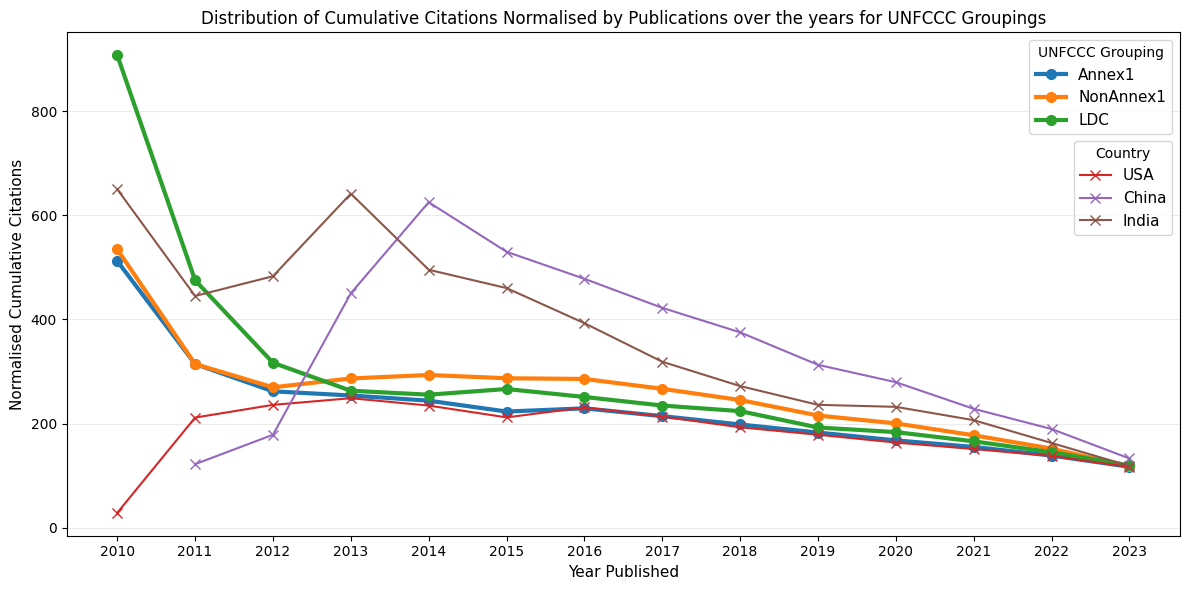

In [59]:
# # Group by 'Year Published' and sum the binary columns
# annex1_year_wise_citations = data_subset[data_subset['Annex1'] == 1].groupby('Year Published')['Citation'].sum().cumsum()
# non_annex1_year_wise_citations = data_subset[data_subset['NonAnnex1'] == 1].groupby('Year Published')['Citation'].sum().cumsum()
# ldc_year_wise_citations = data_subset[data_subset['LDC'] == 1].groupby('Year Published')['Citation'].sum().cumsum()
# usa_year_wise_citations = data_subset[data_subset['USA'] == 1].groupby('Year Published')['Citation'].sum().cumsum()
# china_year_wise_citations = data_subset[data_subset['China'] == 1].groupby('Year Published')['Citation'].sum().cumsum()
# india_year_wise_citations = data_subset[data_subset['India'] == 1].groupby('Year Published')['Citation'].sum().cumsum()
# # brazil_year_wise_citations = data_subset[data_subset['Brazil'] == 1].groupby('Year Published')['Citation'].sum().cumsum()

# plt.figure(figsize=(15, 6))
# plt.plot(annex1_year_wise_citations.index, annex1_year_wise_citations.values, label='Annex1')
# plt.plot(non_annex1_year_wise_citations.index, non_annex1_year_wise_citations.values, label='NonAnnex1')
# plt.plot(ldc_year_wise_citations.index, ldc_year_wise_citations.values, label='LDC')
# plt.plot(usa_year_wise_citations.index, usa_year_wise_citations.values, label='USA')
# plt.plot(china_year_wise_citations.index, china_year_wise_citations.values, label='China')
# plt.plot(india_year_wise_citations.index, india_year_wise_citations.values, label='India')
# # plt.plot(brazil_year_wise_citations.index, brazil_year_wise_citations.values, label='Brazil')

# plt.xlabel('Year Published')
# plt.ylabel('Cumulative Number of Citations')
# plt.title('Distribution of Cumulative Citations over the Years')
# plt.legend()
# plt.show()

# New Code - Skewness

fix, ax = plt.subplots(figsize=(12, 6))

region_handles = []
country_handles = []

for research_region in research_regions:
    cumulative_citation_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)]\
                                                                            .groupby('Year Published')['Citation'].sum().cumsum()
    cumulative_publication_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)]\
                                                                            .groupby('Year Published')['DOI'].count().cumsum()

    norm_cumulative_count = cumulative_citation_counts / cumulative_publication_counts
    print(cumulative_citation_counts)
    print(cumulative_publication_counts)
    print(norm_cumulative_count)
    print()

    if research_region in ['USA', 'China', 'India']:
        line, = ax.plot(norm_cumulative_count.index, norm_cumulative_count.values, marker='x', markersize=7, linewidth=1.5, label=research_region)
        country_handles.append(line)
    else:
        line, = ax.plot(norm_cumulative_count.index, norm_cumulative_count.values, marker='o', markersize=7, linewidth=3, label=research_region)
        region_handles.append(line)

region_legend = ax.legend(handles=region_handles, loc='upper right', title='UNFCCC Grouping', fontsize=11)
ax.add_artist(region_legend)
ax.legend(handles=country_handles, loc='upper right', bbox_to_anchor=(1, 0.8), title='Country', fontsize=11)

# for research_region in research_regions:
#     cumulative_citation_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)]\
#                                                                             .groupby('Year Published')['Citation'].sum().cumsum()
#     plt.plot(cumulative_citation_counts.index, cumulative_citation_counts.values, marker='o', markersize=3, linewidth=1.5, label=research_region)

plt.title('Distribution of Cumulative Citations Normalised by Publications over the years for UNFCCC Groupings')
plt.xlabel('Year Published', fontsize=11)
plt.ylabel('Normalised Cumulative Citations', fontsize=11)
plt.xticks(norm_cumulative_count.index)
# plt.legend(title='Region')
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.tight_layout()
# plt.ylim(0, 60000)
plt.show()

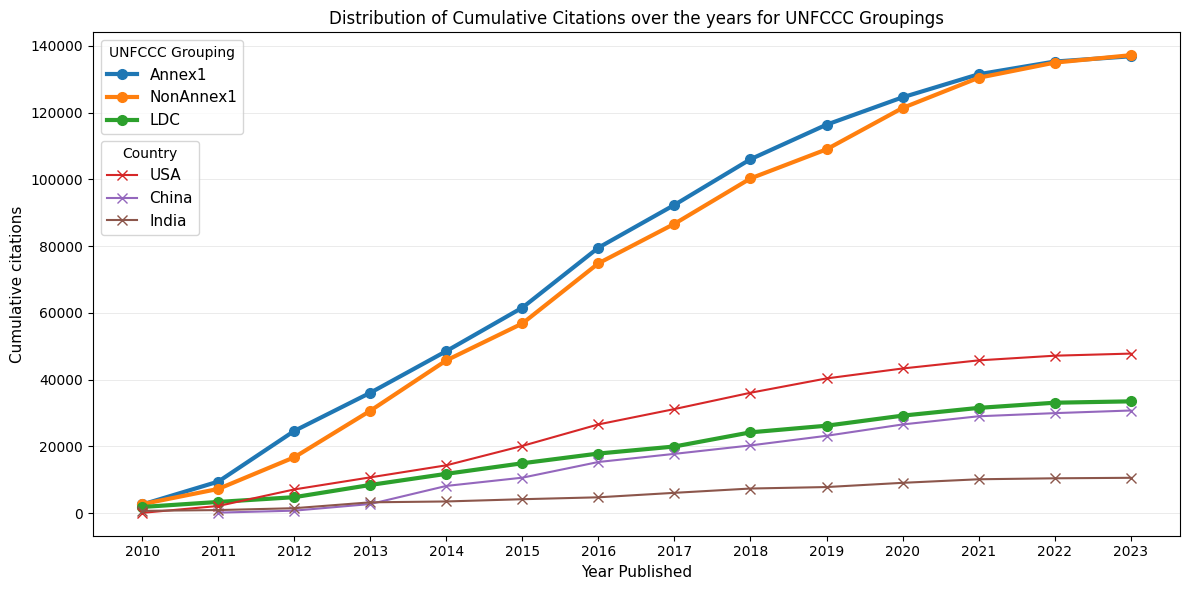

In [60]:
# # Group by 'Year Published' and sum the binary columns
# annex1_year_wise_citations = data_subset[data_subset['Annex1'] == 1].groupby('Year Published')['Citation'].sum().cumsum()
# non_annex1_year_wise_citations = data_subset[data_subset['NonAnnex1'] == 1].groupby('Year Published')['Citation'].sum().cumsum()
# ldc_year_wise_citations = data_subset[data_subset['LDC'] == 1].groupby('Year Published')['Citation'].sum().cumsum()
# usa_year_wise_citations = data_subset[data_subset['USA'] == 1].groupby('Year Published')['Citation'].sum().cumsum()
# china_year_wise_citations = data_subset[data_subset['China'] == 1].groupby('Year Published')['Citation'].sum().cumsum()
# india_year_wise_citations = data_subset[data_subset['India'] == 1].groupby('Year Published')['Citation'].sum().cumsum()
# # brazil_year_wise_citations = data_subset[data_subset['Brazil'] == 1].groupby('Year Published')['Citation'].sum().cumsum()

# plt.figure(figsize=(15, 6))
# plt.plot(annex1_year_wise_citations.index, annex1_year_wise_citations.values, label='Annex1')
# plt.plot(non_annex1_year_wise_citations.index, non_annex1_year_wise_citations.values, label='NonAnnex1')
# plt.plot(ldc_year_wise_citations.index, ldc_year_wise_citations.values, label='LDC')
# plt.plot(usa_year_wise_citations.index, usa_year_wise_citations.values, label='USA')
# plt.plot(china_year_wise_citations.index, china_year_wise_citations.values, label='China')
# plt.plot(india_year_wise_citations.index, india_year_wise_citations.values, label='India')
# # plt.plot(brazil_year_wise_citations.index, brazil_year_wise_citations.values, label='Brazil')

# plt.xlabel('Year Published')
# plt.ylabel('Cumulative Number of Citations')
# plt.title('Distribution of Cumulative Citations over the Years')
# plt.legend()
# plt.show()

# New Code - Skewness

fix, ax = plt.subplots(figsize=(12, 6))

region_handles = []
country_handles = []

for research_region in research_regions:
    cumulative_citation_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)]\
                                                                            .groupby('Year Published')['Citation'].sum().cumsum()
    if research_region in ['USA', 'China', 'India']:
        line, = ax.plot(cumulative_citation_counts.index, cumulative_citation_counts.values, marker='x', markersize=7, linewidth=1.5, label=research_region)
        country_handles.append(line)
    else:
        line, = ax.plot(cumulative_citation_counts.index, cumulative_citation_counts.values, marker='o', markersize=7, linewidth=3, label=research_region)
        region_handles.append(line)

region_legend = ax.legend(handles=region_handles, loc='upper left', title='UNFCCC Grouping', fontsize=11)
ax.add_artist(region_legend)
ax.legend(handles=country_handles, loc='upper left', bbox_to_anchor=(0, 0.8), title='Country', fontsize=11)

# for research_region in research_regions:
#     cumulative_citation_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)]\
#                                                                             .groupby('Year Published')['Citation'].sum().cumsum()
#     plt.plot(cumulative_citation_counts.index, cumulative_citation_counts.values, marker='o', markersize=3, linewidth=1.5, label=research_region)

plt.title('Distribution of Cumulative Citations over the years for UNFCCC Groupings')
plt.xlabel('Year Published', fontsize=11)
plt.ylabel('Cumulative citations', fontsize=11)
plt.xticks(cumulative_citation_counts.index)
# plt.legend(title='Region')
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.tight_layout()
# plt.ylim(0, 60000)
plt.show()

# Altmetric Analysis

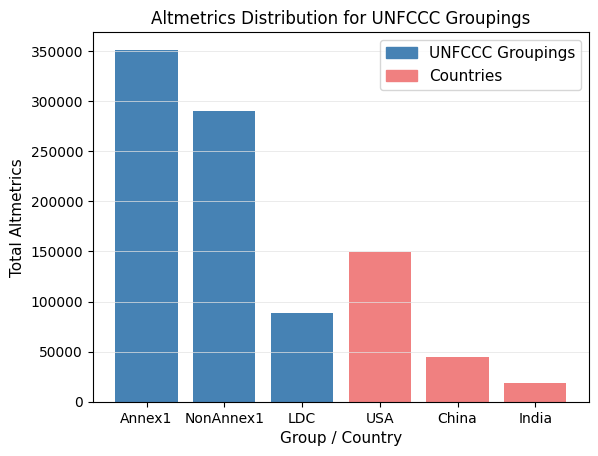

In [61]:
# Old Code
# annex1_altmetric = data_subset.groupby('Annex1')['Altmetric'].sum()[1]
# non_annex1_altmetric = data_subset.groupby('NonAnnex1')['Altmetric'].sum()[1]
# ldc_altmetric = data_subset.groupby('LDC')['Altmetric'].sum()[1]
# usa_altmetric = data_subset.groupby('USA')['Altmetric'].sum()[1]
# china_altmetric = data_subset.groupby('China')['Altmetric'].sum()[1]
# india_altmetric = data_subset.groupby('India')['Altmetric'].sum()[1]
# # brazil_altmetric = data_subset.groupby('Brazil')['Altmetric'].sum()[1]

# plt.bar(['USA', 'NonAnnex1', 'Annex1', 'China', 'India', 'LDC'], \
#         [usa_altmetric, non_annex1_altmetric, annex1_altmetric, china_altmetric, india_altmetric, ldc_altmetric])
# plt.xlabel('Region')
# plt.ylabel('Total number of Altmetrics')
# plt.title('Region-Wise Altmetrics Distribution')
# plt.show()

annex1_altmetric = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'Annex1' in x)]['Altmetric'].sum()
non_annex1_altmetric = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'NonAnnex1' in x)]['Altmetric'].sum()
ldc_altmetric = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'LDC' in x)]['Altmetric'].sum()
usa_altmetric = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'USA' in x)]['Altmetric'].sum()
china_altmetric = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'China' in x)]['Altmetric'].sum()
india_altmetric = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: 'India' in x)]['Altmetric'].sum()

# Define colors and hatch patterns for each bar
colors = ['steelblue', 'steelblue', 'steelblue', 'lightcoral', 'lightcoral', 'lightcoral']

# Create custom legend patches
region_patch = mpatches.Patch(color='steelblue', label='UNFCCC Groupings')
country_patch = mpatches.Patch(color='lightcoral', label='Countries')
plt.legend(handles=[region_patch, country_patch], fontsize=11)

plt.bar(['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India'], \
        [annex1_altmetric, non_annex1_altmetric, ldc_altmetric, usa_altmetric, china_altmetric, india_altmetric], color=colors)
plt.xlabel('Group / Country', fontsize=11)
plt.ylabel('Total Altmetrics', fontsize=11)
plt.title('Altmetrics Distribution for UNFCCC Groupings')
# plt.ylim(0, 160000)
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.show()

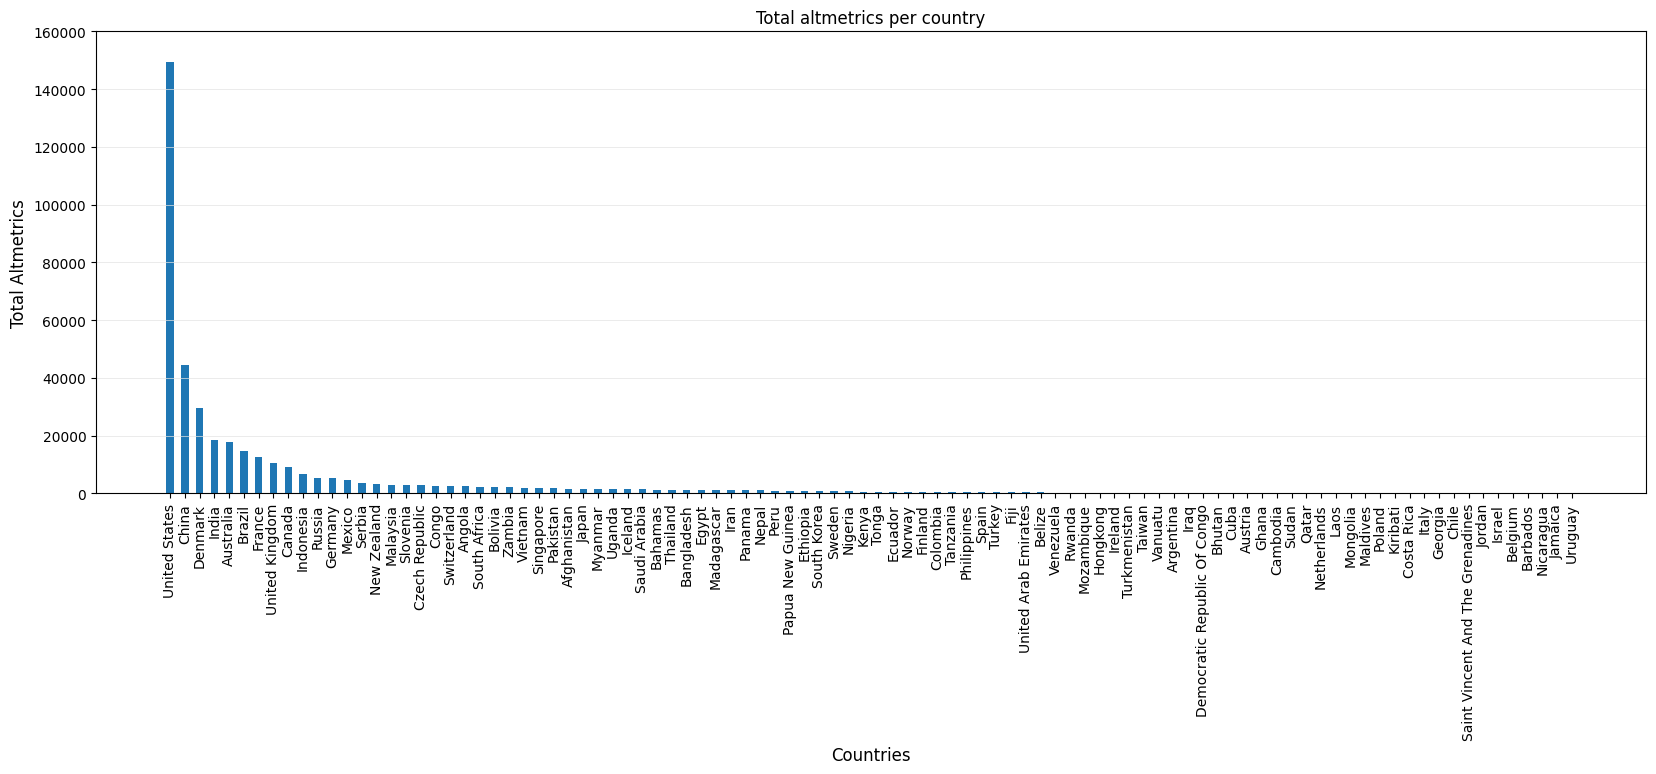

In [62]:
# country_data = data_subset[~data_subset['Regions_updated'].isin(regions_to_exclude)]
# country_wise_altmetric = country_data.groupby('Regions_updated')['Altmetric'].sum().sort_values(ascending=False)

# # Plot the chart
# plt.figure(figsize=(20, 6))
# plt.bar(country_wise_altmetric.index, country_wise_altmetric.values, width=0.5)
# plt.xlabel('Countries')
# plt.ylabel('Total Number of Altmetrics')
# plt.title('Number of Altmetrics per Country')
# plt.xticks(rotation=90)
# plt.show()

# New Code - skewness
country_data = data_grouped[['Regions_updated', 'Altmetric']]
country_data = country_data.explode(['Regions_updated'])
country_data = country_data[~country_data['Regions_updated'].isin(exclude_regions)]
all_country_altmetrics = country_data.groupby('Regions_updated')['Altmetric'].sum().sort_values(ascending=False)
all_country_altmetrics

# Plot the chart
plt.figure(figsize=(20, 6))
plt.bar(all_country_altmetrics.index.str.title(), all_country_altmetrics.values, width=0.5)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Total Altmetrics', fontsize=12)
plt.title('Total altmetrics per country')
plt.xticks(rotation=90)
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.ylim(0, 160000)
plt.show()

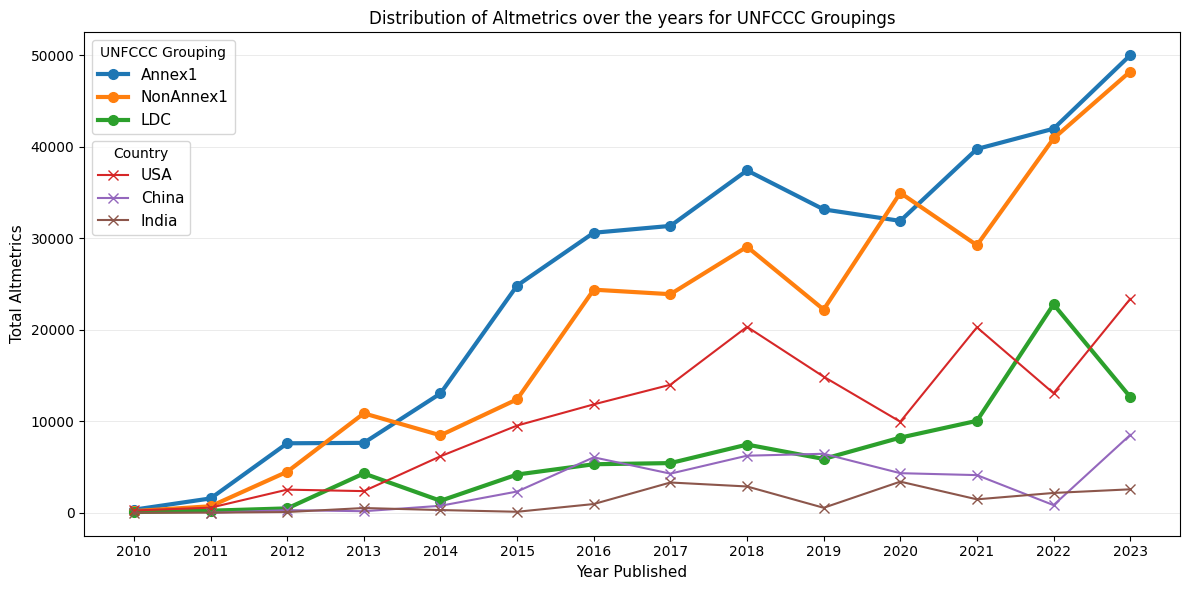

In [63]:
# Old Code
# # Group by 'Year Published' and sum the binary columns
# annex1_year_wise_altmetrics = data_subset[data_subset['Annex1'] == 1].groupby('Year Published')['Altmetric'].sum()
# non_annex1_year_wise_altmetrics = data_subset[data_subset['NonAnnex1'] == 1].groupby('Year Published')['Altmetric'].sum()
# ldc_year_wise_altmetrics = data_subset[data_subset['LDC'] == 1].groupby('Year Published')['Altmetric'].sum()
# usa_year_wise_altmetrics = data_subset[data_subset['USA'] == 1].groupby('Year Published')['Altmetric'].sum()
# china_year_wise_altmetrics = data_subset[data_subset['China'] == 1].groupby('Year Published')['Altmetric'].sum()
# india_year_wise_altmetrics = data_subset[data_subset['India'] == 1].groupby('Year Published')['Altmetric'].sum()
# # brazil_year_wise_altmetrics = data_subset[data_subset['Brazil'] == 1].groupby('Year Published')['Altmetric'].sum()

# plt.figure(figsize=(15, 6))
# plt.plot(annex1_year_wise_altmetrics.index, annex1_year_wise_altmetrics.values, label='Annex1')
# plt.plot(non_annex1_year_wise_altmetrics.index, non_annex1_year_wise_altmetrics.values, label='NonAnnex1')
# plt.plot(ldc_year_wise_altmetrics.index, ldc_year_wise_altmetrics.values, label='LDC')
# plt.plot(usa_year_wise_altmetrics.index, usa_year_wise_altmetrics.values, label='USA')
# plt.plot(china_year_wise_altmetrics.index, china_year_wise_altmetrics.values, label='China')
# plt.plot(india_year_wise_altmetrics.index, india_year_wise_altmetrics.values, label='India')
# # plt.plot(brazil_year_wise_altmetrics.index, brazil_year_wise_altmetrics.values, label='Brazil')

# plt.xlabel('Year Published')
# plt.ylabel('Total Number of Altmetrics')
# plt.title('Distribution of Altmetrics over the Years')
# plt.legend()
# plt.show()

# New Code - Skewness

fig, ax = plt.subplots(figsize=(12, 6))

region_handles = []
country_handles = []

for research_region in research_regions:
    altmetric_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)].groupby('Year Published')['Altmetric'].sum()
    if research_region in ['USA', 'China', 'India']:
        line, = ax.plot(altmetric_counts.index, altmetric_counts.values, marker='x', markersize=7, linewidth=1.5, label=research_region)
        country_handles.append(line)
    else:
        line, = ax.plot(altmetric_counts.index, altmetric_counts.values, marker='o', markersize=7, linewidth=3, label=research_region)
        region_handles.append(line)

region_legend = ax.legend(handles=region_handles, loc='upper left', title='UNFCCC Grouping', fontsize=11)
ax.add_artist(region_legend)
ax.legend(handles=country_handles, loc='upper left', bbox_to_anchor=(0, 0.8), title='Country', fontsize=11)

# for research_region in research_regions:
#     altmetric_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)].groupby('Year Published')['Altmetric'].sum()
#     plt.plot(altmetric_counts.index, altmetric_counts.values, marker='o', markersize=3, linewidth=1.5, label=research_region)

plt.title('Distribution of Altmetrics over the years for UNFCCC Groupings')
plt.xlabel('Year Published', fontsize=11)
plt.ylabel('Total Altmetrics', fontsize=11)
plt.xticks(altmetric_counts.index)
# plt.legend(title='Region')
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.tight_layout()
# plt.ylim(0, 25000)
plt.show()

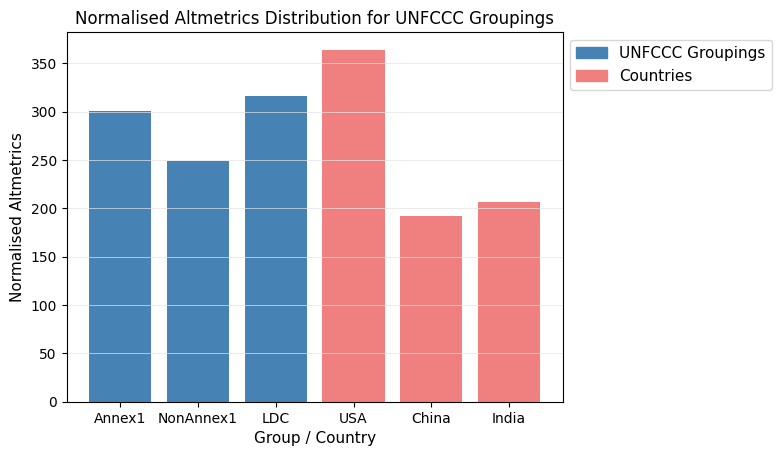

In [64]:
# New Code - Skewness
annex1_altmetrics_n = annex1_altmetric / total_annex1
non_annex1_altmetrics_n = non_annex1_altmetric / total_non_annex1
ldc_altmetrics_n = ldc_altmetric / total_ldc
usa_altmetrics_n = usa_altmetric / total_usa
china_altmetrics_n = china_altmetric / total_china
india_altmetrics_n = india_altmetric / total_india

# Define colors and hatch patterns for each bar
colors = ['steelblue', 'steelblue', 'steelblue', 'lightcoral', 'lightcoral', 'lightcoral']

# Create custom legend patches
region_patch = mpatches.Patch(color='steelblue', label='UNFCCC Groupings')
country_patch = mpatches.Patch(color='lightcoral', label='Countries')
plt.legend(handles=[region_patch, country_patch], fontsize=11, loc='upper left', bbox_to_anchor=(1, 1))

plt.bar(['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India'], \
        [annex1_altmetrics_n, non_annex1_altmetrics_n, ldc_altmetrics_n, usa_altmetrics_n, china_altmetrics_n, india_altmetrics_n], color=colors)
plt.xlabel('Group / Country', fontsize=11)
plt.ylabel('Normalised Altmetrics', fontsize=11)
plt.title('Normalised Altmetrics Distribution for UNFCCC Groupings')
# plt.ylim(0, 60000)
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.show()

In [65]:
print(annex1_altmetrics_n, non_annex1_altmetrics_n, ldc_altmetrics_n, usa_altmetrics_n, china_altmetrics_n, india_altmetrics_n)

300.27863247863246 249.0403433476395 315.9107142857143 363.96585365853656 192.4025974025974 206.8988764044944


Year Published
2010      346.0
2011     1576.0
2012     7603.0
2013     7650.0
2014    13050.0
2015    24843.0
2016    30615.0
2017    31363.0
2018    37426.0
2019    33168.0
2020    31911.0
2021    39770.0
2022    41985.0
2023    50020.0
Name: Altmetric, dtype: float64
Year Published
2010      5
2011     25
2012     64
2013     48
2014     57
2015     77
2016     71
2017     84
2018    104
2019    102
2020    106
2021    105
2022    129
2023    193
Name: DOI, dtype: int64

Year Published
2010      186.0
2011      719.0
2012     4494.0
2013    10875.0
2014     8474.0
2015    12410.0
2016    24392.0
2017    23899.0
2018    29083.0
2019    22219.0
2020    34976.0
2021    29251.0
2022    40917.0
2023    48237.0
Name: Altmetric, dtype: float64
Year Published
2010      5
2011     18
2012     39
2013     45
2014     49
2015     42
2016     64
2017     63
2018     84
2019     97
2020    100
2021    129
2022    154
2023    276
Name: DOI, dtype: int64

Year Published
2010       82.0
2011      2

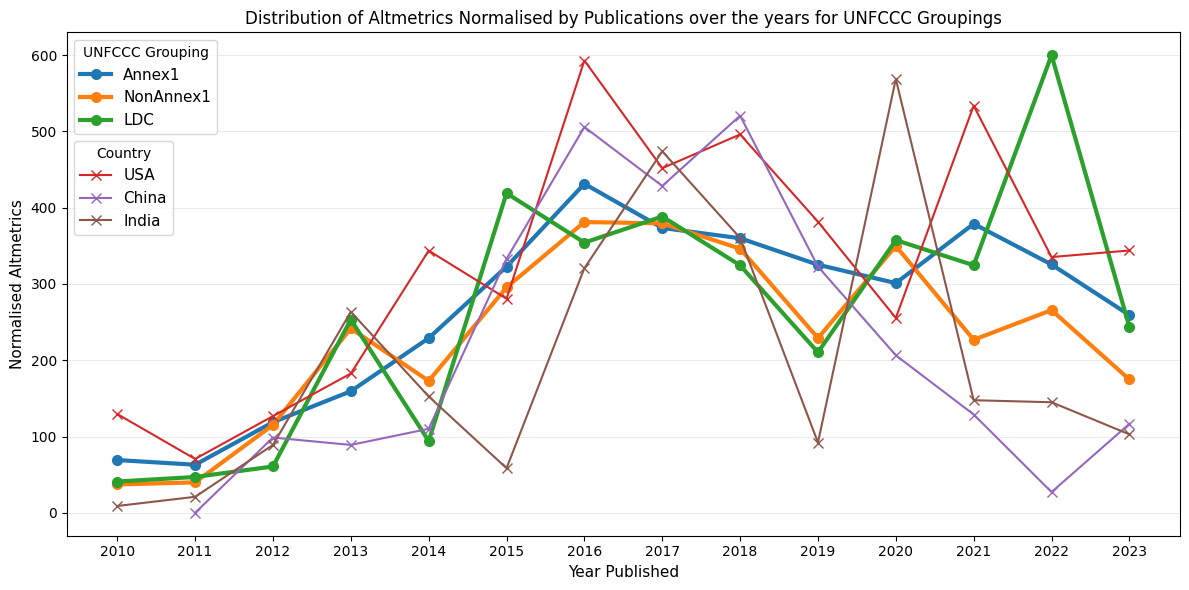

In [66]:
# Old Code

# # Group by 'Year Published' and sum the binary columns
# annex1_year_wise_citations = data_subset[data_subset['Annex1'] == 1].groupby('Year Published')['Citation'].sum()
# non_annex1_year_wise_citations = data_subset[data_subset['NonAnnex1'] == 1].groupby('Year Published')['Citation'].sum()
# ldc_year_wise_citations = data_subset[data_subset['LDC'] == 1].groupby('Year Published')['Citation'].sum()
# usa_year_wise_citations = data_subset[data_subset['USA'] == 1].groupby('Year Published')['Citation'].sum()
# china_year_wise_citations = data_subset[data_subset['China'] == 1].groupby('Year Published')['Citation'].sum()
# india_year_wise_citations = data_subset[data_subset['India'] == 1].groupby('Year Published')['Citation'].sum()
# # brazil_year_wise_citations = data_subset[data_subset['Brazil'] == 1].groupby('Year Published')['Citation'].sum()

# plt.figure(figsize=(15, 6))
# plt.plot(annex1_year_wise_citations.index, annex1_year_wise_citations.values, label='Annex1')
# plt.plot(non_annex1_year_wise_citations.index, non_annex1_year_wise_citations.values, label='NonAnnex1')
# plt.plot(ldc_year_wise_citations.index, ldc_year_wise_citations.values, label='LDC')
# plt.plot(usa_year_wise_citations.index, usa_year_wise_citations.values, label='USA')
# plt.plot(china_year_wise_citations.index, china_year_wise_citations.values, label='China')
# plt.plot(india_year_wise_citations.index, india_year_wise_citations.values, label='India')
# # plt.plot(brazil_year_wise_citations.index, brazil_year_wise_citations.values, label='Brazil')

# plt.xlabel('Year Published')
# plt.ylabel('Total Number of Citations')
# plt.title('Distribution of Citations over the Years')
# plt.legend()
# plt.show()

# New Code - Skewness

fig, ax = plt.subplots(figsize=(12, 6))

region_handles = []
country_handles = []

for research_region in research_regions:
    altmetric_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)].groupby('Year Published')['Altmetric'].sum()
    publication_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)].groupby('Year Published')['DOI'].count()
    print(altmetric_counts)
    print(publication_counts)
    print()
    altmetric_norm = altmetric_counts / publication_counts
    if research_region in ['USA', 'China', 'India']:
        line, = ax.plot(altmetric_norm.index, altmetric_norm.values, marker='x', markersize=7, linewidth=1.5, label=research_region)
        country_handles.append(line)
    else:
        line, = ax.plot(altmetric_norm.index, altmetric_norm.values, marker='o', markersize=7, linewidth=3, label=research_region)
        region_handles.append(line)

region_legend = ax.legend(handles=region_handles, loc='upper left', title='UNFCCC Grouping', fontsize=11)
ax.add_artist(region_legend)
ax.legend(handles=country_handles, loc='upper left', bbox_to_anchor=(0, 0.8), title='Country', fontsize=11)

# for research_region in research_regions:
#     citation_counts = data_grouped[data_grouped['ResearchRegion'].apply(lambda x: research_region in x)].groupby('Year Published')['Citation'].sum()
#     plt.plot(citation_counts.index, citation_counts.values, marker='o', markersize=3, linewidth=1.5, label=research_region)

plt.title('Distribution of Altmetrics Normalised by Publications over the years for UNFCCC Groupings')
plt.xlabel('Year Published', fontsize=11)
plt.ylabel('Normalised Altmetrics', fontsize=11)
plt.xticks(altmetric_norm.index)
# plt.legend(title='UNFCCC')
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [67]:
# #NER

# def extract_country(address):
#     # Process the address with spaCy
#     doc = NER(address)

#     # Extract countries from named entities
#     countries = [ent.text for ent in doc.ents if ent.label_ == "GPE"]

#     print(countries)

#     # Check if any country names were extracted
#     if countries:
#         return countries[-1]  # Assuming the last entity found is the country
#     else:
#         return None

In [68]:
# extract_country("School of Geographical Sciences and Cabot Institute for the Environment, University of Bristol, Bristol, UK")

# Publications vs Atmetrics

In [69]:
# data_subset = exploded_data[exploded_data['Global'] != 1]
# data_subset.shape

In [70]:
# annex1_altmetric = data_subset.groupby('Annex1')['Altmetric'].sum()[1]
# non_annex1_altmetric = data_subset.groupby('NonAnnex1')['Altmetric'].sum()[1]
# ldc_altmetric = data_subset.groupby('LDC')['Altmetric'].sum()[1]
# usa_altmetric= data_subset.groupby('USA')['Altmetric'].sum()[1]
# china_altmetric = data_subset.groupby('China')['Altmetric'].sum()[1]
# india_altmetric = data_subset.groupby('India')['Altmetric'].sum()[1]
# # brazil_altmetric = data_subset.groupby('Brazil')['Altmetric'].sum()[1]

# plt.bar(['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India'], \
#         [annex1_altmetric, non_annex1_altmetric, ldc_altmetric, usa_altmetric, china_altmetric, india_altmetric])
# plt.xlabel('Region')
# plt.ylabel('Total number of Altmetrics')
# plt.title('Region-Wise Altmetrics Distribution')
# plt.show()

In [71]:
# annex1_altmetric_scatter = data_subset[data_subset['Annex1'] == 1]['Altmetric']
# non_annex1_altmetric_scatter = data_subset[data_subset['NonAnnex1'] == 1]['Altmetric']
# ldc_altmetric_scatter = data_subset[data_subset['LDC'] == 1]['Altmetric']
# usa_altmetric_scatter = data_subset[data_subset['USA'] == 1]['Altmetric']
# china_altmetric_scatter = data_subset[data_subset['China'] == 1]['Altmetric']
# india_altmetric_scatter = data_subset[data_subset['India'] == 1]['Altmetric']
# # brazil_altmetric_scatter = data_subset[data_subset['Brazil'] == 1]['Altmetric']

In [72]:
# # Calculate total number of publications and altmetrics for each region
# region_data = []

# # Loop through the region columns and calculate total publications and altmetric scores
# for region in ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']:  # Add more region columns as needed
#     total_publications = data_subset[region].sum()
#     total_altmetric = data_subset.loc[data_subset[region] == 1, 'Altmetric'].sum()
#     region_data.append({'Region': region, 'Number of Publications': total_publications, 'Altmetric': total_altmetric})

# # Create a new DataFrame from the results
# region_df = pd.DataFrame(region_data)

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=region_df, x='Number of Publications', y='Altmetric', hue='Region', palette='Set1', s=100)

# # Add labels and title
# plt.xlabel('Number of Publications')
# plt.ylabel('Altmetric')
# plt.title('Altmetric vs Number of Publications by Region')
# plt.legend(title='Region')
# plt.show()

In [73]:
# # Calculate total number of publications and altmetrics for each region
# region_data = []

# # Loop through the region columns and calculate total publications and altmetric scores
# for region in ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']:  # Add more region columns as needed
#     total_publications = data_subset[region].sum()
#     total_altmetric = data_subset.loc[data_subset[region] == 1, 'Altmetric'].sum()
#     region_data.append({'Region': region, 'Number of Publications': total_publications, 'Altmetric': total_altmetric})

# # Create a new DataFrame from the results
# region_df = pd.DataFrame(region_data)

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# sns.barplot(data=region_df, x='Number of Publications', y='Altmetric', hue='Region')

# # Add labels and title
# plt.xlabel('Number of Publications')
# plt.ylabel('Altmetric')
# plt.title('Altmetric vs Number of Publications by Region')
# plt.legend(title='Region')
# plt.show()

# Author Analysis

In [74]:
# data_subset = exploded_data[exploded_data['Global'] != 1]
data_subset.shape

(2463, 22)

In [75]:
data_grouped['AuthorCountry'] = data_grouped['AuthorCountry'].apply(ast.literal_eval)

In [76]:
# country_data = data_subset[~data_subset['Regions_updated'].isin(non_annex1_regions + other_regions)]
# country_counter = Counter()
# for author_dict in data_subset['AuthorCountry']:
#   for author, country in author_dict.items():
#     if country:  # Ensure the country is not None
#       standardized_country = country_mapping.get(country, country)
#       if country not in non_annex1_regions + other_regions:
#         country_counter[standardized_country] += 1

In [77]:
# # country_counts = pd.DataFrame.from_dict(country_counter, orient='index', columns=['Count'])

# # Sort the DataFrame by the count
# # country_counts = country_counts.sort_values(by='Count', ascending=False)

# # Convert the counter to a sorted list of tuples for plotting
# country_counts = sorted(country_counter.items(), key=lambda x: x[1], reverse=True)

# # Extract the countries and their counts
# countries, counts = zip(*country_counts)

# # Plot the bar graph
# plt.figure(figsize=(24, 6))
# # country_counts.plot(kind='bar', legend=False)
# plt.bar(countries, counts, width=0.5)
# plt.title('Number of Authors by Country')
# plt.xlabel('Country')
# plt.ylabel('Number of Authors')
# plt.xticks(rotation=90)
# plt.show()

In [78]:
country_counter = defaultdict(int)
for author_dict in data_grouped['AuthorCountry']:
  for author, country in author_dict.items():
    if country:
      country = clean_regions(country)[0]
      if country in region_check_list_lower and country not in exclude_regions:
        country_counter[country] += 1

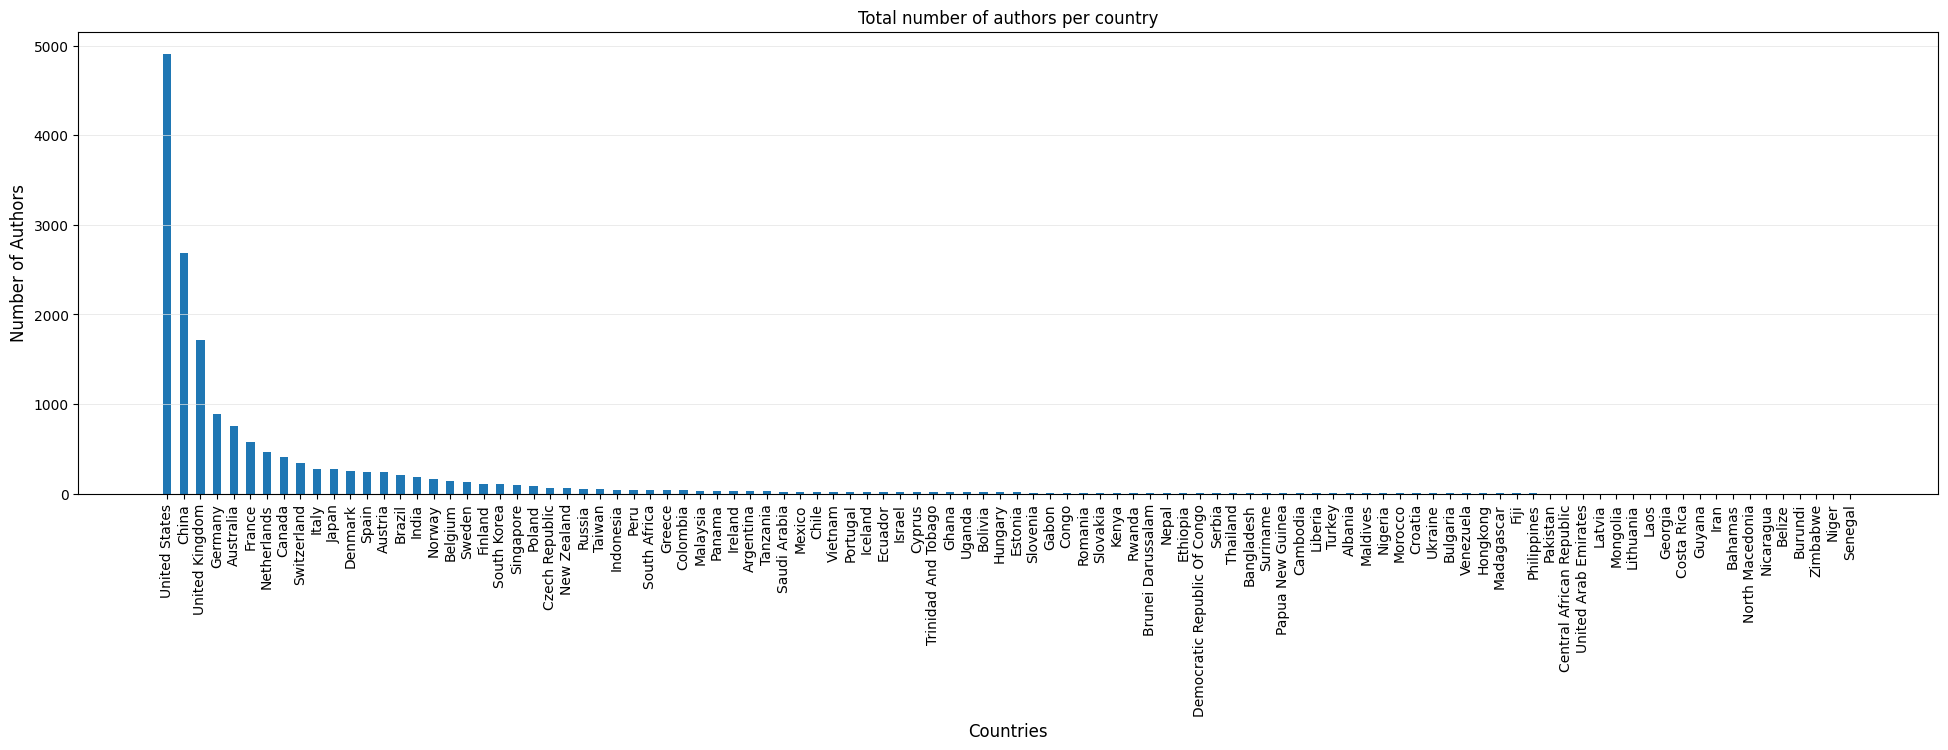

In [79]:
country_counter = defaultdict(int)
for author_dict in data_grouped['AuthorCountry']:
  for author, country in author_dict.items():
    if country:
      country = clean_regions(country)[0]
      if country in region_check_list_lower and country not in exclude_regions:
        country_counter[country] += 1
country_counter = dict(sorted(country_counter.items(), key=lambda x: x[1], reverse=True))

# Plot the bar graph
plt.figure(figsize=(24, 6))
plt.bar(pd.Series(country_counter.keys()).str.title(), country_counter.values(), width=0.5)
plt.title('Total number of authors per country')
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Authors', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.show()

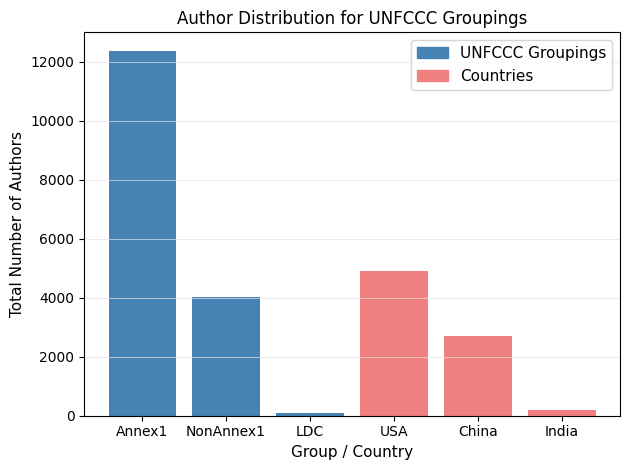

In [80]:
# Initialize Counters for each classification
# annex1_counter = Counter()
# non_annex1_counter = Counter()
# ldc_counter = Counter()
# usa_counter = Counter()
# india_counter = Counter()
# china_counter = Counter()
annex1_count = 0
non_annex1_count = 0
ldc_count = 0
usa_count = 0
india_count = 0
china_count = 0

for author_dict in data_grouped['AuthorCountry']:
  for author, country in author_dict.items():
    if country:
      country = clean_regions(country)[0]
      region = get_author_regions(country)
      if 'Annex1' in region:
        annex1_count += 1
      if 'NonAnnex1' in region:
        non_annex1_count += 1
      if 'LDC' in region:
        ldc_count += 1
      if 'USA' in region:
        usa_count += 1
      if 'India' in region:
        india_count += 1
      if 'China' in region:
        china_count += 1

# Plot the bar graph
plt.figure()

# Define colors and hatch patterns for each bar
colors = ['steelblue', 'steelblue', 'steelblue', 'lightcoral', 'lightcoral', 'lightcoral']

# Create custom legend patches
region_patch = mpatches.Patch(color='steelblue', label='UNFCCC Groupings')
country_patch = mpatches.Patch(color='lightcoral', label='Countries')
plt.legend(handles=[region_patch, country_patch], fontsize=11)

plt.bar(['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India'], \
        [annex1_count, non_annex1_count, ldc_count, usa_count, china_count, india_count], color=colors)
plt.title('Author Distribution for UNFCCC Groupings')
plt.xlabel('Group / Country', fontsize=11)
plt.ylabel('Total Number of Authors', fontsize=11)
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
# plt.ylim(0, 6000)
plt.tight_layout()
plt.show()

In [81]:
annex1_count, non_annex1_count, ldc_count, usa_count, china_count, india_count

(12379, 4017, 98, 4909, 2687, 192)

In [82]:
total_authors = annex1_count + non_annex1_count
total_authors

16396

In [83]:
annex1_count / total_authors

0.7550012198097097

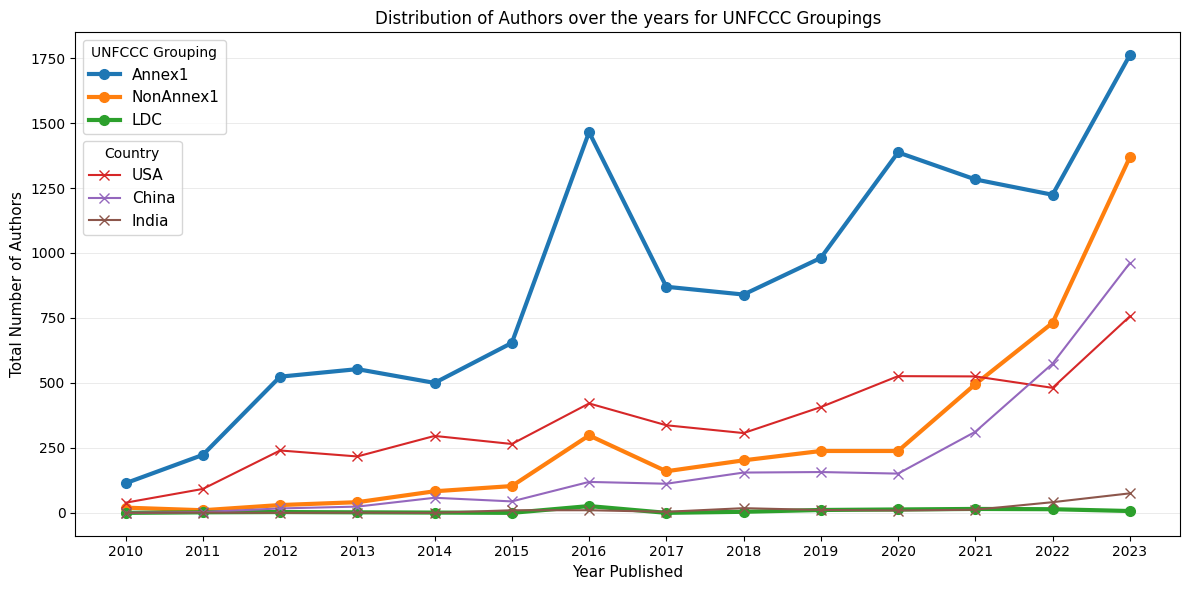

In [84]:
# Old Code
# # Summarize the counts for each classification and year
# years = sorted(set(data_subset['Year Published']))

# annex1_counts = [sum(year_annex1[year].values()) for year in years]
# non_annex1_counts = [sum(year_non_annex1[year].values()) for year in years]
# ldc_counts = [sum(year_ldc[year].values()) for year in years]
# usa_counts = [sum(year_usa[year].values()) for year in years]
# india_counts = [sum(year_india[year].values()) for year in years]
# china_counts = [sum(year_china[year].values()) for year in years]
# # brazil_counts = [sum(year_brazil[year].values()) for year in years]

# # Plot the line chart
# plt.figure(figsize=(12, 6))
# plt.plot(years, annex1_counts, label='Annex1')
# plt.plot(years, non_annex1_counts, label='NonAnnex1')
# plt.plot(years, ldc_counts, label='LDC')
# plt.plot(years, usa_counts, label='USA')
# plt.plot(years, india_counts, label='India')
# plt.plot(years, china_counts, label='China')
# # plt.plot(years, brazil_counts, label='Brazil')
# plt.title('Year-wise Number of Authors by Classification')
# plt.xlabel('Year')
# plt.ylabel('Number of Authors')
# plt.legend()
# plt.tight_layout()
# plt.show()

# year_annex1 = defaultdict(Counter)
# year_non_annex1 = defaultdict(Counter)
# year_ldc = defaultdict(Counter)
# year_usa = defaultdict(Counter)
# year_china = defaultdict(Counter)
# year_india = defaultdict(Counter)
# # year_brazil = defaultdict(Counter)

# New Code - Skewness

year_annex1_counts = defaultdict(int)
year_nonannex1_counts = defaultdict(int)
year_ldc_counts = defaultdict(int)
year_usa_counts = defaultdict(int)
year_china_counts = defaultdict(int)
year_india_counts = defaultdict(int)

# Iterate through the AuthorCountry column to update the counters
for idx, row in data_grouped.iterrows():
  year = row['Year Published']
  author_dict = row['AuthorCountry']
  for author, country in author_dict.items():
    if country:  # Ensure the country is not None
      country = clean_regions(country)[0]
      region = get_author_regions(country)
      if 'Annex1' in region:
        year_annex1_counts[year] += 1
      if 'NonAnnex1' in region:
        year_nonannex1_counts[year] += 1
      if 'LDC' in region:
        year_ldc_counts[year] += 1
      if 'USA' in region:
        year_usa_counts[year] += 1
      if 'India' in region:
        year_india_counts[year] += 1
      if 'China' in region:
        year_china_counts[year] += 1

years = sorted(set(data_grouped['Year Published']))

year_annex1_counts = [year_annex1_counts[year] for year in years]
year_nonannex1_counts = [year_nonannex1_counts[year] for year in years]
year_ldc_counts = [year_ldc_counts[year] for year in years]
year_usa_counts = [year_usa_counts[year] for year in years]
year_india_counts = [year_india_counts[year] for year in years]
year_china_counts = [year_china_counts[year] for year in years]

# Plot the line chart
# plt.figure(figsize=(12, 6))

region_handles = []
country_handles = []

fig, ax = plt.subplots(figsize=(12, 6))

# plt.plot(years, year_annex1_counts, marker='o', markersize=3, linewidth=1.5, label='Annex1')
# plt.plot(years, year_nonannex1_counts, marker='o', markersize=3, linewidth=1.5, label='NonAnnex1')
# plt.plot(years, year_ldc_counts, marker='o', markersize=3, linewidth=1.5, label='LDC')
# plt.plot(years, year_usa_counts, marker='o', markersize=3, linewidth=1.5, label='USA')
# plt.plot(years, year_india_counts, marker='o', markersize=3, linewidth=1.5, label='India')
# plt.plot(years, year_china_counts, marker='o', markersize=3, linewidth=1.5, label='China')

line, = ax.plot(years, year_annex1_counts, marker='o', markersize=7, linewidth=3, label='Annex1')
region_handles.append(line)

line, = ax.plot(years, year_nonannex1_counts, marker='o', markersize=7, linewidth=3, label='NonAnnex1')
region_handles.append(line)

line, = ax.plot(years, year_ldc_counts, marker='o', markersize=7, linewidth=3, label='LDC')
region_handles.append(line)

line, = ax.plot(years, year_usa_counts, marker='x', markersize=7, linewidth=1.5, label='USA')
country_handles.append(line)

line, = ax.plot(years, year_china_counts, marker='x', markersize=7, linewidth=1.5, label='China')
country_handles.append(line)

line, = ax.plot(years, year_india_counts, marker='x', markersize=7, linewidth=1.5, label='India')
country_handles.append(line)

region_legend = ax.legend(handles=region_handles, loc='upper left', title='UNFCCC Grouping', fontsize=11)
ax.add_artist(region_legend)
ax.legend(handles=country_handles, loc='upper left', bbox_to_anchor=(0, 0.8), title='Country', fontsize=11)

plt.title('Distribution of Authors over the years for UNFCCC Groupings')
plt.xlabel('Year Published', fontsize=11)
plt.ylabel('Total Number of Authors', fontsize=11)
# plt.legend(title='Region')
plt.tight_layout()
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
# plt.ylim(0, 1000)
plt.show()

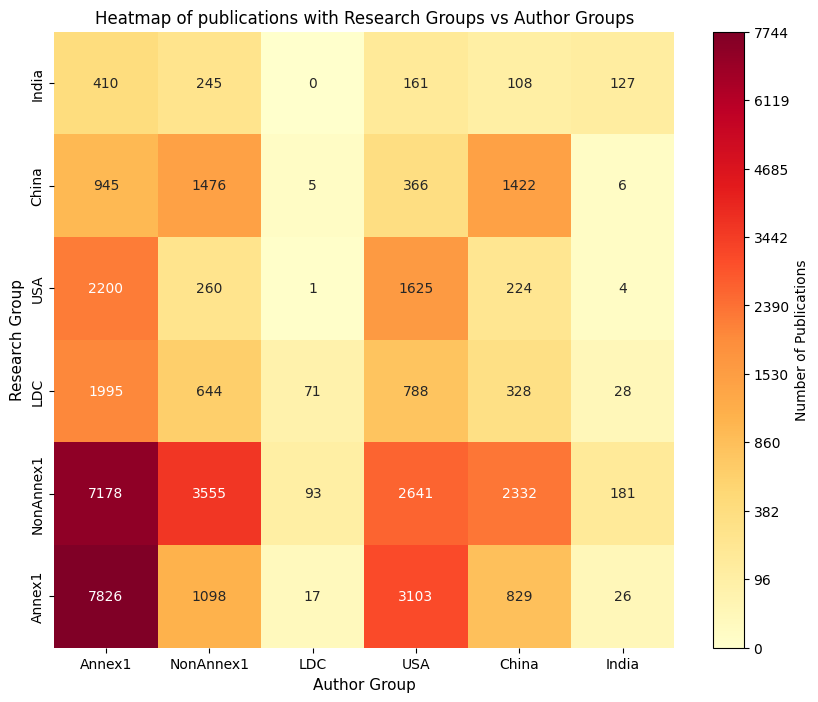

In [85]:
intersection_counter = Counter()
for idx, row in data_grouped.iterrows():
  all_research_region = row['ResearchRegion']
  author_dict = row['AuthorCountry']
  for author, country in author_dict.items():
    if country:
      country = clean_regions(country)[0]
      all_author_region = get_author_regions(country)
      for research_region in all_research_region:
        for author_region in all_author_region:
          intersection_counter[(research_region, author_region)] += 1

matrix = np.zeros((len(research_regions), len(research_regions)))
for i, research in enumerate(research_regions):
    for j, author in enumerate(research_regions):
        matrix[i, j] = intersection_counter.get((research, author), 0)

matrix_flipped = np.flipud(matrix)
matrix_rounded = np.round(np.sqrt(matrix_flipped), 0)

plt.figure(figsize=(10, 8))
norm = Normalize(vmin=0, vmax=np.max(matrix_rounded))
heatmap = sns.heatmap(matrix_rounded, annot=matrix_flipped, fmt="g", cmap="YlOrRd", \
                      xticklabels=research_regions, yticklabels=research_regions[::-1], cbar=False)
colorbar = plt.colorbar(heatmap.collections[0], orientation='vertical')
colorbar.set_label('Number of Publications')

tick_values = np.linspace(0, np.max(matrix_rounded), 10)
original_tick_labels = np.round(tick_values**2, 0)  # Square to get the original scale

colorbar.set_ticks(tick_values)
colorbar.set_ticklabels([int(label) for label in original_tick_labels])

plt.xlabel('Author Group', fontsize=11)
plt.ylabel('Research Group', fontsize=11)
plt.title('Heatmap of publications with Research Groups vs Author Groups')
plt.show()

In [86]:
# Calculate the intersection counts
intersection_counter = Counter()
for idx, row in data_grouped.iterrows():
    all_research_region = row['ResearchRegion']
    author_dict = row['AuthorCountry']
    for author, country in author_dict.items():
        if country:
            country = clean_regions(country)[0]
            all_author_region = get_author_regions(country)
            for research_region in all_research_region:
                for author_region in all_author_region:
                    intersection_counter[(research_region, author_region)] += 1

# Create the matrix
matrix = np.zeros((len(research_regions), len(research_regions)))
for i, research in enumerate(research_regions):
    for j, author in enumerate(research_regions):
        matrix[i, j] = intersection_counter.get((research, author), 0)

# Flip and round the matrix
matrix_flipped = np.flipud(matrix)
matrix_rounded = np.round(np.sqrt(matrix_flipped), 0)

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=matrix_rounded,
    x=research_regions,
    y=research_regions[::-1],
    colorscale='YlOrRd',
    colorbar=dict(
        title="Number of Publications",
        tickvals=np.linspace(0, np.max(matrix_rounded), 6),  # Adjust the number of ticks
        ticktext=[str(int(i ** 2)) for i in np.linspace(0, np.max(matrix_rounded), 6)],  # Display original scale labels
        ticks="outside",  # Place ticks outside the color bar
        tickangle=0  # Ensure tick labels are horizontally aligned
    ),
    text=matrix_flipped,  # Values to display inside the boxes
    hoverinfo='x+y+text',  # Show the text (numbers) when hovering
    texttemplate='%{text}',
))

# Set layout and axis labels
fig.update_layout(
    title="Heatmap of Publications: Research Groups vs Author Groups",
    xaxis=dict(title="Author Group", ticks=""),
    yaxis=dict(title="Research Group", ticks=""),
    xaxis_nticks=len(research_regions),  # Set the number of ticks on the x-axis
    yaxis_nticks=len(research_regions),  # Set the number of ticks on the y-axis
    template="plotly_white",
    height=800,  # Set height and width to make it square
    width=1000,
    autosize=False,
    showlegend=False  # Hides the color legend
)

# Show the plot
fig.show()

In [87]:
data_grouped['AuthorCountry'].apply(
    lambda x: list(x.values()).count('USA') if isinstance(x, dict) else 0
).sum()

4745

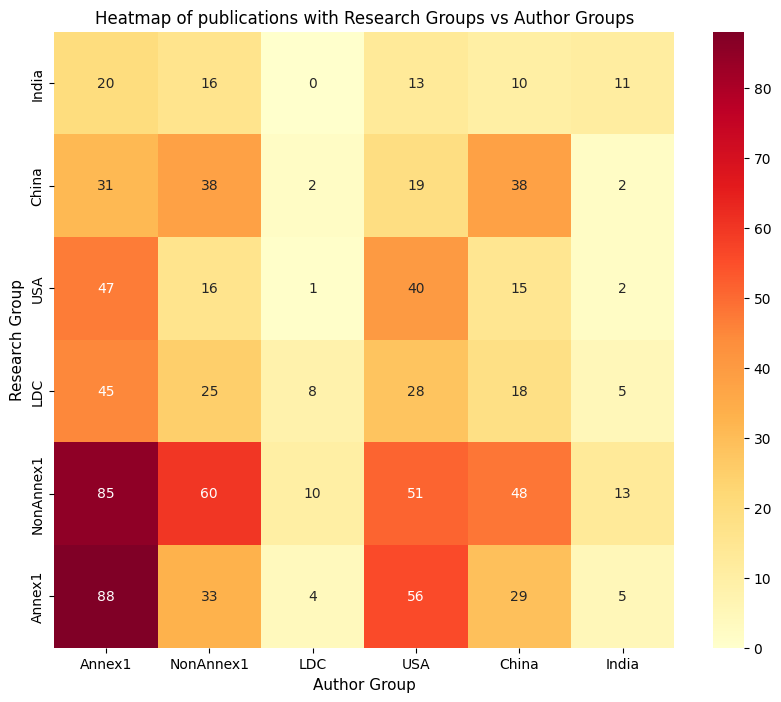

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_rounded, annot=True, fmt="g", cmap="YlOrRd", xticklabels=research_regions, yticklabels=research_regions[::-1])
plt.xlabel('Author Group', fontsize=11)
plt.ylabel('Research Group', fontsize=11)
plt.title('Heatmap of publications with Research Groups vs Author Groups')
plt.show()

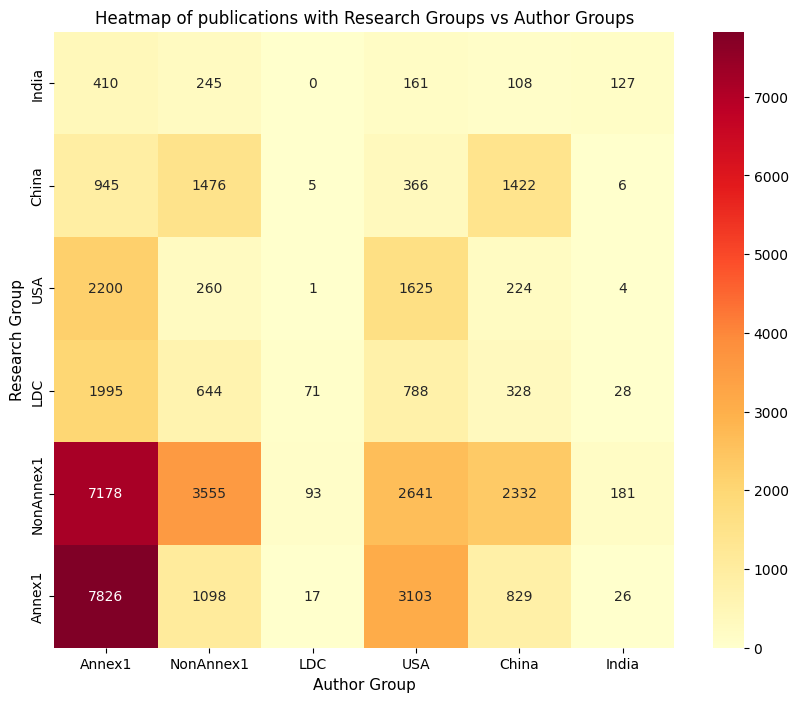

In [89]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_flipped, annot=True, fmt="g", cmap="YlOrRd", xticklabels=research_regions, yticklabels=research_regions[::-1])
plt.xlabel('Author Group', fontsize=11)
plt.ylabel('Research Group', fontsize=11)
plt.title('Heatmap of publications with Research Groups vs Author Groups')
plt.show()

In [90]:
# # Bubble Chart - Old
# # Prepare data for plotting
# x_labels = ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']
# y_labels = ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']
# bubble_data = [(x, y, intersection_counter[(x, y)]) for x in x_labels for y in y_labels]

# # Plot the bubble chart
# plt.figure()
# for (x, y, size) in bubble_data:
#     plt.scatter(y, x, s=size*20, alpha=0.5, edgecolors="w", linewidth=2)

# # Add labels and title
# plt.xlabel('Author Region')
# plt.ylabel('Research Region')
# plt.title('Bubble Chart of Author Regions vs Research Regions')
# plt.xticks(ticks=range(len(y_labels)), labels=y_labels)
# plt.yticks(ticks=range(len(x_labels)), labels=x_labels)
# plt.grid(True)
# plt.show()

In [91]:
# # Prepare data for plotting
# x_labels = ['Annex1', 'NonAnnex1', 'LDC']
# y_labels = ['Annex1', 'NonAnnex1', 'LDC']
# bubble_data = [(x, y, intersection_counter[(x, y)]) for x in x_labels for y in y_labels]

# # Plot the bubble chart
# plt.figure()
# for (x, y, size) in bubble_data:
#     plt.scatter(y, x, s=size*20, alpha=0.5, edgecolors="w", linewidth=2)

# # Add labels and title
# plt.xlabel('Author Region')
# plt.ylabel('Research Region')
# plt.title('Bubble Chart of Author Regions vs Research Regions')
# plt.xticks(ticks=range(len(y_labels)), labels=y_labels)
# plt.yticks(ticks=range(len(x_labels)), labels=x_labels)
# plt.grid(True)
# plt.show()

In [92]:
# plt.figure(figsize=(10, 8))
# for i, author in enumerate(author_regions):
#     for j, research in enumerate(research_regions):
#         size = intersection_counter.get((author, research), 0)
#         plt.scatter(i, j, s=size * 20, alpha=0.5)

# # Setting labels
# plt.xticks(ticks=range(len(research_regions)), labels=research_regions)
# plt.yticks(ticks=range(len(author_regions)), labels=author_regions)
# plt.xlabel('Research Region')
# plt.ylabel('Author Region')
# plt.title('Bubble Plot of Author Regions vs Research Regions')
# plt.grid(True)
# plt.show()


In [93]:
# # Define region groups with corresponding colors
# region_colors = {
#     'Annex1': 'blue',
#     'NonAnnex1': 'green',
#     'LDC': 'red',
#     'USA': 'orange',
#     'China': 'purple',
#     'India': 'brown',
#     'Brazil': 'pink',
# }

# # Plotting the bubble plot with specific colors
# plt.figure(figsize=(10, 8))
# for i, author in enumerate(author_regions):
#     for j, research in enumerate(research_regions):
#         size = intersection_counter.get((author, research), 0)
#         if size > 0:  # Plot only if there's an intersection
#             color = region_colors[research]  # Use the research region's color
#             plt.scatter(i, j, s=size * 20, alpha=0.5, color=color, edgecolors="w", linewidth=2)

# # Setting labels and title
# plt.xticks(ticks=range(len(research_regions)), labels=research_regions)
# plt.yticks(ticks=range(len(author_regions)), labels=author_regions)
# plt.xlabel('Research Region')
# plt.ylabel('Author Region')
# plt.title('Bubble Plot of Author Regions vs Research Regions with Intuitive Colors')
# plt.grid(True)
# plt.show()


# Vulnerability Index

In [94]:
vulnerability = pd.read_csv('vulnerability.csv')
vulnerability = vulnerability[['Name', '2022']]
vulnerability['Name'] = vulnerability['Name'].apply(clean_regions)
vulnerability = vulnerability.explode('Name')
vulnerability.columns = ['Regions_updated', 'VulnerabilityIndex']
vulnerability

Regions_updated  VulnerabilityIndex
0       afghanistan            0.586021
1           albania            0.386332
2           algeria            0.364310
3           andorra                 NaN
4            angola            0.508869
..              ...                 ...
187       venezuela            0.373603
188         vietnam            0.457708
189           yemen            0.521058
190          zambia            0.487666
191        zimbabwe            0.495533

[192 rows x 2 columns]

In [95]:
population = pd.read_csv('population_projection.csv')
population = population[population['Year'] == 2023][['Entity', 'Population (historical)']]
population['Entity'] = [country.lower() for country in population['Entity']]
population.loc[population['Entity'] == 'czechia','Entity'] = 'czech republic'
population.loc[population['Entity'] == 'hong kong','Entity'] = 'hongkong'
population.loc[population['Entity'] == 'brunei','Entity'] = 'brunei darussalam'
population = population[population['Entity'].isin(region_check_list_lower)]
population = population[~population['Entity'].isin(exclude_regions)]
population.columns = ['Regions_updated', 'Population']
population

Regions_updated   Population
337       afghanistan   41454762.0
1171          albania    2811660.0
1509          algeria   46164221.0
2191          andorra      80868.0
2529           angola   36749907.0
...               ...          ...
76857       venezuela   28300860.0
77195         vietnam  100352189.0
78089           yemen   39390800.0
78550          zambia   20723968.0
78888        zimbabwe   16340829.0

[195 rows x 2 columns]

In [96]:
data_country = data_grouped[['Regions_updated', 'ResearchRegion', 'DOI', 'Altmetric']]
data_country = data_country.explode('Regions_updated')
data_country = data_country[~data_country['Regions_updated'].isin(exclude_regions)]
data_country

Regions_updated      ResearchRegion  \
0      united states       [Annex1, USA]   
1             russia            [Annex1]   
4      united states       [Annex1, USA]   
5            denmark            [Annex1]   
6             canada            [Annex1]   
...              ...                 ...   
1951           india  [NonAnnex1, India]   
1954    south africa         [NonAnnex1]   
1955       australia            [Annex1]   
1958       australia            [Annex1]   
1959         vietnam         [NonAnnex1]   

                                             DOI  Altmetric  
0      https://doi.org/10.1038/s41558-019-0468-y        5.0  
1        https://doi.org/10.1126/science.1222135      131.0  
4      https://doi.org/10.1038/s41612-018-0032-x       21.0  
5        https://doi.org/10.1126/science.1219985      185.0  
6     https://doi.org/10.1038/s41467-023-42737-x       49.0  
...                                          ...        ...  
1951        https://doi.org/10.1038/nclimate3141       56.0  
1954  https://doi.org/10.1038/s41467-020-18317-8       25.0  
1955        https://doi.org/10.1038/nclimate1743      324.0  
1958  https://doi.org/10.1038/s41558-023-01746-w      101.0  
1959  https://doi.org/10.1038/s41558-023-01746-w      101.0  

[1413 rows x 4 columns]

In [97]:
data_country = pd.merge(data_country, vulnerability, on='Regions_updated', how='left')
data_country = pd.merge(data_country, population, on='Regions_updated', how='left')
data_country['VulnerabilityIndex'] = data_country['VulnerabilityIndex'].fillna(0)
data_country.shape

(1413, 6)

In [98]:
data_country[data_country['Regions_updated'] == 'taiwan']

Regions_updated ResearchRegion  \
290           taiwan    [NonAnnex1]   
553           taiwan    [NonAnnex1]   
1081          taiwan    [NonAnnex1]   
1175          taiwan    [NonAnnex1]   
1272          taiwan    [NonAnnex1]   
1280          taiwan    [NonAnnex1]   

                                             DOI  Altmetric  \
290   https://doi.org/10.1038/s41467-020-19979-0       17.0   
553   https://doi.org/10.1038/s41612-023-00383-6        1.0   
1081   https://doi.org/10.1038/s41612-019-0082-8        3.0   
1175     https://doi.org/10.1126/science.aax5758       74.0   
1272  https://doi.org/10.1038/s41612-023-00528-7       15.0   
1280  https://doi.org/10.1038/s41467-023-43114-4      109.0   

      VulnerabilityIndex  Population  
290                  0.0  23317145.0  
553                  0.0  23317145.0  
1081                 0.0  23317145.0  
1175                 0.0  23317145.0  
1272                 0.0  23317145.0  
1280                 0.0  23317145.0

In [99]:
data_country['ResearchRegion'] = data_country['ResearchRegion'].astype(str)
data_country_grouped = data_country.groupby(['Regions_updated', 'ResearchRegion', 'VulnerabilityIndex', 'Population'])\
                                   .agg({'DOI': 'count', 'Altmetric': 'sum'}).reset_index()
data_country_grouped.columns = ['Regions_updated', 'ResearchRegion', 'VulnerabilityIndex', 'Population', 'NumPublications', 'Altmetrics']
data_country_grouped

Regions_updated        ResearchRegion  VulnerabilityIndex   Population  \
0      afghanistan  ['NonAnnex1', 'LDC']            0.586021   41454762.0   
1           angola  ['NonAnnex1', 'LDC']            0.508869   36749907.0   
2        argentina         ['NonAnnex1']            0.371704   45538402.0   
3        australia            ['Annex1']            0.306046   26451125.0   
4          austria            ['Annex1']            0.299253    9130434.0   
..             ...                   ...                 ...          ...   
91         uruguay         ['NonAnnex1']            0.391278    3388083.0   
92         vanuatu         ['NonAnnex1']            0.559518     320422.0   
93       venezuela         ['NonAnnex1']            0.373603   28300860.0   
94         vietnam         ['NonAnnex1']            0.457708  100352189.0   
95          zambia  ['NonAnnex1', 'LDC']            0.487666   20723968.0   

    NumPublications  Altmetrics  
0                 1      1569.0  
1                 5      2461.0  
2                 3       195.0  
3                76     17947.0  
4                 2       160.0  
..              ...         ...  
91                1         7.0  
92                1       200.0  
93                3       293.0  
94                9      1967.0  
95                1      2050.0  

[96 rows x 6 columns]

In [100]:
data_country_grouped['NumPublications_log'] = np.log(data_country_grouped['NumPublications'])
data_country_grouped['NumPublications_sqrt'] = np.sqrt(data_country_grouped['NumPublications'])
data_country_grouped['Altmetrics_log'] = np.log(data_country_grouped['Altmetrics'])
data_country_grouped['Altmetrics_sqrt'] = np.sqrt(data_country_grouped['Altmetrics'])

In [101]:
# data_country_grouped['VulnerabilityIndex'] = data_country_grouped['VulnerabilityIndex'].replace(-999, )
data_country_grouped['ResearchRegion'] = data_country_grouped['ResearchRegion'].apply(ast.literal_eval)
data_country_grouped = data_country_grouped.explode('ResearchRegion')
data_country_grouped

Regions_updated ResearchRegion  VulnerabilityIndex   Population  \
0      afghanistan      NonAnnex1            0.586021   41454762.0   
0      afghanistan            LDC            0.586021   41454762.0   
1           angola      NonAnnex1            0.508869   36749907.0   
1           angola            LDC            0.508869   36749907.0   
2        argentina      NonAnnex1            0.371704   45538402.0   
..             ...            ...                 ...          ...   
92         vanuatu      NonAnnex1            0.559518     320422.0   
93       venezuela      NonAnnex1            0.373603   28300860.0   
94         vietnam      NonAnnex1            0.457708  100352189.0   
95          zambia      NonAnnex1            0.487666   20723968.0   
95          zambia            LDC            0.487666   20723968.0   

    NumPublications  Altmetrics  NumPublications_log  NumPublications_sqrt  \
0                 1      1569.0             0.000000              1.000000   
0                 1      1569.0             0.000000              1.000000   
1                 5      2461.0             1.609438              2.236068   
1                 5      2461.0             1.609438              2.236068   
2                 3       195.0             1.098612              1.732051   
..              ...         ...                  ...                   ...   
92                1       200.0             0.000000              1.000000   
93                3       293.0             1.098612              1.732051   
94                9      1967.0             2.197225              3.000000   
95                1      2050.0             0.000000              1.000000   
95                1      2050.0             0.000000              1.000000   

    Altmetrics_log  Altmetrics_sqrt  
0         7.358194        39.610605  
0         7.358194        39.610605  
1         7.808323        49.608467  
1         7.808323        49.608467  
2         5.273000        13.964240  
..             ...              ...  
92        5.298317        14.142136  
93        5.680173        17.117243  
94        7.584265        44.350874  
95        7.625595        45.276926  
95        7.625595        45.276926  

[117 rows x 10 columns]

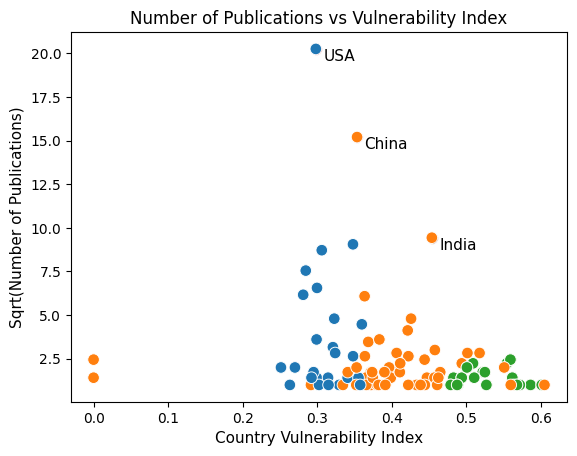

In [102]:
for country in ['USA', 'India', 'China']:
    test_country_data = data_country_grouped[data_country_grouped['ResearchRegion'] == country]
    sns.scatterplot(data=test_country_data, y='NumPublications_sqrt', x='VulnerabilityIndex',
                    hue='ResearchRegion', hue_order=research_regions,
                    s=70, legend=False, label='_nolegend_')
    for _, row in test_country_data.iterrows():
        plt.text(row['VulnerabilityIndex'] + 0.01, row['NumPublications_sqrt'] + 0.02, country,
                 ha='left', va='top', fontsize=11)

other_data = data_country_grouped[~data_country_grouped['ResearchRegion'].isin(['USA', 'India', 'China'])]
sns.scatterplot(data=other_data, y='NumPublications_sqrt', x='VulnerabilityIndex',
                hue='ResearchRegion', hue_order=['Annex1', 'NonAnnex1', 'LDC'], s=70, legend=False)

# plt.legend(title='UNFCCC Grouping', title_fontsize=11, fontsize=11,  loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Number of Publications vs Vulnerability Index")
plt.ylabel("Sqrt(Number of Publications)", fontsize=11)
plt.xlabel("Country Vulnerability Index", fontsize=11)
plt.show()

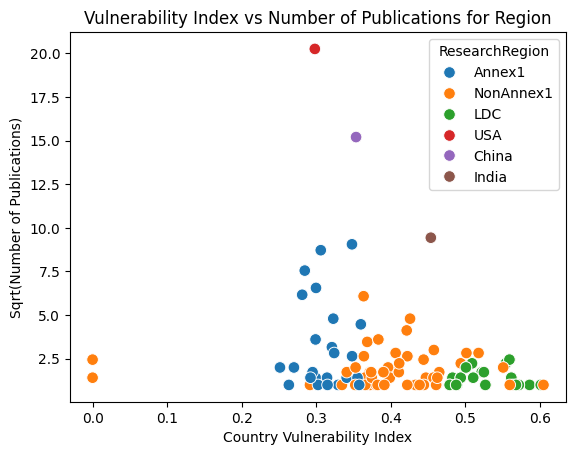

In [103]:
sns.scatterplot(data=data_country_grouped, y='NumPublications_sqrt', x='VulnerabilityIndex', hue='ResearchRegion', \
                hue_order=research_regions, s=70)
plt.title("Vulnerability Index vs Number of Publications for Region")
plt.ylabel("Sqrt(Number of Publications)")
plt.xlabel("Country Vulnerability Index")
plt.show()

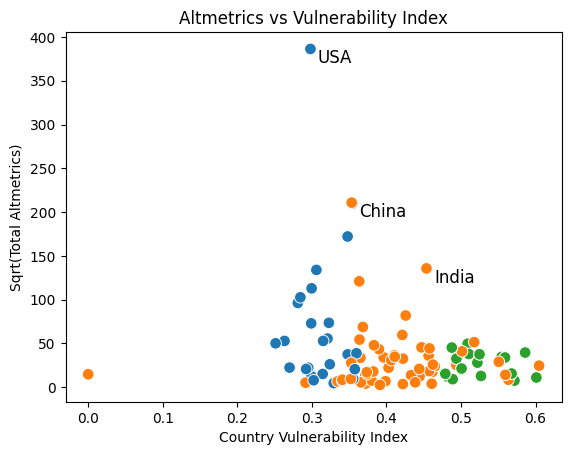

In [104]:
for country in ['USA', 'India', 'China']:
    test_country_data = data_country_grouped[data_country_grouped['ResearchRegion'] == country]
    sns.scatterplot(data=test_country_data, y='Altmetrics_sqrt', x='VulnerabilityIndex',
                    hue='ResearchRegion', hue_order=research_regions,
                    s=70, legend=False, label='_nolegend_')
    for _, row in test_country_data.iterrows():
        plt.text(row['VulnerabilityIndex'] + 0.01, row['Altmetrics_sqrt'] + 0.02, country,
                 ha='left', va='top', fontsize=12)

other_data = data_country_grouped[~data_country_grouped['ResearchRegion'].isin(['USA', 'India', 'China'])]
sns.scatterplot(data=other_data, y='Altmetrics_sqrt', x='VulnerabilityIndex',
                hue='ResearchRegion', hue_order=['Annex1', 'NonAnnex1', 'LDC'], s=70, legend=False)

# plt.legend(title='UNFCCC Grouping', title_fontsize=12, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Altmetrics vs Vulnerability Index")
plt.ylabel("Sqrt(Total Altmetrics)")
plt.xlabel("Country Vulnerability Index")
plt.show()

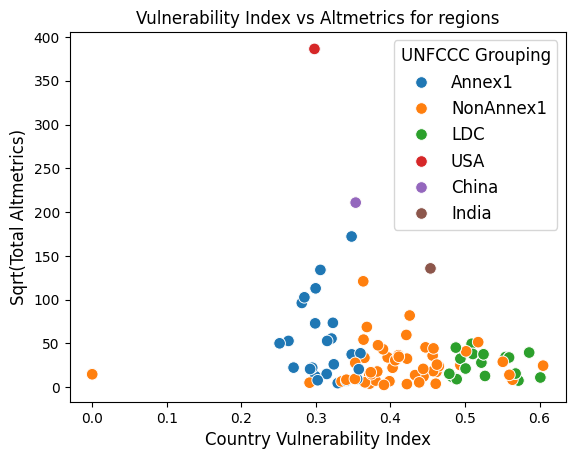

In [105]:
sns.scatterplot(data=data_country_grouped, y='Altmetrics_sqrt', x='VulnerabilityIndex', hue='ResearchRegion', \
                hue_order=research_regions, s=70)
plt.title("Vulnerability Index vs Altmetrics for regions")
plt.legend(title='UNFCCC Grouping', title_fontsize=12, fontsize=12)
plt.ylabel("Sqrt(Total Altmetrics)", fontsize=12)
plt.xlabel("Country Vulnerability Index", fontsize=12)
plt.show()

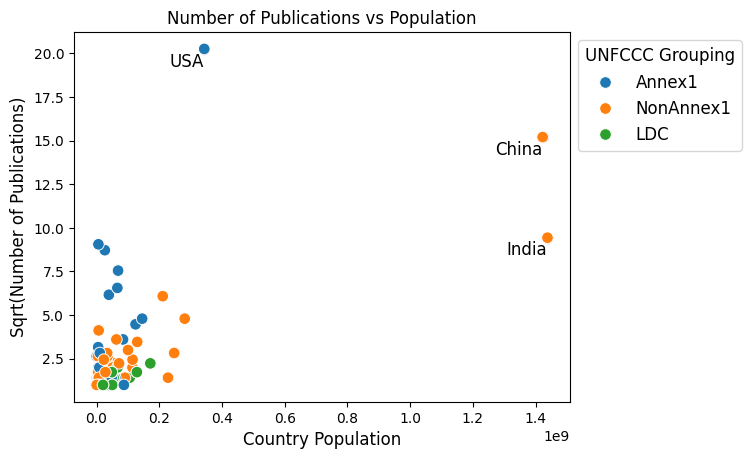

In [106]:
# plt.figure(figsize=(8, 7))
for country in ['USA', 'India', 'China']:
    test_country_data = data_country_grouped[data_country_grouped['ResearchRegion'] == country]
    sns.scatterplot(data=test_country_data, y='NumPublications_sqrt', x='Population',
                    hue='ResearchRegion', hue_order=research_regions,
                    s=70, legend=False, label='_nolegend_')
    for _, row in test_country_data.iterrows():
        plt.text(row['Population'] + 0.5, row['NumPublications_sqrt'] - 0.2, country,
                 ha='right', va='top', fontsize=12)

other_data = data_country_grouped[~data_country_grouped['ResearchRegion'].isin(['USA', 'India', 'China'])]
sns.scatterplot(data=other_data, y='NumPublications_sqrt', x='Population',
                hue='ResearchRegion', hue_order=['Annex1', 'NonAnnex1', 'LDC'], s=70)

plt.legend(title='UNFCCC Grouping', title_fontsize=12, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Number of Publications vs Population")
plt.ylabel("Sqrt(Number of Publications)", fontsize=12)
plt.xlabel("Country Population", fontsize=12)
plt.show()

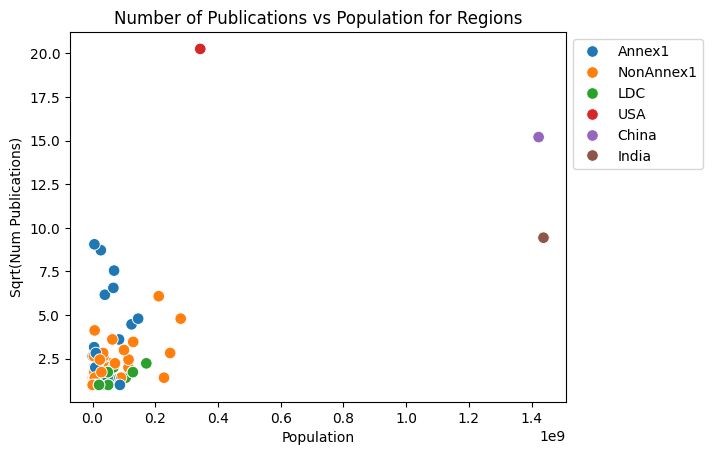

In [107]:
sns.scatterplot(data=data_country_grouped, y='NumPublications_sqrt', x='Population', hue='ResearchRegion', \
                hue_order=research_regions, s=70)
plt.title("Number of Publications vs Population for Regions")
plt.ylabel("Sqrt(Num Publications)")
plt.xlabel("Population")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [108]:
data_country_grouped[data_country_grouped['ResearchRegion'] == 'China']['Regions_updated'].unique()

array(['china'], dtype=object)

In [109]:
data_country_grouped['ResearchRegion'].value_counts()

ResearchRegion
NonAnnex1    71
Annex1       25
LDC          18
China         1
India         1
USA           1
Name: count, dtype: int64

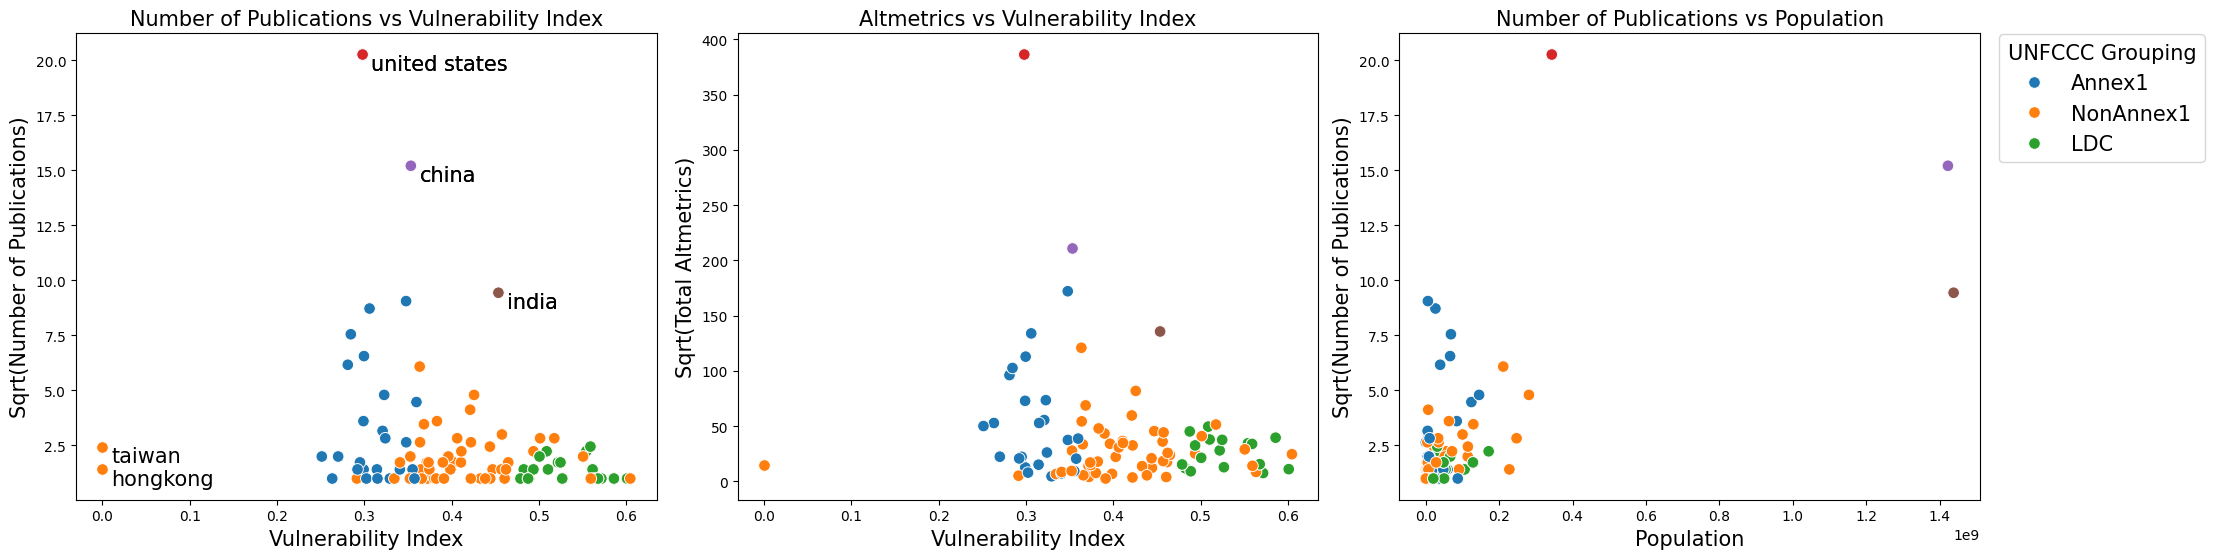

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# for country in ['USA', 'India', 'China']:
for country in ['united states', 'india', 'china', 'hongkong', 'taiwan']:
    # test_country_data = data_country_grouped[data_country_grouped['ResearchRegion'] == country]
    test_country_data = data_country_grouped[data_country_grouped['Regions_updated'] == country]
    # First plot: Vulnerability Index vs Number of Publications
    sns.scatterplot(ax=axes[0], data=test_country_data, y='NumPublications_sqrt', x='VulnerabilityIndex',
                    hue='ResearchRegion', hue_order=research_regions,
                    s=70, legend=False, label='_nolegend_')
    # Second plot: Vulnerability Index vs Altmetrics
    sns.scatterplot(ax=axes[1], data=test_country_data, y='Altmetrics_sqrt', x='VulnerabilityIndex',
                    hue='ResearchRegion', hue_order=research_regions,
                    s=70, legend=False, label='_nolegend_')
    # Third plot: Population vs Number of Publications
    sns.scatterplot(ax=axes[2], data=test_country_data, y='NumPublications_sqrt', x='Population',
                    hue='ResearchRegion', hue_order=research_regions,
                    s=70, legend=False, label='_nolegend_')

    for _, row in test_country_data.iterrows():
        axes[0].text(row['VulnerabilityIndex'] + 0.01, row['NumPublications_sqrt'] + 0.02, country,
                     ha='left', va='top', fontsize=15)
        # axes[1].text(row['VulnerabilityIndex'] + 0.01, row['Altmetrics_sqrt'] + 0.02, country,
        #              ha='left', va='top', fontsize=15)
        # axes[2].text(row['Population'] + 0.6, row['NumPublications_sqrt'] - 0.2, country,
        #              ha='right', va='top', fontsize=15)

other_data = data_country_grouped[~data_country_grouped['Regions_updated'].isin(['united states', 'india', 'china', 'taiwan', 'hongkong'])]
# First plot: Vulnerability Index vs Number of Publications
sns.scatterplot(ax=axes[0], data=other_data, y='NumPublications_sqrt', x='VulnerabilityIndex',
                hue='ResearchRegion', hue_order=['Annex1', 'NonAnnex1', 'LDC'], s=70)
axes[0].legend_.remove()
axes[0].set_title("Number of Publications vs Vulnerability Index", fontsize=15)
axes[0].set_ylabel("Sqrt(Number of Publications)", fontsize=15)
axes[0].set_xlabel("Vulnerability Index", fontsize=15)

# Second plot: Vulnerability Index vs Altmetrics
sns.scatterplot(ax=axes[1], data=other_data, y='Altmetrics_sqrt', x='VulnerabilityIndex',
                hue='ResearchRegion', hue_order=['Annex1', 'NonAnnex1', 'LDC'], s=70)
axes[1].legend_.remove()
axes[1].set_title("Altmetrics vs Vulnerability Index", fontsize=15)
axes[1].set_ylabel("Sqrt(Total Altmetrics)", fontsize=15)
axes[1].set_xlabel("Vulnerability Index", fontsize=15)

# Third plot: Population vs Number of Publications
sns.scatterplot(ax=axes[2], data=other_data, y='NumPublications_sqrt', x='Population',
                hue='ResearchRegion', hue_order=['Annex1', 'NonAnnex1', 'LDC'], s=70)
axes[2].legend_.remove()
axes[2].set_title("Number of Publications vs Population", fontsize=15)
axes[2].set_ylabel("Sqrt(Number of Publications)", fontsize=15)
axes[2].set_xlabel("Population", fontsize=15)

# Remove legends from individual plots and create one common legend
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, title='UNFCCC Grouping', title_fontsize=15, fontsize=15, bbox_to_anchor=(1.11, 0.9), loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the common legend
plt.show()

In [111]:
# Assuming temp has columns 'NumPublications', 'population', 'ResearchRegions', and 'Country'
fig = px.scatter(
    data_frame=data_country_grouped,
    x='Population',
    y='NumPublications_sqrt',
    color='ResearchRegion',
    hover_name='Regions_updated',  # This will show the country name on hover
    category_orders={'ResearchRegion': research_regions},  # Ensures the order of colors in the legend
    size_max=None,  # Adjust the size of markers if needed
    title="Number of Publications vs Population for Regions"
)

# Update the layout for white background and custom gridlines
fig.update_layout(
    plot_bgcolor='white',  # Background inside the plot
    paper_bgcolor='white',  # Background outside the plot
    xaxis_title="Population",
    yaxis_title="Num Publications",
    legend_title="Regions",
    font=dict(color='black'),  # Ensure text is visible
    xaxis=dict(
        showgrid=True,  # Show gridlines for the x-axis
        gridcolor='lightgrey',  # Gridline color
        zerolinecolor='grey'  # Zero-line color (if applicable)
    ),
    yaxis=dict(
        showgrid=True,  # Show gridlines for the y-axis
        gridcolor='lightgrey',  # Gridline color
        zerolinecolor='grey'  # Zero-line color (if applicable)
    ),
    width=800,  # Set the width of the plot
    height=600
)

# Update marker size (control marker size explicitly)
fig.update_traces(marker=dict(size=10))  # Increase the marker size

# Show the plot
fig.show()


# Old Vulnerability + Population

In [112]:
# data_vulnerability = data_grouped.copy()
# data_vulnerability['Regions_updated_lower'] = [country.lower() for country in data_vulnerability['Regions_updated']]
# data_vulnerability.head(5)

In [113]:
# data_vulnerability_grouped = data_vulnerability.groupby(['Regions_updated', 'Regions_updated_lower'])['DOI'].count().reset_index()
# data_vulnerability_grouped.columns = ['Regions_updated', 'Regions_updated_lower', 'NumPublications']
# data_vulnerability_grouped = pd.merge(data_vulnerability_grouped, vulnerability, on='Regions_updated_lower', how='left')

In [114]:
# data_vulnerability_grouped = data_vulnerability_grouped[data_vulnerability_grouped['VulnerabilityIndex'].isna() == False]
# data_vulnerability_grouped.shape

In [115]:
# region = data_vulnerability[['Regions_updated_lower', 'ResearchRegions']].drop_duplicates(['Regions_updated_lower'])
# # region
# data_vulnerability_grouped = pd.merge(data_vulnerability_grouped, region, on='Regions_updated_lower')
# data_vulnerability_grouped.shape

In [116]:
# temp = data_vulnerability_grouped.copy()
# temp = temp.explode('ResearchRegions')

In [117]:
# sns.scatterplot(data=temp, x='NumPublications', y='VulnerabilityIndex', hue='ResearchRegions')
# plt.title("Vulnerability Index vs Number of Publications for regions")
# plt.show()

In [118]:
# temp['NumPublications_log'] = np.log(temp['NumPublications'])
# temp['NumPublications_sqrt'] = np.sqrt(temp['NumPublications'])

In [119]:
# sns.scatterplot(data=temp, y='NumPublications', x='VulnerabilityIndex', hue='ResearchRegions')
# plt.title("Vulnerability Index vs Number of Publications for regions")
# plt.show()

In [120]:
# sorted_regions = ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']
# sns.scatterplot(data=temp, y='NumPublications_log', x='VulnerabilityIndex', hue='ResearchRegions', \
#                 hue_order=sorted_regions, s=70)
# plt.title("Vulnerability Index vs Number of Publications for regions")
# plt.ylabel("Log(Number of Publications)")
# plt.xlabel("Country Vulnerability Index")
# plt.show()

Altmetric (Old)

In [121]:
# data_vulnerability_grouped_alt = data_vulnerability.groupby(['Regions_updated', 'Regions_updated_lower'])['Altmetric'].sum().reset_index()
# data_vulnerability_grouped_alt.columns = ['Regions_updated', 'Regions_updated_lower', 'AltmetricsTotal']
# data_vulnerability_grouped_alt = pd.merge(data_vulnerability_grouped_alt, vulnerability, on='Regions_updated_lower', how='left')

In [122]:
# data_vulnerability_grouped_alt = data_vulnerability_grouped_alt[data_vulnerability_grouped_alt['VulnerabilityIndex'].isna() == False]
# data_vulnerability_grouped_alt.shape

In [123]:
# region = data_vulnerability[['Regions_updated_lower', 'ResearchRegions']].drop_duplicates(['Regions_updated_lower'])
# # region
# data_vulnerability_grouped_alt = pd.merge(data_vulnerability_grouped_alt, region, on='Regions_updated_lower')
# data_vulnerability_grouped_alt.shape

In [124]:
# temp = data_vulnerability_grouped_alt.copy()
# temp = temp.explode('ResearchRegions')
# temp['AltmetricsTotal_log'] = np.log(temp['AltmetricsTotal'])
# temp['AltmetricsTotal_sqrt'] = np.sqrt(temp['AltmetricsTotal'])

In [125]:
# sorted_regions = ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']
# sns.scatterplot(data=temp, y='AltmetricsTotal', x='VulnerabilityIndex', hue='ResearchRegions', \
#                 hue_order=sorted_regions, s=70)
# plt.title("Vulnerability Index vs Altmetrics for regions")
# plt.ylabel("Total Altmetric Score")
# plt.xlabel("Country Vulnerability Index")
# plt.show()

Population with Number of Publications (Old)

In [126]:
# population = pd.read_csv('population_projection.csv')
# population = population[population['Year'] == 2023]
# population['country'] = [c.lower() for c in population['Entity']]
# population = population[['country', 'Population (historical)']]
# population.columns = ['Regions_updated_lower', 'population']
# population

In [127]:
# population = pd.read_csv('population_data.csv')
# population = population[['country', 'pop2024']]
# population['country'] = [c.lower() for c in population['country']]
# population.columns = ['Regions_updated_lower', 'population']
# population

In [128]:
# data_pop_grouped = data_vulnerability.groupby(['Regions_updated', 'Regions_updated_lower'])['DOI'].count().reset_index()
# data_pop_grouped.columns = ['Regions_updated', 'Regions_updated_lower', 'NumPublications']
# data_pop_grouped

In [129]:
# data_pop_grouped = pd.merge(data_pop_grouped, population, on='Regions_updated_lower', how='left')

In [130]:
# data_pop_grouped = data_pop_grouped[data_pop_grouped['population'].isna() == False]
# data_pop_grouped.shape

In [131]:
# data_pop_grouped = pd.merge(data_pop_grouped, region, on='Regions_updated_lower')
# data_pop_grouped.shape

In [132]:




# temp = data_pop_grouped.copy()
# temp = temp.explode('ResearchRegions')
# temp['NumPublications_log'] = np.log(temp['NumPublications'])
# temp['NumPublications_sqrt'] = np.sqrt(temp['NumPublications'])

In [133]:
# sorted_regions = ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']
# sns.scatterplot(data=temp, y='NumPublications_sqrt', x='population', hue='ResearchRegions', \
#                 hue_order=sorted_regions, s=70)
# plt.title("Number of Publications vs Population for Regions")
# plt.ylabel("Sqrt(Num Publications)")
# plt.xlabel("Population")
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.show()

In [134]:
# import plotly.express as px

# # Assuming temp has columns 'NumPublications', 'population', 'ResearchRegions', and 'Country'
# fig = px.scatter(
#     data_frame=temp,
#     x='population',
#     y='NumPublications_sqrt',
#     color='ResearchRegions',
#     hover_name='Regions_updated',  # This will show the country name on hover
#     category_orders={'ResearchRegions': sorted_regions},  # Ensures the order of colors in the legend
#     size_max=None,  # Adjust the size of markers if needed
#     title="Number of Publications vs Population for Regions"
# )

# # Update the layout for white background and custom gridlines
# fig.update_layout(
#     plot_bgcolor='white',  # Background inside the plot
#     paper_bgcolor='white',  # Background outside the plot
#     xaxis_title="Population",
#     yaxis_title="Num Publications",
#     legend_title="Research Regions",
#     font=dict(color='black'),  # Ensure text is visible
#     xaxis=dict(
#         showgrid=True,  # Show gridlines for the x-axis
#         gridcolor='lightgrey',  # Gridline color
#         zerolinecolor='grey'  # Zero-line color (if applicable)
#     ),
#     yaxis=dict(
#         showgrid=True,  # Show gridlines for the y-axis
#         gridcolor='lightgrey',  # Gridline color
#         zerolinecolor='grey'  # Zero-line color (if applicable)
#     ),
#     width=800,  # Set the width of the plot
#     height=600
# )

# # Update marker size (control marker size explicitly)
# fig.update_traces(marker=dict(size=10))  # Increase the marker size

# # Show the plot
# fig.show()


# Standardize Region-Wise counts with Population

In [135]:
data_country_grouped

Regions_updated ResearchRegion  VulnerabilityIndex   Population  \
0      afghanistan      NonAnnex1            0.586021   41454762.0   
0      afghanistan            LDC            0.586021   41454762.0   
1           angola      NonAnnex1            0.508869   36749907.0   
1           angola            LDC            0.508869   36749907.0   
2        argentina      NonAnnex1            0.371704   45538402.0   
..             ...            ...                 ...          ...   
92         vanuatu      NonAnnex1            0.559518     320422.0   
93       venezuela      NonAnnex1            0.373603   28300860.0   
94         vietnam      NonAnnex1            0.457708  100352189.0   
95          zambia      NonAnnex1            0.487666   20723968.0   
95          zambia            LDC            0.487666   20723968.0   

    NumPublications  Altmetrics  NumPublications_log  NumPublications_sqrt  \
0                 1      1569.0             0.000000              1.000000   
0                 1      1569.0             0.000000              1.000000   
1                 5      2461.0             1.609438              2.236068   
1                 5      2461.0             1.609438              2.236068   
2                 3       195.0             1.098612              1.732051   
..              ...         ...                  ...                   ...   
92                1       200.0             0.000000              1.000000   
93                3       293.0             1.098612              1.732051   
94                9      1967.0             2.197225              3.000000   
95                1      2050.0             0.000000              1.000000   
95                1      2050.0             0.000000              1.000000   

    Altmetrics_log  Altmetrics_sqrt  
0         7.358194        39.610605  
0         7.358194        39.610605  
1         7.808323        49.608467  
1         7.808323        49.608467  
2         5.273000        13.964240  
..             ...              ...  
92        5.298317        14.142136  
93        5.680173        17.117243  
94        7.584265        44.350874  
95        7.625595        45.276926  
95        7.625595        45.276926  

[117 rows x 10 columns]

In [136]:
data_country_grouped[data_country_grouped['Regions_updated'] == 'hongkong']

Regions_updated ResearchRegion  VulnerabilityIndex  Population  \
33        hongkong      NonAnnex1                 0.0   7442738.0   

    NumPublications  Altmetrics  NumPublications_log  NumPublications_sqrt  \
33                2       232.0             0.693147              1.414214   

    Altmetrics_log  Altmetrics_sqrt  
33        5.446737        15.231546

In [137]:
data_region_grouped = data_country_grouped.groupby('ResearchRegion').agg({'NumPublications': 'sum', 'Population': 'sum'}).reset_index()
data_region_grouped['Normalised_Publications'] = data_region_grouped['NumPublications'] / data_region_grouped['Population']
data_region_grouped = data_region_grouped.sort_values('Normalised_Publications', ascending=False)
data_region_grouped

ResearchRegion  NumPublications    Population  Normalised_Publications
5            USA              410  3.434773e+08             1.193674e-06
0         Annex1              813  1.231265e+09             6.602965e-07
1          China              231  1.422585e+09             1.623805e-07
4      NonAnnex1              600  5.981981e+09             1.003012e-07
2          India               89  1.438070e+09             6.188852e-08
3            LDC               42  8.588159e+08             4.890455e-08

In [138]:
import scipy.stats as stats
import pandas as pd

df_stats = data_country_grouped.copy()

In [139]:
df_stats['NormalisedPublications'] = df_stats['NumPublications'] / df_stats['Population']
df_stats

Regions_updated ResearchRegion  VulnerabilityIndex   Population  \
0      afghanistan      NonAnnex1            0.586021   41454762.0   
0      afghanistan            LDC            0.586021   41454762.0   
1           angola      NonAnnex1            0.508869   36749907.0   
1           angola            LDC            0.508869   36749907.0   
2        argentina      NonAnnex1            0.371704   45538402.0   
..             ...            ...                 ...          ...   
92         vanuatu      NonAnnex1            0.559518     320422.0   
93       venezuela      NonAnnex1            0.373603   28300860.0   
94         vietnam      NonAnnex1            0.457708  100352189.0   
95          zambia      NonAnnex1            0.487666   20723968.0   
95          zambia            LDC            0.487666   20723968.0   

    NumPublications  Altmetrics  NumPublications_log  NumPublications_sqrt  \
0                 1      1569.0             0.000000              1.000000   
0                 1      1569.0             0.000000              1.000000   
1                 5      2461.0             1.609438              2.236068   
1                 5      2461.0             1.609438              2.236068   
2                 3       195.0             1.098612              1.732051   
..              ...         ...                  ...                   ...   
92                1       200.0             0.000000              1.000000   
93                3       293.0             1.098612              1.732051   
94                9      1967.0             2.197225              3.000000   
95                1      2050.0             0.000000              1.000000   
95                1      2050.0             0.000000              1.000000   

    Altmetrics_log  Altmetrics_sqrt  NormalisedPublications  
0         7.358194        39.610605            2.412268e-08  
0         7.358194        39.610605            2.412268e-08  
1         7.808323        49.608467            1.360548e-07  
1         7.808323        49.608467            1.360548e-07  
2         5.273000        13.964240            6.587846e-08  
..             ...              ...                     ...  
92        5.298317        14.142136            3.120884e-06  
93        5.680173        17.117243            1.060038e-07  
94        7.584265        44.350874            8.968414e-08  
95        7.625595        45.276926            4.825331e-08  
95        7.625595        45.276926            4.825331e-08  

[117 rows x 11 columns]

In [140]:
annex1_pcp = list(df_stats[df_stats['ResearchRegion'] == 'Annex1']['NormalisedPublications'])  # Per-capita publications for Annex-1
non_annex1_pcp = list(df_stats[df_stats['ResearchRegion'] == 'NonAnnex1']['NormalisedPublications'])  # Per-capita publications for Non-Annex1

# Normality test
print("Annex-1 Normality Test:", stats.shapiro(annex1_pcp))
print("Non-Annex1 Normality Test:", stats.shapiro(non_annex1_pcp))

stat, p = stats.levene(annex1_pcp, non_annex1_pcp)
print("Levene's test for equal variances: p-value =", p)

Annex-1 Normality Test: ShapiroResult(statistic=0.4296780728041627, pvalue=8.10407219305923e-09)
Non-Annex1 Normality Test: ShapiroResult(statistic=0.4618462757942756, pvalue=1.0612398278507913e-14)
Levene's test for equal variances: p-value = 0.17524474891791791


<ipython-input-141-ec132f50a3a0>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-141-ec132f50a3a0>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




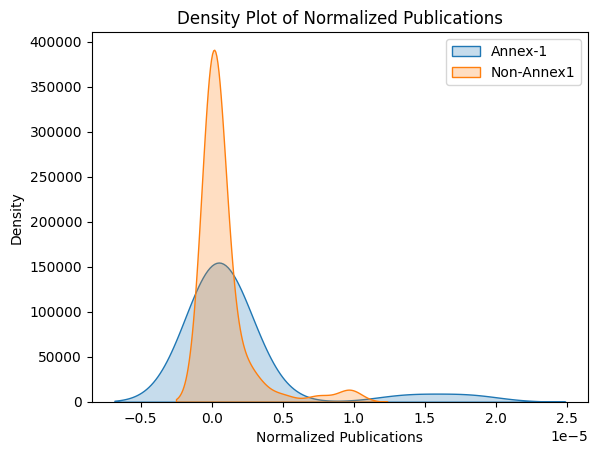

In [141]:
# Density plots
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(annex1_pcp, label="Annex-1", shade=True)
sns.kdeplot(non_annex1_pcp, label="Non-Annex1", shade=True)
plt.title("Density Plot of Normalized Publications")
plt.xlabel("Normalized Publications")
plt.ylabel("Density")
plt.legend()
plt.show()

In [142]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test
u_stat, p_val = mannwhitneyu(annex1_pcp, non_annex1_pcp, alternative='two-sided')
print("Mann-Whitney U Test: U-statistic =", u_stat, ", p-value =", p_val)

# Interpret the result
if p_val < 0.05:
    print("The difference in per-capita publications between Annex-1 and Non-Annex1 is statistically significant.")
else:
    print("No significant difference in per-capita publications between the groups.")


Mann-Whitney U Test: U-statistic = 1123.0 , p-value = 0.049775930982407235
The difference in per-capita publications between Annex-1 and Non-Annex1 is statistically significant.


In [143]:
# Effect size: Rank-biserial correlation
n1, n2 = len(annex1_pcp), len(non_annex1_pcp)
rank_biserial_corr = (u_stat - (n1 * n2 / 2)) / (n1 * n2 / 2)
print("Rank-Biserial Correlation (Effect Size):", rank_biserial_corr)

Rank-Biserial Correlation (Effect Size): 0.26535211267605635


In [144]:
from statsmodels.stats.power import TTestIndPower

# Effect size (from Mann-Whitney U test)
effect_size = rank_biserial_corr  # previously computed

# Sample sizes for each group (Annex-1 and Non-Annex1)
n1 = len(annex1_pcp)  # Number of countries in Annex-1
n2 = len(non_annex1_pcp)  # Number of countries in Non-Annex1

# Significance level (alpha)
alpha = 0.05

# Instantiate the power analysis object
analysis = TTestIndPower()

# Calculate the power for the test
power = analysis.solve_power(effect_size=effect_size, nobs1=n1, alpha=alpha, ratio=n2/n1)
print(f"Power of the test: {power}")


Power of the test: 0.20410340028101606


## Annex1 vs LDC

In [145]:
annex1_pcp = list(df_stats[df_stats['ResearchRegion'] == 'Annex1']['NormalisedPublications'])  # Per-capita publications for Annex-1
ldc_pcp = list(df_stats[df_stats['ResearchRegion'] == 'LDC']['NormalisedPublications'])  # Per-capita publications for Non-Annex1

# Normality test
print("Annex-1 Normality Test:", stats.shapiro(annex1_pcp))
print("LDC Normality Test:", stats.shapiro(ldc_pcp))

stat, p = stats.levene(annex1_pcp, ldc_pcp)
print("Levene's test for equal variances: p-value =", p)

Annex-1 Normality Test: ShapiroResult(statistic=0.4296780728041627, pvalue=8.10407219305923e-09)
LDC Normality Test: ShapiroResult(statistic=0.3283052408601599, pvalue=3.546341169979017e-08)
Levene's test for equal variances: p-value = 0.2908177435346945


In [146]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test
u_stat, p_val = mannwhitneyu(annex1_pcp, ldc_pcp, alternative='two-sided')
print("Mann-Whitney U Test: U-statistic =", u_stat, ", p-value =", p_val)

# Interpret the result
if p_val < 0.05:
    print("The difference in per-capita publications between Annex-1 and LDC is statistically significant.")
else:
    print("No significant difference in per-capita publications between the groups.")


Mann-Whitney U Test: U-statistic = 344.0 , p-value = 0.0035311184697116448
The difference in per-capita publications between Annex-1 and LDC is statistically significant.


In [147]:
# Effect size: Rank-biserial correlation
n1, n2 = len(annex1_pcp), len(ldc_pcp)
rank_biserial_corr = (u_stat - (n1 * n2 / 2)) / (n1 * n2 / 2)
print("Rank-Biserial Correlation (Effect Size):", rank_biserial_corr)

Rank-Biserial Correlation (Effect Size): 0.5288888888888889


In [148]:
from statsmodels.stats.power import TTestIndPower

# Effect size (from Mann-Whitney U test)
effect_size = rank_biserial_corr  # previously computed

# Sample sizes for each group (Annex-1 and Non-Annex1)
n1 = len(annex1_pcp)  # Number of countries in Annex-1
n2 = len(ldc_pcp)  # Number of countries in Non-Annex1

# Significance level (alpha)
alpha = 0.05

# Instantiate the power analysis object
analysis = TTestIndPower()

# Calculate the power for the test
power = analysis.solve_power(effect_size=effect_size, nobs1=n1, alpha=alpha, ratio=n2/n1)
print(f"Power of the test: {power}")

Power of the test: 0.3864004862641095


# Other Stats

In [149]:
from scipy.stats import mannwhitneyu

# Cliff's Delta
u_statistic, p_value = mannwhitneyu(annex1_pcp, non_annex1_pcp, alternative='two-sided')
cliff_delta = (u_statistic - (len(annex1_pcp) * len(non_annex1_pcp)) / 2) / (len(annex1_pcp) * len(non_annex1_pcp) / 2)
print(f"Cliff's Delta: {cliff_delta}")

Cliff's Delta: 0.26535211267605635


In [150]:
import numpy as np

# Sample data (your normalized publication data)
# annex1_pcp = np.array([4.82e-08, 1.13e-07, 5.21e-08, 1.90e-08, 6.45e-08])  # Example Annex-1 data
# non_annex1_pcp = np.array([1.02e-08, 2.56e-08, 8.41e-08, 1.77e-08, 4.62e-08])  # Example Non-Annex1 data

# 1. Calculate observed difference (median difference)
observed_diff = np.median(annex1_pcp) - np.median(non_annex1_pcp)

# 2. Combine the data
combined_data = np.concatenate([annex1_pcp, non_annex1_pcp])

# 3. Permutation test: shuffle the data and calculate median differences
n_permutations = 10000  # Number of permutations
permuted_diffs = []

for _ in range(n_permutations):
    np.random.shuffle(combined_data)
    permuted_annex1 = combined_data[:len(annex1_pcp)]
    permuted_non_annex1 = combined_data[len(annex1_pcp):]
    permuted_diff = np.median(permuted_annex1) - np.median(permuted_non_annex1)
    permuted_diffs.append(permuted_diff)

# 4. Calculate p-value by comparing observed difference to permuted distribution
permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

# Output the results
print(f"Observed Median Difference: {observed_diff}")
print(f"p-value: {p_value}")


Observed Median Difference: 3.3614462430985326e-07
p-value: 0.0056


In [151]:
# Bootstrap method to compute the confidence interval for median difference
n_bootstrap = 10000
bootstrap_diffs = []

for _ in range(n_bootstrap):
    sample_annex1 = np.random.choice(annex1_pcp, size=len(annex1_pcp), replace=True)
    sample_non_annex1 = np.random.choice(non_annex1_pcp, size=len(non_annex1_pcp), replace=True)
    bootstrap_diff = np.median(sample_annex1) - np.median(sample_non_annex1)
    bootstrap_diffs.append(bootstrap_diff)

# Calculate the 95% confidence interval
lower, upper = np.percentile(bootstrap_diffs, [2.5, 97.5])
print(f"95% Confidence Interval for Median Difference: ({lower}, {upper})")

95% Confidence Interval for Median Difference: (-4.2401964184535855e-09, 6.343949995864504e-07)


In [152]:
p_value

0.0056

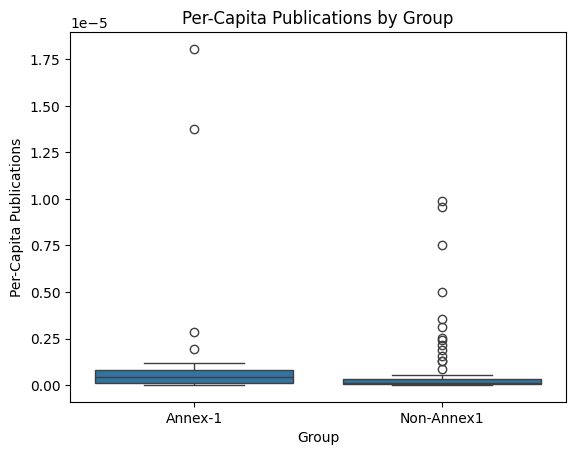

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for visualization
data = pd.DataFrame({
    "Group": ["Annex-1"] * len(annex1_pcp) + ["Non-Annex1"] * len(non_annex1_pcp),
    "Per-Capita Publications": annex1_pcp + non_annex1_pcp
})

# Boxplot
sns.boxplot(x="Group", y="Per-Capita Publications", data=data)
plt.title("Per-Capita Publications by Group")
plt.show()


In [154]:
df_stats[(df_stats['NormalisedPublications'] >= 0.2e-5) & (df_stats['NormalisedPublications'] <= 0.4e-5)]

Regions_updated ResearchRegion  VulnerabilityIndex  Population  \
3        australia         Annex1            0.306046  26451125.0   
7         barbados      NonAnnex1            0.372143    282348.0   
9           belize      NonAnnex1            0.461605    411115.0   
27            fiji      NonAnnex1            0.457165    924150.0   
72          serbia      NonAnnex1            0.421292   6773203.0   
92         vanuatu      NonAnnex1            0.559518    320422.0   

    NumPublications  Altmetrics  NumPublications_log  NumPublications_sqrt  \
3                76     17947.0             4.330733              8.717798   
7                 1        17.0             0.000000              1.000000   
9                 1       306.0             0.000000              1.000000   
27                2       340.0             0.693147              1.414214   
72               17      3565.0             2.833213              4.123106   
92                1       200.0             0.000000              1.000000   

    Altmetrics_log  Altmetrics_sqrt  NormalisedPublications  
3         9.795178       133.966414                0.000003  
7         2.833213         4.123106                0.000004  
9         5.723585        17.492856                0.000002  
27        5.828946        18.439089                0.000002  
72        8.178919        59.707621                0.000003  
92        5.298317        14.142136                0.000003

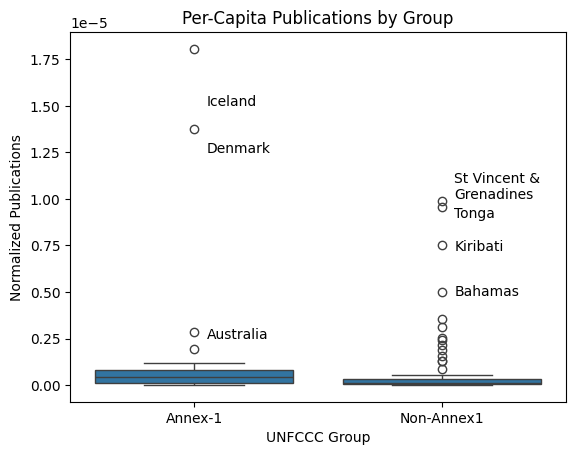

In [155]:
# Visualization with annotations
sns.boxplot(x="Group", y="Per-Capita Publications", data=data)
plt.title("Per-Capita Publications by Group")
plt.ylabel("Normalized Publications")
plt.xlabel("UNFCCC Group")
plt.text(0.05, 1.5e-5, "Iceland", fontsize=10)
plt.text(0.05, 1.25e-5, "Denmark", fontsize=10)
plt.text(0.05, 0.25e-5, "Australia", fontsize=10)
plt.text(1.05, 0.72e-5, "Kiribati", fontsize=10)
plt.text(1.05, 0.48e-5, "Bahamas", fontsize=10)
plt.text(1.05, 1e-5, "St Vincent & \nGrenadines", fontsize=10)
plt.text(1.05, 0.9e-5, "Tonga", fontsize=10)
plt.show()


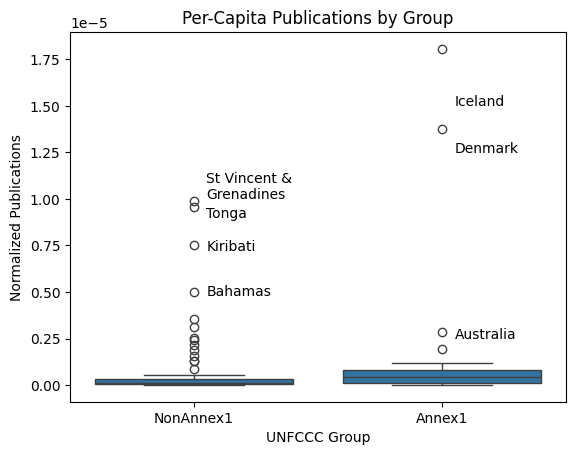

In [156]:
# Visualization with annotations
df_stats_box = df_stats[df_stats['ResearchRegion'].isin(['Annex1', 'NonAnnex1'])]
sns.boxplot(x="ResearchRegion", y="NormalisedPublications", data=df_stats_box)
plt.title("Per-Capita Publications by Group")
plt.ylabel("Normalized Publications")
plt.xlabel("UNFCCC Group")
plt.text(1.05, 1.5e-5, "Iceland", fontsize=10)
plt.text(1.05, 1.25e-5, "Denmark", fontsize=10)
plt.text(1.05, 0.25e-5, "Australia", fontsize=10)
plt.text(0.05, 0.72e-5, "Kiribati", fontsize=10)
plt.text(0.05, 0.48e-5, "Bahamas", fontsize=10)
plt.text(0.05, 1e-5, "St Vincent & \nGrenadines", fontsize=10)
plt.text(0.05, 0.9e-5, "Tonga", fontsize=10)
plt.show()


#Results

The p-value from the Mann-Whitney U test to show statistical significance.
The rank-biserial correlation to indicate the strength of the difference.
A boxplot or similar chart to illustrate the results visually.

# Author Statistical Test

In [157]:
df_author = pd.DataFrame(list(country_counter.items()), columns=['Regions_updated', 'Author_count'])
df_author = pd.merge(df_author, population, on='Regions_updated', how='left')
df_author

Regions_updated  Author_count    Population
0     united states          4909  3.434773e+08
1             china          2687  1.422585e+09
2    united kingdom          1716  6.868296e+07
3           germany           894  8.454823e+07
4         australia           761  2.645112e+07
..              ...           ...           ...
97           belize             1  4.111150e+05
98          burundi             1  1.368946e+07
99         zimbabwe             1  1.634083e+07
100           niger             1  2.615986e+07
101         senegal             1  1.807757e+07

[102 rows x 3 columns]

In [158]:
df_author = df_author[df_author['Population'].isna() == False]
df_author['ResearchRegion'] = df_author['Regions_updated'].apply(get_author_regions)
df_author = df_author.explode('ResearchRegion')
df_author['NormalisedAuthorCount'] = df_author['Author_count'] / df_author['Population']
df_author

Regions_updated  Author_count    Population ResearchRegion  \
0     united states          4909  3.434773e+08         Annex1   
0     united states          4909  3.434773e+08            USA   
1             china          2687  1.422585e+09      NonAnnex1   
1             china          2687  1.422585e+09          China   
2    united kingdom          1716  6.868296e+07         Annex1   
..              ...           ...           ...            ...   
99         zimbabwe             1  1.634083e+07      NonAnnex1   
100           niger             1  2.615986e+07      NonAnnex1   
100           niger             1  2.615986e+07            LDC   
101         senegal             1  1.807757e+07      NonAnnex1   
101         senegal             1  1.807757e+07            LDC   

     NormalisedAuthorCount  
0             1.429206e-05  
0             1.429206e-05  
1             1.888815e-06  
1             1.888815e-06  
2             2.498436e-05  
..                     ...  
99            6.119641e-08  
100           3.822650e-08  
100           3.822650e-08  
101           5.531716e-08  
101           5.531716e-08  

[120 rows x 5 columns]

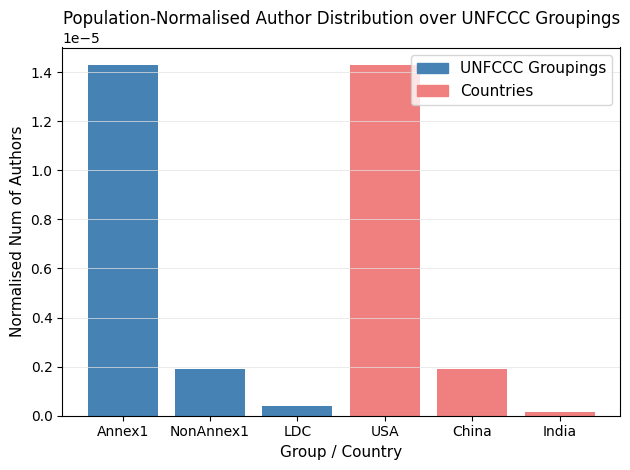

In [171]:
region_order = ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']
region_vals = [df_author.loc[df_author['ResearchRegion'] == region, 'NormalisedAuthorCount'].values[0]
               for region in region_order]

colors = ['steelblue', 'steelblue', 'steelblue', 'lightcoral', 'lightcoral', 'lightcoral']
region_patch = mpatches.Patch(color='steelblue', label='UNFCCC Groupings')
country_patch = mpatches.Patch(color='lightcoral', label='Countries')
plt.legend(handles=[region_patch, country_patch], fontsize=11)
plt.bar(region_order, region_vals, color=colors)
plt.title('Population-Normalised Author Distribution over UNFCCC Groupings')
plt.ylabel('Normalised Num of Authors', fontsize=11)
plt.xlabel('Group / Country', fontsize=11)
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [172]:
annex1_author_pcp = list(df_author[df_author['ResearchRegion'] == 'Annex1']['NormalisedAuthorCount'])  # Per-capita authors for Annex-1
non_annex1_author_pcp = list(df_author[df_author['ResearchRegion'] == 'NonAnnex1']['NormalisedAuthorCount'])  # Per-capita authors for Non-Annex1

# Normality test
print("Annex-1 Normality Test:", stats.shapiro(annex1_author_pcp))
print("Non-Annex1 Normality Test:", stats.shapiro(non_annex1_author_pcp))

stat, p = stats.levene(annex1_author_pcp, non_annex1_author_pcp)
print("Levene's test for equal variances: p-value =", p)

Annex-1 Normality Test: ShapiroResult(statistic=0.8209577657606261, pvalue=3.540898050368998e-05)
Non-Annex1 Normality Test: ShapiroResult(statistic=0.5392903182733648, pvalue=5.665744963170766e-13)
Levene's test for equal variances: p-value = 1.9866496817233288e-07


In [173]:
# Mann-Whitney U test
u_stat_author, p_val_author = mannwhitneyu(annex1_author_pcp, non_annex1_author_pcp, alternative='two-sided')
print("Mann-Whitney U Test: U-statistic =", u_stat_author, ", p-value =", p_val_author)

# Interpret the result
if p_val_author < 0.05:
    print("The difference in per-capita author count between Annex-1 and Non-Annex1 is statistically significant.")
else:
    print("No significant difference in per-capita author count between the groups.")

Mann-Whitney U Test: U-statistic = 2004.0 , p-value = 2.4749126984397742e-08
The difference in per-capita author count between Annex-1 and Non-Annex1 is statistically significant.


In [174]:
n1_author, n2_author = len(annex1_author_pcp), len(non_annex1_author_pcp)
rank_biserial_corr_author = (u_stat_author - (n1_author * n2_author / 2)) / (n1_author * n2_author / 2)
print("Rank-Biserial Correlation (Effect Size):", rank_biserial_corr_author)

Rank-Biserial Correlation (Effect Size): 0.6665280665280665


In [175]:
from statsmodels.stats.power import TTestIndPower

# Effect size (from Mann-Whitney U test)
effect_size_author = rank_biserial_corr_author  # previously computed

# Sample sizes for each group (Annex-1 and Non-Annex1)
n1_author = len(annex1_author_pcp)  # Number of countries in Annex-1
n2_author = len(non_annex1_author_pcp)  # Number of countries in Non-Annex1

# Significance level (alpha)
alpha = 0.05

# Instantiate the power analysis object
analysis_author = TTestIndPower()

# Calculate the power for the test
power_author = analysis_author.solve_power(effect_size=effect_size_author, nobs1=n1_author, alpha=alpha, ratio=n2_author/n1)
print(f"Power of the test: {power_author}")


Power of the test: 0.9278860994702606


In [176]:
df_author[(df_author['NormalisedAuthorCount'] >= 0.5e-5) & (df_author['NormalisedAuthorCount'] <= 1e-5)]

Regions_updated  Author_count  Population ResearchRegion  \
5           france           574  66438828.0         Annex1   
12           spain           241  47911583.0         Annex1   
23  czech republic            69  10809722.0         Annex1   
33          panama            33   4458759.0      NonAnnex1   
34         ireland            30   5196629.0         Annex1   
52        slovenia            13   2118395.0         Annex1   
53           gabon            13   2484790.0      NonAnnex1   
66        suriname             6    628892.0      NonAnnex1   
72        maldives             4    526009.0      NonAnnex1   
94         bahamas             2    399452.0      NonAnnex1   

    NormalisedAuthorCount  
5                0.000009  
12               0.000005  
23               0.000006  
33               0.000007  
34               0.000006  
52               0.000006  
53               0.000005  
66               0.000010  
72               0.000008  
94               0.000005

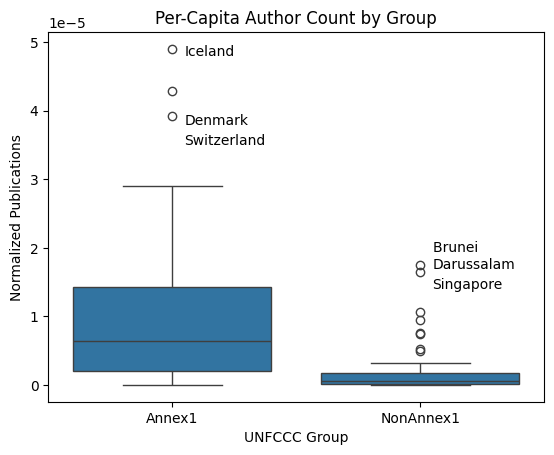

In [164]:
# Visualization with annotations
df_author_box = df_author[df_author['ResearchRegion'].isin(['Annex1', 'NonAnnex1'])]
sns.boxplot(x="ResearchRegion", y="NormalisedAuthorCount", data=df_author_box)
plt.title("Per-Capita Author Count by Group")
plt.ylabel("Normalized Publications")
plt.xlabel("UNFCCC Group")
plt.text(0.05, 4.8e-5, "Iceland", fontsize=10)
plt.text(0.05, 3.8e-5, "Denmark", fontsize=10)
plt.text(0.05, 3.5e-5, "Switzerland", fontsize=10)
plt.text(1.05, 1.7e-5, "Brunei \nDarussalam", fontsize=10)
plt.text(1.05, 1.4e-5, "Singapore", fontsize=10)
# plt.text(0.05, 1e-5, "St Vincent & \nGrenadines", fontsize=10)
# plt.text(0.05, 0.9e-5, "Tonga", fontsize=10)
plt.show()

# Results

The p-value from the Mann-Whitney U test to show statistical significance (yes significant).
The rank-biserial correlation to indicate the strength of the difference (high effect).
A boxplot or similar chart to illustrate the results visually.

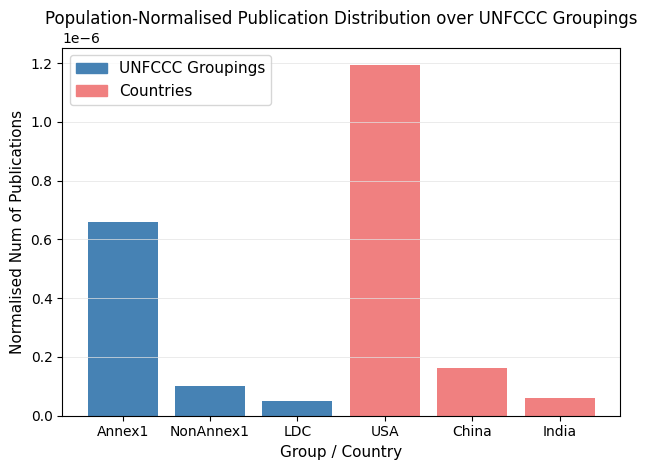

In [165]:
region_order = ['Annex1', 'NonAnnex1', 'LDC', 'USA', 'China', 'India']
region_vals = [data_region_grouped.loc[data_region_grouped['ResearchRegion'] == region, 'Normalised_Publications'].values[0]
               for region in region_order]

colors = ['steelblue', 'steelblue', 'steelblue', 'lightcoral', 'lightcoral', 'lightcoral']
region_patch = mpatches.Patch(color='steelblue', label='UNFCCC Groupings')
country_patch = mpatches.Patch(color='lightcoral', label='Countries')
plt.legend(handles=[region_patch, country_patch], fontsize=11)
plt.bar(region_order, region_vals, color=colors)
plt.title('Population-Normalised Publication Distribution over UNFCCC Groupings')
plt.ylabel('Normalised Num of Publications', fontsize=11)
plt.xlabel('Group / Country', fontsize=11)
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [166]:
groupings = ['Region', 'Region', 'Region', 'Country', 'Country', 'Country']

# Create a DataFrame
plot_data = pd.DataFrame({
    'Category': region_order,
    'Count': region_vals,
    'Grouping': groupings
})

# Plot using Plotly Express
fig = px.bar(
    plot_data,
    x='Category',
    y='Count',
    color='Grouping',
    title='Population-Normalised Publication Distribution for UNFCCC Groupings',
    labels={'Category': 'Group / Country', 'Count': 'Normalised Publications'},
    color_discrete_map={'Region': 'steelblue', 'Country': 'lightcoral'}
)

# Customize layout
fig.update_layout(
    legend_title_text='Grouping',
    xaxis_title='Group / Country',
    yaxis_title='Normalised Number of Publications',
    yaxis=dict(gridcolor='#e3e3e3'),
    plot_bgcolor='white'
)

# st.plotly_chart(fig)

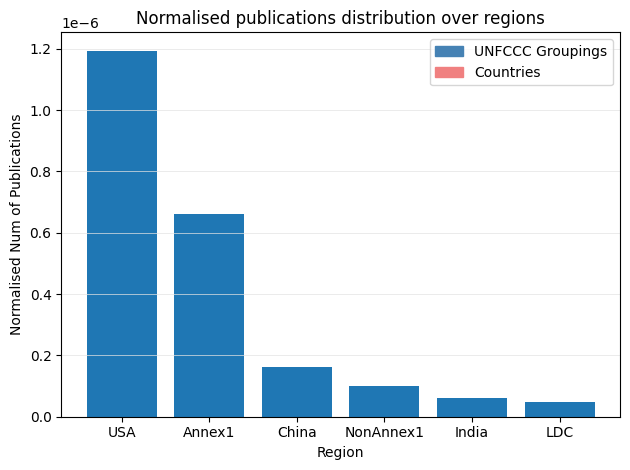

In [167]:
colors = ['steelblue', 'steelblue', 'steelblue', 'lightcoral', 'lightcoral', 'lightcoral']
region_patch = mpatches.Patch(color='steelblue', label='UNFCCC Groupings')
country_patch = mpatches.Patch(color='lightcoral', label='Countries')
plt.legend(handles=[region_patch, country_patch])
plt.bar(data_region_grouped['ResearchRegion'], data_region_grouped['Normalised_Publications'])
plt.title('Normalised publications distribution over regions')
plt.ylabel('Normalised Num of Publications')
plt.xlabel('Region')
plt.grid(axis='y', color='#e3e3e3', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# Geospatial Analysis

In [ ]:
vulnerability = pd.read_csv('vulnerability.csv')
vulnerability = vulnerability[['Name', '2022']]
vulnerability['Regions_updated'] = vulnerability['Name'].apply(clean_regions)
vulnerability = vulnerability.explode('Regions_updated')
vulnerability.columns = ['Name', 'VulnerabilityIndex', 'Regions_updated']
vulnerability
# vulnerability.to_csv('check_vulnerability_countries.csv', index=False)

Name  VulnerabilityIndex Regions_updated
0                         Afghanistan            0.586021     afghanistan
1                             Albania            0.386332         albania
2                             Algeria            0.364310         algeria
3                             Andorra                 NaN         andorra
4                              Angola            0.508869          angola
..                                ...                 ...             ...
187  Venezuela, Bolivarian Republic o            0.373603       venezuela
188                          Viet Nam            0.457708         vietnam
189                             Yemen            0.521058           yemen
190                            Zambia            0.487666          zambia
191                          Zimbabwe            0.495533        zimbabwe

[192 rows x 3 columns]

In [ ]:
data_pub = data_grouped[['Regions_updated', 'ResearchRegion', 'DOI', 'Altmetric']]
data_pub = data_pub.explode('Regions_updated')
data_pub = data_pub[~data_pub['Regions_updated'].isin(exclude_regions)]
data_pub = data_pub.groupby('Regions_updated').agg({'DOI': 'count', 'Altmetric': 'sum'}).reset_index()
data_pub.columns = ['Regions_updated', 'NumPublications', 'Altmetrics']
# data_pub['ResearchRegion'] = data_pub['Regions_updated'].apply(get_region)

In [ ]:
# Load world map shapefile
world = gpd.read_file("shapefiles/ne_50m_admin_0_countries.shp")
world['rownum'] = range(len(world))
# world['Country'] = world['NAME'].replace(world_mapping)
world['Regions_updated'] = world['NAME'].apply(clean_regions)
world = world.explode('Regions_updated')
# world['Regions_updated'] = [country.lower() for country in world['Country']]
world = world.merge(vulnerability, on='Regions_updated', how='left')
world.loc[world['NAME'] == 'S. Sudan', 'VulnerabilityIndex'] = list(world.loc[world['NAME'] == 'Sudan', 'VulnerabilityIndex'])[0]
world.shape

(242, 173)

In [ ]:
world = world.merge(data_pub, on='Regions_updated', how='left')
world = world.merge(population, on='Regions_updated', how='left')
world['ResearchRegion'] = world['Regions_updated'].apply(get_region)
world.shape

(242, 177)

In [ ]:
world

NameError: name 'world' is not defined

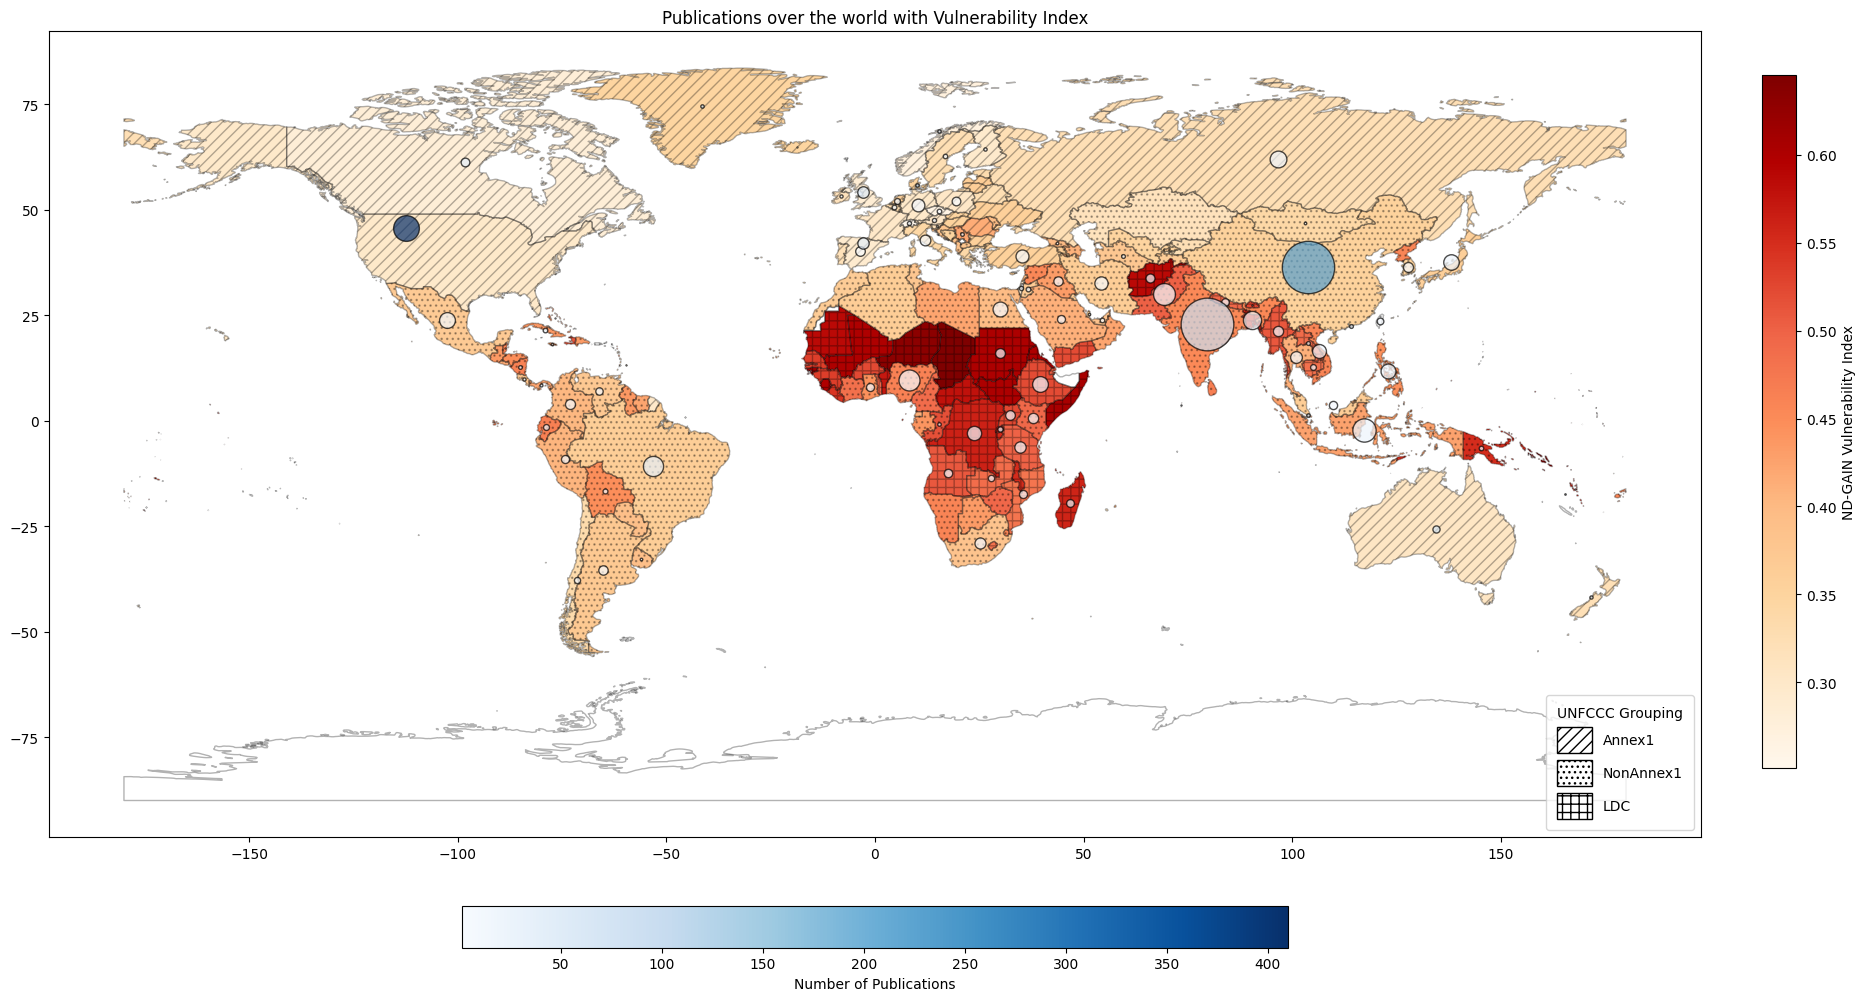

In [ ]:
# Plot the world map with ND-GAIN Vulnerability Index
fig, ax = plt.subplots(1, 1, figsize=(26, 18))

# Create the map with a color scheme for the vulnerability index
world.plot(column='VulnerabilityIndex', ax=ax, legend=True,
           cmap='OrRd', missing_kwds={'color': 'white'},
           legend_kwds={'label': "ND-GAIN Vulnerability Index",
                        'orientation': "vertical",
                        'shrink': 0.5, # Shrink the height of the legend
                        'pad': 0.03,
                        # 'aspect': 30,   # Adjust the aspect ratio for better fit
                      })

# # Set the title and show the plot
# ax.set_title('ND-GAIN Vulnerability Index by Country', fontsize=16)

hatch_patterns = {'Annex1': '///', 'NonAnnex1': '...', 'LDC': '++', None:''}

# Apply hatching based on ResearchRegion
for idx, row in world.iterrows():
    category = row['ResearchRegion']
    hatch = hatch_patterns.get(category, '')

    # Plot each country with the corresponding hatching pattern
    world[world.index == idx].plot(
        ax=ax,
        color='none',  # No fill color, just hatch
        # edgecolor='grey',  # Optional: Outline countries
        hatch=hatch,
        facecolor='darkgrey',
        alpha=0.3
    )

# Define marker shapes for each category
markers = {
    'Annex1': 'D',
    'NonAnnex1': 's',
    'LDC': '^',
    'USA': 'P',
    'India': 'X',
    'China': '*',
    'None': 'o'
}

# Use a sequential colormap for the number of publications
cmap = plt.colormaps.get_cmap('Blues')  # You can choose other sequential colormaps like 'Reds', 'Greens', etc.
norm = Normalize(vmin=world['NumPublications'].min(), vmax=world['NumPublications'].max())  # Normalize publication counts

# Add circles for publications, where size is based on population and color on normalized publication count
for idx, row in world.iterrows():
    if pd.notna(row['NumPublications']):

        category = row['ResearchRegion']
        marker = markers.get(category, 'o')  # Default to circle if not found

        # Get the color based on the number of publications
        circle_color = cmap(norm(row['NumPublications']))

        ax.scatter(
            row['geometry'].centroid.x,
            row['geometry'].centroid.y,
            s=row['Population'] / 1000000,  # Scale population for circle size
            color=circle_color,  # Use color from the colormap
            edgecolor='black',
            alpha=0.7,
            # marker=marker
        )

# Create colorbar to reflect the publication counts
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(np.array(world['NumPublications']))  # Set array for ScalarMappable

# Place the colorbar at the bottom, horizontally
# cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.4, pad=0.05)  # 'pad' adjusts the distance from the map
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.5, pad=0.05)  # 'pad' adjusts the distance from the map
cbar.set_label('Number of Publications')  # Add label to the colorbar

# # Create custom legend handles for each category
# legend_handles = [
#     plt.Line2D([0], [0], marker=marker, color='w', label=category,
#                markerfacecolor='gray', markersize=10, markeredgecolor='black')
#     for category, marker in markers.items()
# ]

# # Add the marker legend to the plot
# ax.legend(handles=legend_handles, title="Research Regions", loc='lower right')

# Create custom legend handles for each hatch pattern
hatch_legend_handles = [
    mpatches.Patch(facecolor='white', hatch=hatch, edgecolor='black', label=category)
    for category, hatch in hatch_patterns.items() if hatch  # Exclude 'None' category or others without hatching
]

# Add the hatch legend to the plot
ax.legend(handles=hatch_legend_handles, title="UNFCCC Grouping", loc='lower right', frameon=True,
    labelspacing=0.5,  # Adjust spacing between legend entries
    borderpad=0.8,  # Adjust padding inside the legend box
    handleheight=2.5,  # Adjust handle height for larger hatching pattern
    handlelength=2.5,  # Adjust handle length for better visibility of the hatch
          )

plt.savefig("world_map_hd.png", dpi=600, bbox_inches='tight', pad_inches=0.5)

# Show the final plot
plt.title("Publications over the world with Vulnerability Index")
plt.show()

In [ ]:
orig_world = world.copy()

In [ ]:
world['NumPublications'] = world['NumPublications'].fillna(0)
world['Population'] = world['Population'].fillna(0)
world['VulnerabilityIndex'] = world['VulnerabilityIndex'].fillna(0)

In [ ]:
world.isna().sum()

featurecla              0
scalerank               0
LABELRANK               0
SOVEREIGNT              0
SOV_A3                  0
                     ... 
VulnerabilityIndex      0
NumPublications         0
Altmetrics            145
Population              0
ResearchRegion          0
Length: 177, dtype: int64

In [ ]:
# Create a list for the custom hover text
world['hover_text'] = (
    "Country: " + world['Regions_updated'] +
    "<br>Population: " + world['Population'].astype(str) +
    "<br>Number of Publications: " + world['NumPublications'].astype(str) +
    "<br>Vulnerability Index: " + world['VulnerabilityIndex'].astype(str) +
    "<br>UNFCCC Grouping: " + world['ResearchRegion'].astype(str)
)

In [ ]:
world = orig_world.copy()
world.isna().sum()

featurecla              0
scalerank               0
LABELRANK               0
SOVEREIGNT              0
SOV_A3                  0
                     ... 
VulnerabilityIndex     53
NumPublications       145
Altmetrics            145
Population             47
ResearchRegion          0
Length: 177, dtype: int64

In [ ]:
world.isna().sum()

featurecla              0
scalerank               0
LABELRANK               0
SOVEREIGNT              0
SOV_A3                  0
                     ... 
VulnerabilityIndex     53
NumPublications       145
Altmetrics            145
Population             47
ResearchRegion          0
Length: 177, dtype: int64

In [ ]:
from shapely.geometry import MultiPolygon, Polygon
def create_hatch_lines(country_geometry, hatch_spacing=0.5):
    lines = []

    # Ensure MultiPolygon is iterable and handle Polygons
    polygons = []
    if isinstance(country_geometry, Polygon):
        polygons = [country_geometry]
    elif isinstance(country_geometry, MultiPolygon):
        polygons = [poly for poly in country_geometry.geoms]  # Ensure it's iterable
    else:
        return lines  # If not a valid geometry, return empty

    # Iterate through all polygons
    for polygon in polygons:
        if polygon.is_empty:
            continue

        # Extract the exterior boundary of the polygon
        exterior_coords = list(polygon.exterior.coords)
        lats, lons = zip(*exterior_coords)
        lat_min, lat_max = min(lats), max(lats)
        lon_min, lon_max = min(lons), max(lons)

        # Create diagonal hatch lines within the bounding box
        for offset in np.arange(lat_min, lat_max, hatch_spacing):
            line_lat = []
            line_lon = []
            for lat, lon in zip(lats, lons):
                if lat >= offset and lat <= offset + hatch_spacing:
                    line_lat.append(lat)
                    line_lon.append(lon)
            if line_lat and line_lon:
                lines.append((line_lat, line_lon))

    return lines

In [ ]:
fig = go.Figure()

world = world[world['VulnerabilityIndex'].isna() == False]
world['NumPublications'] = world['NumPublications'].fillna(0)
world['Population'] = world['Population'].fillna(0)

# Create a list for the custom hover text
world['hover_text'] = (
    "Country: " + world['Regions_updated'] +
    "<br>Population: " + world['Population'].astype(str) +
    "<br>Number of Publications: " + world['NumPublications'].astype(str) +
    "<br>Vulnerability Index: " + world['VulnerabilityIndex'].astype(str) +
    "<br>UNFCCC Grouping: " + world['ResearchRegion'].astype(str)
)

hatch_patterns = {'Annex1': 'dash', 'NonAnnex1': 'dot', 'LDC': 'longdashdot'}

fig.add_trace(go.Choropleth(
    locations=world['Regions_updated'],  # Match country names to Plotly's built-in geo map
    z=world['VulnerabilityIndex'],
    locationmode='country names',
    colorscale='YlOrRd',
    colorbar=dict(
        title=dict(
            text="ND-GAIN Vulnerability Index",  # Title text
            side="right"  # Title position (default is 'right')
        ),
        ticks='outside',  # Style the ticks
        # tickvals=[world['VulnerabilityIndex'].min(), world['VulnerabilityIndex'].max()],
        x=0.8,  # Adjust position horizontally (closer to the map)
        y=0.5,  # Center vertically
    ),
    # hoverinfo='none'
))

fig.update_layout(
    title="Publications Over the World with Vulnerability Index",
    geo=dict(
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin={"r":0, "t":50, "l":0, "b":0},  # Reduce margins for better fit
)

fig.add_trace(go.Scattergeo(
    locations=world['Regions_updated'],
    locationmode='country names',
    mode='markers',
    text=world['hover_text'],  # Add custom hover text
    marker=dict(
        size=world['Population']/30000000,  # Scale population for size
        color=world['NumPublications'],
        colorscale='Blues',
        cmin=world['NumPublications'].min(),  # Min publication value
        cmax=world['NumPublications'].max(),
        line=dict(color='black', width=0.5),
        colorbar=dict(
            title="Number of Publications",
            ticks='outside',
            x=0.5,  # Center it horizontally
            y=-0.1,  # Position below the map
            xanchor='center',  # Horizontal alignment of the colorbar
            yanchor='top',
            orientation='h',
            len=0.6))))

# Add hatching overlays for Annex1, NonAnnex1, and LDC
hatch_patterns = {'Annex1': 'diagonal', 'NonAnnex1': 'horizontal', 'LDC': 'vertical'}
hatch_colors = {'Annex1': 'rgba(0, 0, 0, 0.5)', 'NonAnnex1': 'rgba(0, 0, 255, 0.5)', 'LDC': 'rgba(255, 0, 0, 0.5)'}

for region, pattern in hatch_patterns.items():
    subset = world[world['ResearchRegion'] == region]

    for _, row in subset.iterrows():
        hatch_lines = create_hatch_lines(row['geometry'])
        for line in hatch_lines:
            fig.add_trace(go.Scattergeo(
                lat=line[0],
                lon=line[1],
                mode='lines',
                line=dict(color=hatch_colors[region], width=1),
                showlegend=False
            ))

# # for region, pattern in hatch_patterns.items():
# subset = world[world['ResearchRegion'] == 'Annex1']
# countries = subset['Regions_updated']
# # for country in subset['Regions_updated']:
# fig.add_trace(go.Choropleth(
#     locations=countries,  # Single country
#     z=[1],  # Dummy z value
#     locationmode='country names',
#     colorscale=[[0, 'rgba(255,192,203,0.2)'], [1, 'rgba(255,192,203,0.2)']],  # Transparent gray
#     marker_line_color='gray',  # Add a gray border for distinction
#     showscale=False,  # No color scale for hatching
# ))



fig.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.colors import Normalize
import pandas as pd

# Normalize publication counts for the color scale
norm = Normalize(vmin=world['NumPublications'].min(), vmax=world['NumPublications'].max())

valid_vulnerability = world[world['VulnerabilityIndex'] > 0]['VulnerabilityIndex']
vulnerability_min = valid_vulnerability.min()
vulnerability_max = valid_vulnerability.max()

# Create a list for the custom hover text
world['hover_text'] = (
    "Country: " + world['Regions_updated'] +
    "<br>Population: " + world['Population'].astype(str) +
    "<br>Number of Publications: " + world['NumPublications'].astype(str) +
    "<br>Vulnerability Index: " + world['VulnerabilityIndex'].astype(str)
)

# Initialize the figure
fig = go.Figure()

# Add choropleth layer for the vulnerability index
fig.add_trace(go.Choropleth(
    locations=world['Regions_updated'],  # Match country names to Plotly's built-in geo map
    z=world['VulnerabilityIndex'],  # Vulnerability index as color scale
    locationmode='country names',
    zmin=vulnerability_min,  # Minimum value for color scaling
    zmax=vulnerability_max,
    colorscale='YlOrRd',
    # colorbar=dict(
    #     title='ND-GAIN Vulnerability Index',
    #     orientation='v'
    # ),
    hoverinfo='text',  # Show country and vulnerability index
    showscale=True,
))

# Get a colormap from Matplotlib
colormap = cm.get_cmap('Blues')

# # Add circles representing publications (scaled by population)
# for _, row in world.iterrows():
#     fig.add_trace(go.Scattergeo(
#         lon=[row['geometry'].centroid.x],
#         lat=[row['geometry'].centroid.y],
#         text=row['hover_text'],  # Add custom hover text
#         marker=dict(
#             size=row['Population'] / 50000000,  # Scale population for size
#             color='rgba' + str(colormap(norm(row['NumPublications']), bytes=True)),
#             line=dict(color='black', width=0.5)
#         ),
#         name=row['Regions_updated']  # Group in legend
#     ))


# Use a color scale for the NumPublications as a separate colorbar
fig.add_trace(go.Scattergeo(
    locations=world['Regions_updated'],
    locationmode='country names',
    mode='markers',
    marker=dict(
        size=10,  # Size of the marker can be adjusted
        color=world['NumPublications'],  # Use NumPublications for the color scale
        colorscale='Blues',  # Use Blues color scale
        cmin=world['NumPublications'].min(),  # Min publication value
        cmax=world['NumPublications'].max(),  # Max publication value
        colorbar=dict(
            title="Number of Publications",
            ticks='outside',
            tickvals=[world['NumPublications'].min(), world['NumPublications'].max()]
        )
    ),
    hoverinfo='text',
    text=world['hover_text'],  # Custom hover text
    showlegend=False  # Hide legend for this trace
))

# Update layout to include zoom and interaction
fig.update_layout(
    title="Publications Over the World with Vulnerability Index",
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    margin={"r":0, "t":50, "l":0, "b":0},  # Reduce margins for better fit
    legend=dict(
        orientation="h",  # Make the legend horizontal
        yanchor="bottom",  # Anchor at the bottom
        y=-0.1,  # Move the legend below the plot
        xanchor="center",  # Center the legend
        x=0.5  # Center the legend horizontally
    )
)

# Show the interactive plot
fig.show()


<ipython-input-223-4bfbdb17970f>:41: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [ ]:
world[world['NAME'] == 'China'][['NAME', 'Name', 'Regions_updated', 'ResearchRegion', 'NumPublications', 'Population', 'VulnerabilityIndex']]

NAME   Name Regions_updated ResearchRegion  NumPublications  \
195  China  China           china      NonAnnex1            231.0   

       Population  VulnerabilityIndex  
195  1.422585e+09            0.353355

In [ ]:
world[world['NAME'] == 'Taiwan'][['NAME', 'Name', 'Regions_updated', 'ResearchRegion', 'NumPublications', 'Population', 'VulnerabilityIndex']]

NAME Name Regions_updated ResearchRegion  NumPublications  Population  \
45  Taiwan  NaN          taiwan      NonAnnex1              6.0  23317145.0   

    VulnerabilityIndex  
45                 NaN

In [ ]:
world[world['NAME'] == 'Hong Kong'][['NAME', 'Name', 'Regions_updated', 'ResearchRegion', 'NumPublications', 'Population', 'VulnerabilityIndex']]

NAME Name Regions_updated ResearchRegion  NumPublications  \
197  Hong Kong  NaN        hongkong      NonAnnex1              2.0   

     Population  VulnerabilityIndex  
197   7442738.0                 NaN

In [ ]:
# test = data_subset.copy()
# test['Regions_updated_lower'] = [country.lower() for country in test['Regions_updated']]
# test['ResearchRegions'] = [region[0] for region in test['ResearchRegions']]
# test = test[['DOI', 'Year Published', 'ResearchRegions', 'Regions_updated', 'Regions_updated_lower', 'Altmetric', 'Citation']]
# test = test.groupby(['Regions_updated_lower', 'ResearchRegions']).agg({'DOI': 'count', 'Altmetric': 'sum', 'Citation': 'sum'}).reset_index()
# test.columns = ['Regions_updated_lower', 'ResearchRegions', 'NumPublications', 'AltmetricSum', 'CitationSum']
# test

In [ ]:
# pop_mapping = {'brunei': 'brunei darussalam',
#                'central african republic': 'africa',
#                'ivory coast': "cote d'ivoire",
#                'republic of the congo': 'congo',
#                'dr congo': 'congo, the democratic republic o',
#                'Dominican Rep.': 'dominican republic',
#                'south korea': 'korea, republic of',a
#                'north korea': "korea, democratic people's repub",
#                'laos': "lao people's democratic republic",
#                'libya': "libyan arab jamahiriya",
#                'micronesia': 'micronesia, federated states of',
#                'moldova': 'moldova, republic of',
#                'north macedonia': 'macedonia',
#                'St. Kitts and Nevis': 'saint kitts and nevis',
#                'St. Vin. and Gren.': 'saint vincent and the grenadines',
#                "São Tomé and Principe": 'sao tome and principe',
#                'Solomon Is.': 'solomon islands',
#                'eswatini': 'swaziland',
#                'syria': 'syrian arab republic',
#                'tanzania': 'tanzania, united republic of'}
# population_mapped = population.copy()
# population_mapped['Regions_updated_lower'] = population_mapped['Regions_updated_lower'].replace(pop_mapping)
# # uk = population_mapped.loc[population_mapped['Regions_updated_lower'] == 'united kingdom'].copy()
# # uk['Regions_updated_lower'] = 'england'
# # population_mapped = pd.concat([population_mapped, uk])
# # uk['Regions_updated_lower'] = 'scotland'
# # population_mapped = pd.concat([population_mapped, uk])
# population_mapped

In [ ]:
# vulnerability_joined = pd.merge(vulnerability_joined, population_mapped, on='Regions_updated_lower', how='left')

In [ ]:
# world_mapping = {'Antigua and Barb.': 'antigua and barbuda',
#                  'Bosnia and Herz.': 'bosnia and herzegovina',
#                  'Brunei': 'brunei darussalam',
#                  'Cabo Verde': 'cape verde',
#                  'Central African Rep.': 'africa',
#                  "Côte d'Ivoire": "cote d'ivoire",
#                  'Czechia': 'czech republic',
#                  'Dem. Rep. Congo': 'Congo, the Democratic Republic o',
#                  'Dominican Rep.': 'dominican republic',
#                  'Eq. Guinea': 'equatorial guinea',
#                  'South Korea': 'Korea, Republic of',
#                  'S. Sudan': 'sudan',
#                  'North Korea': "Korea, Democratic People's Repub",
#                  'Laos': "lao people's democratic republic",
#                  'Libya': "libyan arab jamahiriya",
#                  'North Macedonia': 'macedonia',
#                  'Marshall Is.': 'marshall islands',
#                  'St. Kitts and Nevis': 'saint kitts and nevis',
#                  'St. Vin. and Gren.': 'saint vincent and the grenadines',
#                  "São Tomé and Principe": 'sao tome and principe',
#                  'Solomon Is.': 'solomon islands',
#                  'eSwatini': 'swaziland',
#                  'Syria': 'syrian arab republic',
#                  'Tanzania': 'tanzania, united republic of',
#                  'United States of America': 'united states',
#                  }

# # Load world map shapefile
# world = gpd.read_file("shapefiles/ne_50m_admin_0_countries.shp")
# world['Country'] = world['NAME'].replace(world_mapping)
# world['Regions_updated_lower'] = [country.lower() for country in world['Country']]
# world = world.merge(vulnerability_joined, on='Regions_updated_lower', how='left')
# world.head()

In [ ]:
# temp_list = list(world[world['VulnerabilityIndex'].isna()]['NAME'].unique())
# temp_list.sort()
# temp_list

In [ ]:
# world = world[world.is_valid]

In [ ]:
# # Plot the world map with ND-GAIN Vulnerability Index
# fig, ax = plt.subplots(1, 1, figsize=(25, 22))

# # Create the map with a color scheme for the vulnerability index
# world.plot(column='VulnerabilityIndex', ax=ax, legend=True,
#            cmap='OrRd', missing_kwds={'color': 'lightyellow'},
#            legend_kwds={'label': "ND-GAIN Vulnerability Index",
#                         'orientation': "vertical",
#                         'shrink': 0.4, # Shrink the height of the legend
#                         'aspect': 30   # Adjust the aspect ratio for better fit
#                       })

# # # Set the title and show the plot
# # ax.set_title('ND-GAIN Vulnerability Index by Country', fontsize=16)

# # Use a sequential colormap for the number of publications
# cmap = plt.colormaps.get_cmap('Blues')  # You can choose other sequential colormaps like 'Reds', 'Greens', etc.
# norm = Normalize(vmin=test['NumPublications'].min(), vmax=test['NumPublications'].max())  # Normalize publication counts

# # Add circles for publications, where size is based on population and color on normalized publication count
# for idx, row in world.iterrows():
#     if pd.notna(row['NumPublications']):
#         # Get the color based on the number of publications
#         circle_color = cmap(norm(row['NumPublications']))

#         ax.scatter(
#             row['geometry'].centroid.x,
#             row['geometry'].centroid.y,
#             s=row['population'] / 1000000,  # Scale population for circle size
#             color=circle_color,  # Use color from the colormap
#             edgecolor='black',
#             alpha=0.7
#         )

# # Create colorbar to reflect the publication counts
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array(np.array(world['NumPublications']))  # Set array for ScalarMappable

# # Place the colorbar at the bottom, horizontally
# cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.4, pad=0.05)  # 'pad' adjusts the distance from the map
# cbar.set_label('Number of Publications')  # Add label to the colorbar

# # Show the final plot
# plt.title("World Map Colored by Vulnerability Index with Publication Circles")
# plt.show()

In [ ]:
# # Plot the world map with ND-GAIN Vulnerability Index
# fig, ax = plt.subplots(1, 1, figsize=(25, 22))

# # Create the map with a color scheme for the vulnerability index
# world.plot(column='VulnerabilityIndex', ax=ax, legend=True,
#            cmap='OrRd', missing_kwds={'color': 'lightyellow'},
#            legend_kwds={'label': "ND-GAIN Vulnerability Index",
#                         'orientation': "vertical",
#                         'shrink': 0.4, # Shrink the height of the legend
#                         'aspect': 30   # Adjust the aspect ratio for better fit
#                       })

# # # Set the title and show the plot
# # ax.set_title('ND-GAIN Vulnerability Index by Country', fontsize=16)

# # Use a sequential colormap for the population
# cmap = plt.colormaps.get_cmap('Blues')  # You can choose other sequential colormaps
# norm = Normalize(vmin=population_mapped['population'].min(), vmax=population_mapped['population'].max())  # Normalize population values

# # Add circles for publications, where size is based on population and color on normalized publication count
# for idx, row in world.iterrows():
#     if pd.notna(row['NumPublications']) and pd.notna(row['population']):
#         if row['geometry'].geom_type == 'MultiPolygon':
#             # If MultiPolygon, use the centroid of the largest part
#             largest_polygon = max(row['geometry'].geoms, key=lambda a: a.area)
#             centroid = largest_polygon.centroid
#         else:
#             # For single polygons, use the direct centroid
#             centroid = row['geometry'].centroid

#         circle_color = cmap(norm(row['population']))

#         ax.scatter(
#             centroid.x,
#             centroid.y,
#             s=row['NumPublications'] * 7,  # Scale population for circle size
#             color=circle_color,  # Use color from the colormap
#             edgecolor='black',
#             alpha=0.9
#         )

# # Create colorbar to reflect the publication counts
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array(np.array(world['population']))  # Set array for ScalarMappable

# # Place the colorbar at the bottom, horizontally
# cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.4, pad=0.05)  # 'pad' adjusts the distance from the map
# cbar.set_label('Population')  # Add label to the colorbar

# # Show the final plot
# plt.title("World Map Colored by Vulnerability Index with Publication Circles")
# plt.show()

In [ ]:
# world[world['NAME'] == 'United States of America']

In [ ]:
# world['NumPublications'] = world['NumPublications'].fillna(0)
# world['population'] = world['population'].fillna(0)

In [ ]:
# # Plot circles on top for publications
# # Define the color map for the number of publications
# publication_bins = [0, 20, 50, 100, float('inf')]  # Define publication bins
# publication_colors = ['lightblue', 'yellow', 'orange', 'red']  # Define colors for each bin

# # Create a color map based on the bins
# cmap = ListedColormap(publication_colors)

# # Function to assign colors based on bins
# def assign_color(publications):
#     if publications <= 20:
#         return 'lightblue'
#     elif 20 < publications <= 50:
#         return 'yellow'
#     elif 50 < publications <= 100:
#         return 'orange'
#     else:
#         return 'red'

# # Add circles for publications, where size is based on population and color on publication count
# for idx, row in world.iterrows():
#     if pd.notna(row['NumPublications']):
#         ax.scatter(
#             row['geometry'].centroid.x,
#             row['geometry'].centroid.y,
#             s=row['population'] / 1000,  # Scale population for circle size
#             color=assign_color(row['NumPublications']),  # Assign color based on number of publications
#             edgecolor='black',
#             alpha=0.7
#         )

# # Add legend for publication colors
# import matplotlib.patches as mpatches
# legend_labels = ['0-20', '20-50', '50-100', '100+']
# legend_colors = [mpatches.Patch(color=color) for color in publication_colors]
# plt.legend(legend_colors, legend_labels, title="Number of Publications", loc='lower left')

# # Show the final plot
# plt.title("World Map Colored by Vulnerability Index with Publication Circles")
# plt.show()

In [ ]:
# # Use a sequential colormap for the number of publications
# cmap = plt.cm.get_cmap('Blues')  # You can choose other sequential colormaps like 'Reds', 'Greens', etc.
# norm = Normalize(vmin=world['NumPublications'].min(), vmax=world['NumPublications'].max())  # Normalize publication counts

# # Add circles for publications, where size is based on population and color on normalized publication count
# for idx, row in world.iterrows():
#     if pd.notna(row['NumPublications']):
#         # Get the color based on the number of publications
#         circle_color = cmap(norm(row['NumPublications']))

#         ax.scatter(
#             row['geometry'].centroid.x,
#             row['geometry'].centroid.y,
#             s=row['population'] / 10000000,  # Scale population for circle size
#             color=circle_color,  # Use color from the colormap
#             edgecolor='black',
#             alpha=0.7
#         )

# # Create colorbar to reflect the publication counts
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array(world['NumPublications'])
# plt.colorbar(sm, label='Number of Publications', shrink=0.5, aspect=10)

# # Show the final plot
# plt.title("World Map Colored by Vulnerability Index with Publication Circles")
# plt.show()

In [ ]:
# world_temp = world[['Regions_updated_lower', 'SOVEREIGNT']]
# test = vulnerability.merge(world_temp, on='Regions_updated_lower', how='left')

In [ ]:
# temp_list = list(test[test['SOVEREIGNT'].isna()]['Regions_updated_lower'].unique())
# temp_list.sort()
# temp_list

In [ ]:
# world.to_csv('world_map_test.csv')

# Generating Analysis Docs

In [ ]:
# url = []
# criteria = []
# with open ('science_logs_1.txt', 'r') as f:
#     for row in csv.reader(f, delimiter=":"):
#       url.append("https:" + str(row[4]))
#       criteria.append(row[5].strip())

In [ ]:
# data = pd.DataFrame(data={"url": url, "criteria": criteria})
# data

In [ ]:
# data[data['criteria'] == "Criteria not met"].head(30)['url'].to_csv("science_criteria_not_met.csv", index=False)